# Import Library:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kprototypes import KPrototypes
from kneed import KneeLocator

# Import Data:

In [2]:
master_df = pd.read_excel('data_2022_2023_key.xlsx')
master_df

Year  Mã CTKM                                           Tên CTKM  \
0       2022   462011             CTKM tháng 3  - (24/03-28/12) -  15955   
1       2022   462011             CTKM tháng 3  - (24/03-28/12) -  15955   
2       2022   462011             CTKM tháng 3  - (24/03-28/12) -  15955   
3       2022   462011             CTKM tháng 3  - (24/03-28/12) -  15955   
4       2022   462011             CTKM tháng 3  - (24/03-28/12) -  15955   
...      ...      ...                                                ...   
459715  2023   731814  CTKM BỔ SUNG  THÁNG 03 (15/03-28/03) Tặng 15k ...   
459716  2023   731814  CTKM BỔ SUNG  THÁNG 03 (15/03-28/03) Tặng 15k ...   
459717  2023   731814  CTKM BỔ SUNG  THÁNG 03 (15/03-28/03) Tặng 15k ...   
459718  2023   731814  CTKM BỔ SUNG  THÁNG 03 (15/03-28/03) Tặng 15k ...   
459719  2023   731814  CTKM BỔ SUNG  THÁNG 03 (15/03-28/03) Tặng 15k ...   

                                               CTKM Ngày bắt đầu  \
0                                          Giảm giá   2022-03-24   
1                                          Giảm giá   2022-03-24   
2                                          Giảm giá   2022-03-24   
3                                          Giảm giá   2022-03-24   
4                                          Giảm giá   2022-03-24   
...                                             ...          ...   
459715  99K Colgate tặng 15k mua thịt, cá, trái cây   2023-03-15   
459716  99K Colgate tặng 15k mua thịt, cá, trái cây   2023-03-15   
459717  99K Colgate tặng 15k mua thịt, cá, trái cây   2023-03-15   
459718  99K Colgate tặng 15k mua thịt, cá, trái cây   2023-03-15   
459719  99K Colgate tặng 15k mua thịt, cá, trái cây   2023-03-15   

       Ngày kết thúc  Thời gian khuyến mãi  Tỷ lệ khuyến mãi       Model  \
0         2022-12-28                   280          0.128205  2107004050   
1         2022-12-28                   280          0.128205  2107004050   
2         2022-12-28                   280          0.128205  2107004050   
3         2022-12-28                   280          0.128205  2107004050   
4         2022-12-28                   280          0.128205  2107004050   
...              ...                   ...               ...         ...   
459715    2023-03-28                    14          0.151515  1607004281   
459716    2023-03-28                    14          0.151515  1607004281   
459717    2023-03-28                    14          0.151515  1607004281   
459718    2023-03-28                    14          0.151515  1607004281   
459719    2023-03-28                    14          0.151515  1607004281   

          Mã SP chính  ...    Brand   DVT  Là thương hiệu nổi tiếng hay không  \
0       9252712000363  ...     2080  Tuýp                                  No   
1       9252712000363  ...     2080  Tuýp                                  No   
2       9252712000363  ...     2080  Tuýp                                  No   
3       9252712000363  ...     2080  Tuýp                                  No   
4       9252712000363  ...     2080  Tuýp                                  No   
...               ...  ...      ...   ...                                 ...   
459715  9252836000012  ...  COLGATE  Tuýp                                 Yes   
459716  9252836000012  ...  COLGATE  Tuýp                                 Yes   
459717  9252836000012  ...  COLGATE  Tuýp                                 Yes   
459718  9252836000012  ...  COLGATE  Tuýp                                 Yes   
459719  9252836000012  ...  COLGATE  Tuýp                                 Yes   

            TE/NL          Size Phân khúc giá Trưng bày  \
0          Trẻ em  Nhỏ (<=100g)           Cao   Trên kệ   
1          Trẻ em  Nhỏ (<=100g)           Cao   Trên kệ   
2          Trẻ em  Nhỏ (<=100g)           Cao   Trên kệ   
3          Trẻ em  Nhỏ (<=100g)           Cao   Trên kệ   
4          Trẻ em  Nhỏ (<=100g)           Cao   Trên kệ   
...           ...           ...       

In [3]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459720 entries, 0 to 459719
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Year                                459720 non-null  int64         
 1   Mã CTKM                             459720 non-null  int64         
 2   Tên CTKM                            459720 non-null  object        
 3   CTKM                                459720 non-null  object        
 4   Ngày bắt đầu                        459720 non-null  datetime64[ns]
 5   Ngày kết thúc                       459720 non-null  datetime64[ns]
 6   Thời gian khuyến mãi                459720 non-null  int64         
 7   Tỷ lệ khuyến mãi                    459720 non-null  float64       
 8   Model                               459720 non-null  int64         
 9   Mã SP chính                         459720 non-null  int64         
 10  Tên SP  

# Task C: Tính lại cơ cấu doanh thu của KM trên Ụ và trên kệ (cùng độ dài thời gian KM và số sản phẩm)

In [4]:
master_df['Thời gian khuyến mãi'].unique()

array([280, 253, 222, 167, 113,  90,  76,  58,  57,  56,  46,  42,  70,
        28,  27,  26,  24,  30,  20,  35,  19,  16,  15,  14,  13,  12,
        11,  10,   7,   9,   6,   4,   5,   3,   2,   1,  33,  40])

In [283]:
df_c = master_df[['Mã CTKM', 'CTKM', 'Thời gian khuyến mãi','Trưng bày','Mã SP chính', 'Tỷ lệ khuyến mãi']]
df_c

Mã CTKM                                         CTKM  \
0        462011                                     Giảm giá   
1        462011                                     Giảm giá   
2        462011                                     Giảm giá   
3        462011                                     Giảm giá   
4        462011                                     Giảm giá   
...         ...                                          ...   
459715   731814  99K Colgate tặng 15k mua thịt, cá, trái cây   
459716   731814  99K Colgate tặng 15k mua thịt, cá, trái cây   
459717   731814  99K Colgate tặng 15k mua thịt, cá, trái cây   
459718   731814  99K Colgate tặng 15k mua thịt, cá, trái cây   
459719   731814  99K Colgate tặng 15k mua thịt, cá, trái cây   

        Thời gian khuyến mãi Trưng bày    Mã SP chính  Tỷ lệ khuyến mãi  
0                        280   Trên kệ  9252712000363          0.128205  
1                        280   Trên kệ  9252712000363          0.128205  
2                        280   Trên kệ  9252712000363          0.128205  
3                        280   Trên kệ  9252712000363          0.128205  
4                        280   Trên kệ  9252712000363          0.128205  
...                      ...       ...            ...               ...  
459715                    14   Trên kệ  9252836000012          0.151515  
459716                    14   Trên kệ  9252836000012          0.151515  
459717                    14   Trên kệ  9252836000012          0.151515  
459718                    14   Trên kệ  9252836000012          0.151515  
459719                    14   Trên kệ  9252836000012          0.151515  

[459720 rows x 6 columns]

In [285]:
df_c['Tổng doanh thu'] = master_df['Doanh thu KM'] + (master_df['Sức bán thường']* master_df['Giá bán KV chuẩn'])
df_c['Tổng doanh thu'] = round(df_c['Tổng doanh thu'], 2)
df_c

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_18330/3697326704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['Tổng doanh thu'] = master_df['Doanh thu KM'] + (master_df['Sức bán thường']* master_df['Giá bán KV chuẩn'])
/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_18330/3697326704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['Tổng doanh thu'] = round(df_c['Tổng doanh thu'], 2)


Mã CTKM                                         CTKM  \
0        462011                                     Giảm giá   
1        462011                                     Giảm giá   
2        462011                                     Giảm giá   
3        462011                                     Giảm giá   
4        462011                                     Giảm giá   
...         ...                                          ...   
459715   731814  99K Colgate tặng 15k mua thịt, cá, trái cây   
459716   731814  99K Colgate tặng 15k mua thịt, cá, trái cây   
459717   731814  99K Colgate tặng 15k mua thịt, cá, trái cây   
459718   731814  99K Colgate tặng 15k mua thịt, cá, trái cây   
459719   731814  99K Colgate tặng 15k mua thịt, cá, trái cây   

        Thời gian khuyến mãi Trưng bày    Mã SP chính  Tỷ lệ khuyến mãi  \
0                        280   Trên kệ  9252712000363          0.128205   
1                        280   Trên kệ  9252712000363          0.128205   
2                        280   Trên kệ  9252712000363          0.128205   
3                        280   Trên kệ  9252712000363          0.128205   
4                        280   Trên kệ  9252712000363          0.128205   
...                      ...       ...            ...               ...   
459715                    14   Trên kệ  9252836000012          0.151515   
459716                    14   Trên kệ  9252836000012          0.151515   
459717                    14   Trên kệ  9252836000012          0.151515   
459718                    14   Trên kệ  9252836000012          0.151515   
459719                    14   Trên kệ  9252836000012          0.151515   

        Tổng doanh thu  
0             71900.00  
1             37900.00  
2             37900.00  
3            139900.00  
4             71900.00  
...                ...  
459715        73594.79  
459716        11428.00  
459717        39655.39  
459718        45367.39  
459719        33939.39  

[459720 rows x 7 columns]

In [286]:
df_c['Khoảng TGKM'] = '0'
df_c['Khoảng TGKM'].loc[(df_c['Thời gian khuyến mãi'] <= 7)] = '<= 7'
df_c['Khoảng TGKM'].loc[(df_c['Thời gian khuyến mãi'] > 7) & (df_c['Thời gian khuyến mãi'] <= 14)] = '8-14'
df_c['Khoảng TGKM'].loc[(df_c['Thời gian khuyến mãi'] > 14) & (df_c['Thời gian khuyến mãi'] <= 24)] = '15-24'
df_c['Khoảng TGKM'].loc[(df_c['Thời gian khuyến mãi'] > 24) & (df_c['Thời gian khuyến mãi'] <= 28)] = '25-28'
df_c['Khoảng TGKM'].loc[(df_c['Thời gian khuyến mãi'] > 28)] = '> 28'
df_c

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_18330/264856488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['Khoảng TGKM'] = '0'
/Users/ricardokaizen/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Mã CTKM                                         CTKM  \
0        462011                                     Giảm giá   
1        462011                                     Giảm giá   
2        462011                                     Giảm giá   
3        462011                                     Giảm giá   
4        462011                                     Giảm giá   
...         ...                                          ...   
459715   731814  99K Colgate tặng 15k mua thịt, cá, trái cây   
459716   731814  99K Colgate tặng 15k mua thịt, cá, trái cây   
459717   731814  99K Colgate tặng 15k mua thịt, cá, trái cây   
459718   731814  99K Colgate tặng 15k mua thịt, cá, trái cây   
459719   731814  99K Colgate tặng 15k mua thịt, cá, trái cây   

        Thời gian khuyến mãi Trưng bày    Mã SP chính  Tỷ lệ khuyến mãi  \
0                        280   Trên kệ  9252712000363          0.128205   
1                        280   Trên kệ  9252712000363          0.128205   
2                        280   Trên kệ  9252712000363          0.128205   
3                        280   Trên kệ  9252712000363          0.128205   
4                        280   Trên kệ  9252712000363          0.128205   
...                      ...       ...            ...               ...   
459715                    14   Trên kệ  9252836000012          0.151515   
459716                    14   Trên kệ  9252836000012          0.151515   
459717                    14   Trên kệ  9252836000012          0.151515   
459718                    14   Trên kệ  9252836000012          0.151515   
459719                    14   Trên kệ  9252836000012          0.151515   

        Tổng doanh thu Khoảng TGKM  
0             71900.00        > 28  
1             37900.00        > 28  
2             37900.00        > 28  
3            139900.00        > 28  
4             71900.00        > 28  
...                ...         ...  
459715        73594.79        8-14  
459716        11428.00        8-14  
459717        39655.39        8-14  
459718        45367.39        8-14  
459719        33939.39        8-14  

[459720 rows x 8 columns]

In [287]:
df_c['Trưng bày'] = df_c['Trưng bày'].str.replace('Trên Kệ','Trên kệ', regex =True)

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_18330/3034022863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['Trưng bày'] = df_c['Trưng bày'].str.replace('Trên Kệ','Trên kệ', regex =True)


## Cơ cấu doanh thu cùng ngày:

In [288]:
df_c_cungngay = df_c.groupby(['Trưng bày','Khoảng TGKM'])['Tổng doanh thu'].sum().reset_index().sort_values(['Khoảng TGKM'], ascending = True)
df_c_cungngay = df_c_cungngay[df_c_cungngay['Trưng bày'] != 'Thu ngân']
df_c_cungngay['Trưng bày'] = df_c_cungngay['Trưng bày'].sort_values(ascending = False)

In [289]:
new_row = pd.Series(['Tháp KM', '> 28', 0], index=['Trưng bày', 'Khoảng TGKM', 'Tổng doanh thu'])
if any((df_c_cungngay['Trưng bày'] == 'Tháp KM') & (df_c_cungngay['Khoảng TGKM'] == '> 28')):
    df_c_cungngay.loc[(df_c_cungngay['Trưng bày'] == 'Tháp KM') & (df_c_cungngay['Khoảng TGKM'] == '> 28'), 'Tổng doanh thu'] = 0
else:
    df_c_cungngay = df_c_cungngay.append(new_row, ignore_index=True)
df_c_cungngay = df_c_cungngay.sort_values(['Khoảng TGKM','Trưng bày'],ascending = True)
df_c_cungngay = df_c_cungngay[df_c_cungngay['Khoảng TGKM'] != '> 28']
df_c_cungngay

Trưng bày Khoảng TGKM  Tổng doanh thu
0   Tháp KM       15-24    3.649331e+09
1   Trên kệ       15-24    2.450530e+10
2   Tháp KM       25-28    8.003156e+09
3   Trên kệ       25-28    2.026422e+10
4   Tháp KM        8-14    4.503897e+09
5   Trên kệ        8-14    1.522262e+10
6   Tháp KM        <= 7    7.012117e+09
7   Trên kệ        <= 7    5.492730e+09

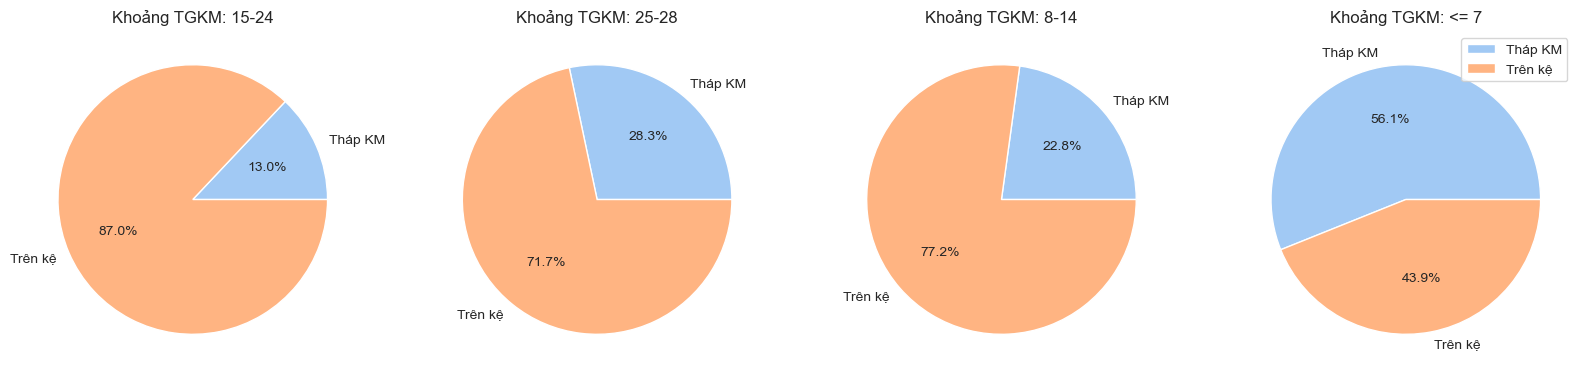

In [290]:
khoangTGKM = df_c_cungngay['Khoảng TGKM'].unique()
fig = plt.figure(figsize=(20, 20))
for i in range(len(khoangTGKM)):
    khoang = khoangTGKM[i]
    df_khoang = df_c_cungngay[df_c_cungngay['Khoảng TGKM'] == khoang]
    labels = df_khoang['Trưng bày'].unique()
    values = df_khoang.groupby('Trưng bày')['Tổng doanh thu'].sum()
    ax = fig.add_subplot(1, 4, i+1)
    ax.pie(values, labels=labels, autopct='%1.1f%%')
    ax.set_title('Khoảng TGKM: {}'.format(khoang))
    fig.add_subplot(ax)
plt.legend()
plt.show();

In [291]:
df_c_cungngay_mau = df_c.groupby(['Trưng bày', 'Khoảng TGKM']).size().reset_index()
df_c_cungngay_mau = df_c_cungngay_mau[df_c_cungngay_mau['Trưng bày'] != 'Thu ngân']
df_c_cungngay_mau = df_c_cungngay_mau.sort_values(by = 'Khoảng TGKM', ascending= True)
df_c_cungngay_mau = df_c_cungngay_mau[df_c_cungngay_mau['Khoảng TGKM'] != '> 28']
df_c_cungngay_mau 

Trưng bày Khoảng TGKM       0
2   Tháp KM       15-24   10670
6   Trên kệ       15-24  109804
3   Tháp KM       25-28   10108
7   Trên kệ       25-28   70219
4   Tháp KM        8-14   16910
8   Trên kệ        8-14   96467
5   Tháp KM        <= 7   27051
9   Trên kệ        <= 7   42381

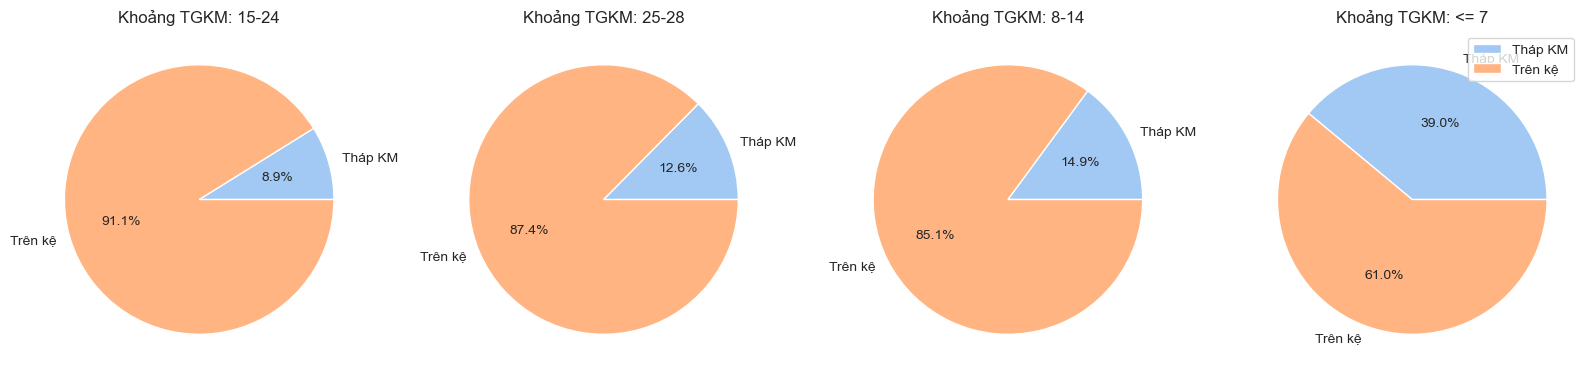

In [292]:
khoangTGKM = df_c_cungngay_mau['Khoảng TGKM'].unique()
fig = plt.figure(figsize=(20, 20))
for i in range(len(khoangTGKM)):
    khoang = khoangTGKM[i]
    df_khoang = df_c_cungngay_mau[df_c_cungngay_mau['Khoảng TGKM'] == khoang]
    labels = df_khoang['Trưng bày'].unique()
    values = df_khoang.groupby('Trưng bày')[0].sum()
    ax = fig.add_subplot(1, 4, i+1)
    ax.pie(values, labels=labels, autopct='%1.1f%%')
    ax.set_title('Khoảng TGKM: {}'.format(khoang))
    fig.add_subplot(ax)
plt.legend()
plt.show();

## Cơ cấu doanh thu cùng số sản phẩm:

In [12]:
df_c_cungsp = df_c.groupby(['Trưng bày','Mã SP chính'])['Tổng doanh thu'].sum().reset_index()
df_c_cungsp = df_c_cungsp[df_c_cungsp['Trưng bày'] != 'Thu ngân']
df_c_cungsp

Trưng bày    Mã SP chính  Tổng doanh thu
5    Tháp KM  8934839121686    3.435569e+09
6    Tháp KM  8934839121723    1.889226e+09
7    Tháp KM  9252712000007    5.046273e+08
8    Tháp KM  9252712000043    2.596528e+09
9    Tháp KM  9252712000044    1.399332e+08
..       ...            ...             ...
75   Trên kệ  9252836000012    3.044909e+09
76   Trên kệ  9252836000039    8.960938e+09
77   Trên kệ  9252836000043    3.528289e+08
78   Trên kệ  9252836000044    8.351142e+09
79   Trên kệ  9252836000183    4.052715e+08

[75 rows x 3 columns]

In [13]:
df_c_cungsp['Trưng bày'].unique()

array(['Tháp KM', 'Trên kệ'], dtype=object)

In [14]:
df_c_cungsp = df_c_cungsp.sort_values(by = 'Mã SP chính', ascending = True)
df_c_cungsp

Trưng bày    Mã SP chính  Tổng doanh thu
19   Trên kệ  8934839103903    2.423570e+08
20   Trên kệ  8934839121686    4.540876e+09
5    Tháp KM  8934839121686    3.435569e+09
21   Trên kệ  8934839121723    3.054426e+09
6    Tháp KM  8934839121723    1.889226e+09
..       ...            ...             ...
17   Tháp KM  9252836000039    7.656286e+08
77   Trên kệ  9252836000043    3.528289e+08
78   Trên kệ  9252836000044    8.351142e+09
18   Tháp KM  9252836000044    7.800551e+08
79   Trên kệ  9252836000183    4.052715e+08

[75 rows x 3 columns]

In [15]:
grouped_df_c_cungsp = df_c_cungsp.groupby('Mã SP chính')
filtered_df = grouped_df_c_cungsp.filter(lambda x: set(x['Trưng bày']) == set(['Tháp KM', 'Trên kệ']))

In [16]:
filtered_df_sum = filtered_df.groupby('Trưng bày')['Tổng doanh thu'].sum().reset_index()
filtered_df_sum

Trưng bày  Tổng doanh thu
0   Tháp KM    2.316850e+10
1   Trên kệ    6.714785e+10

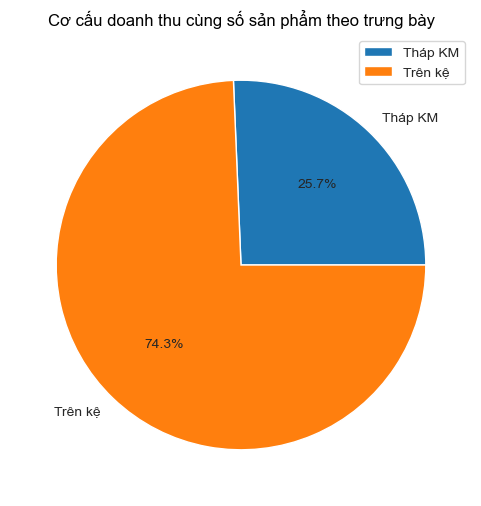

In [17]:
plt.figure(figsize=(6,6))
plt.title('Cơ cấu doanh thu cùng số sản phẩm theo trưng bày')
sns.set_palette('pastel')
sns.set_style('whitegrid')
plt.pie(filtered_df_sum['Tổng doanh thu'], labels=filtered_df_sum['Trưng bày'], autopct='%1.1f%%')
plt.legend()
plt.show();

## Tính cùng cùng thời gian khuyến mãi và cùng số SP:

In [295]:
df_c_all = df_c.groupby(['Mã CTKM','CTKM','Khoảng TGKM','Trưng bày','Mã SP chính']).agg({'Tổng doanh thu': 'sum', 'Tỷ lệ khuyến mãi': 'mean'}).reset_index()
df_c_all = df_c_all[df_c_all['Trưng bày'] != 'Thu ngân']
df_c_all

Mã CTKM                                         CTKM Khoảng TGKM  \
0     396089                                     Giảm giá       25-28   
1     396090                                     Giảm giá       25-28   
2     396198                                     Giảm giá       25-28   
3     396199                                     Giảm giá       25-28   
4     396200                                     Giảm giá       25-28   
..       ...                                          ...         ...   
369   731814  99K Colgate tặng 15k mua thịt, cá, trái cây        8-14   
370   732031                                     Giảm giá        8-14   
371   732032                                     Giảm giá        8-14   
372   732033                                     Giảm giá        8-14   
373   732034                                     Giảm giá        8-14   

    Trưng bày    Mã SP chính  Tổng doanh thu  Tỷ lệ khuyến mãi  
0     Trên kệ  8934839121686    7.230525e+08          0.144444  
1     Trên kệ  8934839121723    3.796253e+08          0.144444  
2     Trên kệ  9252712000029    3.729446e+08          0.148649  
3     Trên kệ  9252712000040    1.053849e+08          0.127660  
4     Trên kệ  9252712000169    3.274257e+08          0.115385  
..        ...            ...             ...               ...  
369   Trên kệ  9252836000012    1.473513e+08          0.151515  
370   Trên kệ  9252712000043    3.723921e+08          0.197917  
371   Trên kệ  9252712000077    2.130504e+08          0.197917  
372   Trên kệ  9252712000044    8.522608e+07          0.197917  
373   Trên kệ  9252712000214    2.453403e+08          0.197917  

[366 rows x 7 columns]

In [297]:
grouped_df_c_all = df_c_all.groupby('Mã SP chính')
filtered_df_all = grouped_df_c_all.filter(lambda x: set(x['Trưng bày']) == set(['Trên kệ', 'Tháp KM']))

In [298]:
filtered_df_all = filtered_df_all.sort_values(['Mã SP chính','Trưng bày'])
filtered_df_all

Mã CTKM                              CTKM Khoảng TGKM Trưng bày  \
132   517457                      Mua 2 tặng 1        8-14   Tháp KM   
142   548002                      Mua 2 tặng 1        <= 7   Tháp KM   
151   549002                      Mua 2 tặng 1        8-14   Tháp KM   
346   731687                          Giảm giá       25-28   Tháp KM   
0     396089                          Giảm giá       25-28   Trên kệ   
..       ...                               ...         ...       ...   
206   628991  HĐ P/S 89,000đ được giảm 15,000đ        8-14   Trên kệ   
211   631479                          Giảm giá       25-28   Trên kệ   
231   655820  HĐ P/S 89,000đ được giảm 15,000đ       15-24   Trên kệ   
308   701655  HĐ P/S 89,000đ được giảm 15,000đ       15-24   Trên kệ   
317   703696                          Giảm giá       15-24   Trên kệ   

       Mã SP chính  Tổng doanh thu  Tỷ lệ khuyến mãi  
132  8934839121686    3.112074e+08          0.333333  
142  8934839121686    3.443059e+07          0.333333  
151  8934839121686    1.539539e+08          0.333400  
346  8934839121686    2.935977e+09          0.333333  
0    8934839121686    7.230525e+08          0.144444  
..             ...             ...               ...  
206  9252836000044    6.238893e+07          0.168539  
211  9252836000044    1.349943e+09          0.153846  
231  9252836000044    8.844443e+07          0.168539  
308  9252836000044    1.976297e+08          0.168539  
317  9252836000044    2.422268e+09          0.153846  

[181 rows x 7 columns]

In [302]:
filtered_df_all_task = filtered_df_all[['Khoảng TGKM','Trưng bày','Mã SP chính','Tỷ lệ khuyến mãi','Tổng doanh thu']]
filtered_df_all_task

Khoảng TGKM Trưng bày    Mã SP chính  Tỷ lệ khuyến mãi  Tổng doanh thu
132        8-14   Tháp KM  8934839121686          0.333333    3.112074e+08
142        <= 7   Tháp KM  8934839121686          0.333333    3.443059e+07
151        8-14   Tháp KM  8934839121686          0.333400    1.539539e+08
346       25-28   Tháp KM  8934839121686          0.333333    2.935977e+09
0         25-28   Trên kệ  8934839121686          0.144444    7.230525e+08
..          ...       ...            ...               ...             ...
206        8-14   Trên kệ  9252836000044          0.168539    6.238893e+07
211       25-28   Trên kệ  9252836000044          0.153846    1.349943e+09
231       15-24   Trên kệ  9252836000044          0.168539    8.844443e+07
308       15-24   Trên kệ  9252836000044          0.168539    1.976297e+08
317       15-24   Trên kệ  9252836000044          0.153846    2.422268e+09

[181 rows x 5 columns]

In [314]:
filtered_df_all_task = filtered_df_all_task.groupby(['Khoảng TGKM','Trưng bày','Mã SP chính']).agg({'Tổng doanh thu': 'sum', 'Tỷ lệ khuyến mãi': 'mean'}).reset_index()
filtered_df_all_task

Khoảng TGKM Trưng bày    Mã SP chính  Tổng doanh thu  Tỷ lệ khuyến mãi
0        15-24   Tháp KM  9252712000043    1.528229e+09          0.333400
1        15-24   Tháp KM  9252712000303    5.807904e+08          0.333400
2        15-24   Tháp KM  9252712000372    8.649669e+08          0.333400
3        15-24   Trên kệ  9252712000043    2.704450e+08          0.291667
4        15-24   Trên kệ  9252712000303    6.316748e+08          0.288889
5        15-24   Trên kệ  9252712000372    1.241915e+09          0.180387
6        25-28   Tháp KM  8934839121686    2.935977e+09          0.333333
7        25-28   Tháp KM  8934839121723    1.585885e+09          0.333333
8        25-28   Tháp KM  9252712000043    2.771702e+08          0.333400
9        25-28   Tháp KM  9252712000077    1.932769e+08          0.333400
10       25-28   Tháp KM  9252712000084    2.726036e+09          0.333333
11       25-28   Tháp KM  9252712000214    2.848116e+08          0.333400
12       25-28   Trên kệ  8934839121686    7.230525e+08          0.144444
13       25-28   Trên kệ  8934839121723    3.796253e+08          0.144444
14       25-28   Trên kệ  9252712000043    2.216559e+09          0.259666
15       25-28   Trên kệ  9252712000077    8.656332e+08          0.214527
16       25-28   Trên kệ  9252712000084    1.256110e+09          0.177778
17       25-28   Trên kệ  9252712000214    4.211817e+08          0.222832
18        8-14   Tháp KM  8934839121686    4.651613e+08          0.333367
19        8-14   Tháp KM  8934839121723    2.664891e+08          0.333367
20        8-14   Tháp KM  9252712000084    8.451619e+08          0.333400
21        8-14   Tháp KM  9252712000214    9.345621e+08          0.333400
22        8-14   Tháp KM  9252712000303    2.251906e+08          0.333400
23        8-14   Tháp KM  9252712000372    2.571132e+08          0.333400
24        8-14   Tháp KM  9252712000438    3.683272e+08          0.333378
25        8-14   Tháp KM  9252836000012    1.141892e+09          0.333400
26        8-14   Trên kệ  8934839121686    8.092789e+08          0.122222
27        8-14   Trên kệ  8934839121723    4.946919e+08          0.122222
28        8-14   Trên kệ  9252712000084    1.816517e+09          0.250936
29        8-14   Trên kệ  9252712000214    1.267118e+09          0.199053
30        8-14   Trên kệ  9252712000303    4.325032e+08          0.213468
31        8-14   Trên kệ  9252712000372    1.280494e+08          0.186310
32        8-14   Trên kệ  9252712000438    1.055655e+08          0.333400
33        8-14   Trên kệ  9252836000012    8.675345e+08          0.200505
34        <= 7   Tháp KM  9252712000043    7.911284e+08          0.333333
35        <= 7   Tháp KM  9252712000044    1.399332e+08          0.333333
36        <= 7   Tháp KM  9252712000077    2.616285e+08          0.333333
37        <= 7   Tháp KM  9252712000084    5.166999e+08          0.333333
38        <= 7   Tháp KM  9252712000214    6.880464e+08          0.333356
39        <= 7   Tháp KM  9252712000303    2.291482e+08          0.333400
40        <= 7   Tháp KM  9252712000372    1.076797e+09          0.333333
41        <= 7   Tháp KM  9252712000438    2.702209e+08          0.333367
42        <= 7   Tháp KM  9252836000012    9.169206e+08          0.333367
43        <= 7   Tháp KM  9252836000039    7.656286e+08          0.333333
44        <= 7   Trên kệ  9252712000043    9.552590e+08          0.180556
45        <= 7   Trên kệ  9252712000044    3.007380e+08          0.218750
46        <= 7   Trên kệ  9252712000077    5.900716e+08          0.218750
47        <= 7   Trên kệ  9252712000084    3.990741e+08          0.333333
48        <= 7   Trên kệ  9252712000214    7.896134e+08          0.180556
49        <= 7   Trên kệ  9252712000303    3.792599e+08          0.333333
50        <= 7   Trên kệ  9252712000372    9.806635e+07          0.247166
51        <= 7   Trên kệ  9252712000438    3.635438e+07          0.333333
52        <= 7   Trên kệ  9252836000012    3.406860e+08          0.250000
53     

In [315]:
filtered_df_all_task = filtered_df_all_task.groupby(['Khoảng TGKM', 'Mã SP chính']).filter(lambda x: set(x['Trưng bày']) == set(['Tháp KM', 'Trên kệ'])).reset_index()
filtered_df_all_task = filtered_df_all_task.sort_values(by= 'Trưng bày', ascending= False)
filtered_df_all_task

index Khoảng TGKM Trưng bày    Mã SP chính  Tổng doanh thu  \
27     27        8-14   Trên kệ  8934839121723    4.946919e+08   
45     45        <= 7   Trên kệ  9252712000044    3.007380e+08   
29     29        8-14   Trên kệ  9252712000214    1.267118e+09   
30     30        8-14   Trên kệ  9252712000303    4.325032e+08   
31     31        8-14   Trên kệ  9252712000372    1.280494e+08   
32     32        8-14   Trên kệ  9252712000438    1.055655e+08   
33     33        8-14   Trên kệ  9252836000012    8.675345e+08   
44     44        <= 7   Trên kệ  9252712000043    9.552590e+08   
46     46        <= 7   Trên kệ  9252712000077    5.900716e+08   
26     26        8-14   Trên kệ  8934839121686    8.092789e+08   
47     47        <= 7   Trên kệ  9252712000084    3.990741e+08   
48     48        <= 7   Trên kệ  9252712000214    7.896134e+08   
49     49        <= 7   Trên kệ  9252712000303    3.792599e+08   
50     50        <= 7   Trên kệ  9252712000372    9.806635e+07   
51     51        <= 7   Trên kệ  9252712000438    3.635438e+07   
52     52        <= 7   Trên kệ  9252836000012    3.406860e+08   
28     28        8-14   Trên kệ  9252712000084    1.816517e+09   
53     53        <= 7   Trên kệ  9252836000039    4.705984e+08   
16     16       25-28   Trên kệ  9252712000084    1.256110e+09   
12     12       25-28   Trên kệ  8934839121686    7.230525e+08   
3       3       15-24   Trên kệ  9252712000043    2.704450e+08   
4       4       15-24   Trên kệ  9252712000303    6.316748e+08   
5       5       15-24   Trên kệ  9252712000372    1.241915e+09   
17     17       25-28   Trên kệ  9252712000214    4.211817e+08   
15     15       25-28   Trên kệ  9252712000077    8.656332e+08   
14     14       25-28   Trên kệ  9252712000043    2.216559e+09   
13     13       25-28   Trên kệ  8934839121723    3.796253e+08   
41     41        <= 7   Tháp KM  9252712000438    2.702209e+08   
42     42        <= 7   Tháp KM  9252836000012    9.169206e+08   
43     43        <= 7   Tháp KM  9252836000039    7.656286e+08   
10     10       25-28   Tháp KM  9252712000084    2.726036e+09   
9       9       25-28   Tháp KM  9252712000077    1.932769e+08   
18     18        8-14   Tháp KM  8934839121686    4.651613e+08   
39     39        <= 7   Tháp KM  9252712000303    2.291482e+08   
8       8       25-28   Tháp KM  9252712000043    2.771702e+08   
7       7       25-28   Tháp KM  8934839121723    1.585885e+09   
6       6       25-28   Tháp KM  8934839121686    2.935977e+09   
2       2       15-24   Tháp KM  9252712000372    8.649669e+08   
40     40        <= 7   Tháp KM  9252712000372    1.076797e+09   
36     36        <= 7   Tháp KM  9252712000077    2.616285e+08   
38     38        <= 7   Tháp KM  9252712000214    6.880464e+08   
37     37        <= 7   Tháp KM  9252712000084    5.166999e+08   
19     19        8-14   Tháp KM  8934839121723    2.664891e+08   
35     35        <= 7   Tháp KM  9252712000044    1.399332e+08   
34     34        <= 7   Tháp KM  9252712000043    7.911284e+08   
11     11       25-28   Tháp KM  9252712000214    2.848116e+08   
1       1       15-24   Tháp KM  9252712000303    5.807904e+08   
25     25        8-14   Tháp KM  9252836000012    1.141892e+09   
24     24        8-14   Tháp KM  9252712000438    3.683272e+08   
23     23        8-14   Tháp KM  9252712000372    2.571132e+08   
22     22        8-14   Tháp KM  9252712000303    2.251906e+08   
21     21        8-14   Tháp KM  9252712000214    9.345621e+08   
20     20        8-14   Tháp KM  9252712000084    8.451619e+08   
0       0       15-24   Tháp KM  9252712000043    1.528229e+09   

    Tỷ lệ khuyến mãi  
27          0.122222  
45          0.218750  
29          0.199053  
30          0.213468  
31          0.186310  
32          0.333400  
33          0.200505  
44          0.180556  
46          0.218750  
26          0.122222  
47          0.333333  
48          0.180556  
49          0.333333  
50          0.247166  
51          0.333333  
52   

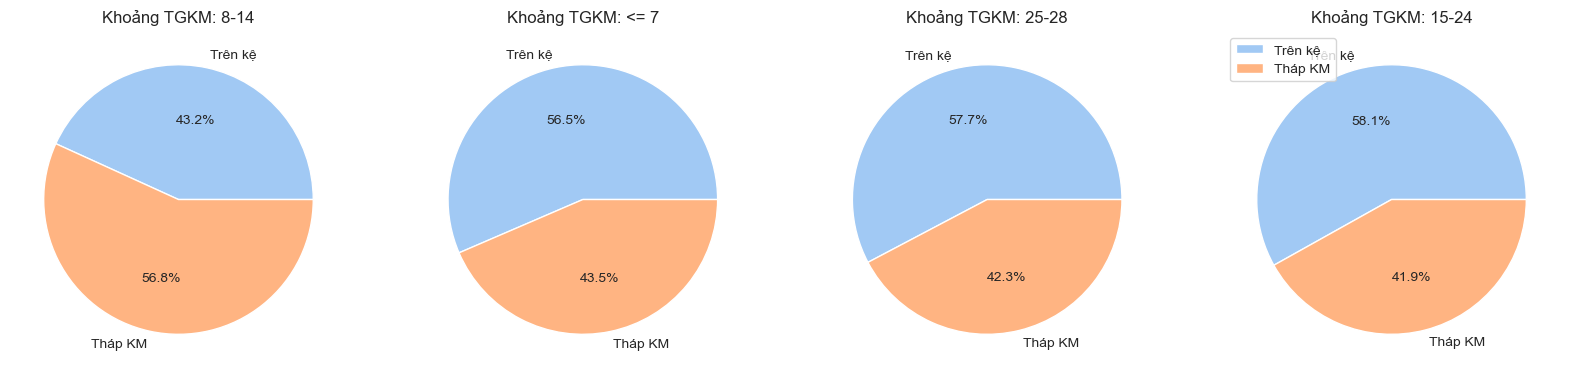

In [316]:
khoangTGKM = filtered_df_all_task['Khoảng TGKM'].unique()
fig = plt.figure(figsize=(20, 20))
for i in range(len(khoangTGKM)):
    khoang = khoangTGKM[i]
    df_khoang = filtered_df_all_task[filtered_df_all_task['Khoảng TGKM'] == khoang]
    labels = df_khoang['Trưng bày'].unique()
    values = df_khoang.groupby('Trưng bày')['Tổng doanh thu'].sum()
    ax = fig.add_subplot(1, 4, i+1)
    ax.pie(values, labels=labels, autopct='%1.1f%%')
    ax.set_title('Khoảng TGKM: {}'.format(khoang))
    fig.add_subplot(ax)
plt.legend()
plt.show();

In [317]:
filtered_df_all_task = filtered_df_all_task.sort_values(by = 'Trưng bày')
filtered_df_all_task

index Khoảng TGKM Trưng bày    Mã SP chính  Tổng doanh thu  \
0       0       15-24   Tháp KM  9252712000043    1.528229e+09   
42     42        <= 7   Tháp KM  9252836000012    9.169206e+08   
43     43        <= 7   Tháp KM  9252836000039    7.656286e+08   
10     10       25-28   Tháp KM  9252712000084    2.726036e+09   
9       9       25-28   Tháp KM  9252712000077    1.932769e+08   
18     18        8-14   Tháp KM  8934839121686    4.651613e+08   
39     39        <= 7   Tháp KM  9252712000303    2.291482e+08   
8       8       25-28   Tháp KM  9252712000043    2.771702e+08   
7       7       25-28   Tháp KM  8934839121723    1.585885e+09   
6       6       25-28   Tháp KM  8934839121686    2.935977e+09   
2       2       15-24   Tháp KM  9252712000372    8.649669e+08   
40     40        <= 7   Tháp KM  9252712000372    1.076797e+09   
41     41        <= 7   Tháp KM  9252712000438    2.702209e+08   
36     36        <= 7   Tháp KM  9252712000077    2.616285e+08   
37     37        <= 7   Tháp KM  9252712000084    5.166999e+08   
19     19        8-14   Tháp KM  8934839121723    2.664891e+08   
35     35        <= 7   Tháp KM  9252712000044    1.399332e+08   
34     34        <= 7   Tháp KM  9252712000043    7.911284e+08   
11     11       25-28   Tháp KM  9252712000214    2.848116e+08   
1       1       15-24   Tháp KM  9252712000303    5.807904e+08   
25     25        8-14   Tháp KM  9252836000012    1.141892e+09   
24     24        8-14   Tháp KM  9252712000438    3.683272e+08   
23     23        8-14   Tháp KM  9252712000372    2.571132e+08   
22     22        8-14   Tháp KM  9252712000303    2.251906e+08   
21     21        8-14   Tháp KM  9252712000214    9.345621e+08   
38     38        <= 7   Tháp KM  9252712000214    6.880464e+08   
20     20        8-14   Tháp KM  9252712000084    8.451619e+08   
27     27        8-14   Trên kệ  8934839121723    4.946919e+08   
15     15       25-28   Trên kệ  9252712000077    8.656332e+08   
45     45        <= 7   Trên kệ  9252712000044    3.007380e+08   
29     29        8-14   Trên kệ  9252712000214    1.267118e+09   
30     30        8-14   Trên kệ  9252712000303    4.325032e+08   
31     31        8-14   Trên kệ  9252712000372    1.280494e+08   
32     32        8-14   Trên kệ  9252712000438    1.055655e+08   
33     33        8-14   Trên kệ  9252836000012    8.675345e+08   
44     44        <= 7   Trên kệ  9252712000043    9.552590e+08   
46     46        <= 7   Trên kệ  9252712000077    5.900716e+08   
26     26        8-14   Trên kệ  8934839121686    8.092789e+08   
47     47        <= 7   Trên kệ  9252712000084    3.990741e+08   
48     48        <= 7   Trên kệ  9252712000214    7.896134e+08   
49     49        <= 7   Trên kệ  9252712000303    3.792599e+08   
50     50        <= 7   Trên kệ  9252712000372    9.806635e+07   
51     51        <= 7   Trên kệ  9252712000438    3.635438e+07   
52     52        <= 7   Trên kệ  9252836000012    3.406860e+08   
28     28        8-14   Trên kệ  9252712000084    1.816517e+09   
53     53        <= 7   Trên kệ  9252836000039    4.705984e+08   
16     16       25-28   Trên kệ  9252712000084    1.256110e+09   
12     12       25-28   Trên kệ  8934839121686    7.230525e+08   
3       3       15-24   Trên kệ  9252712000043    2.704450e+08   
4       4       15-24   Trên kệ  9252712000303    6.316748e+08   
5       5       15-24   Trên kệ  9252712000372    1.241915e+09   
17     17       25-28   Trên kệ  9252712000214    4.211817e+08   
14     14       25-28   Trên kệ  9252712000043    2.216559e+09   
13     13       25-28   Trên kệ  8934839121723    3.796253e+08   

    Tỷ lệ khuyến mãi  
0           0.333400  
42          0.333367  
43          0.333333  
10          0.333333  
9           0.333400  
18          0.333367  
39          0.333400  
8           0.333400  
7           0.333333  
6           0.333333  
2           0.333400  
40          0.333333  
41          0.333367  
36          0.333333  
37          0.333333  
19   

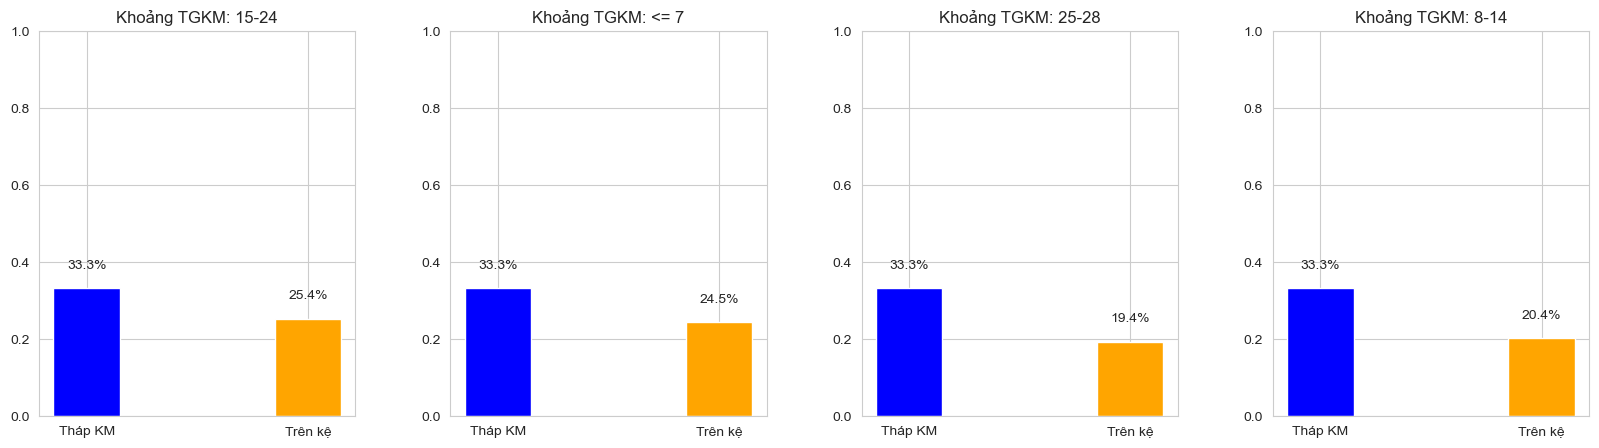

In [318]:
khoangTGKM = filtered_df_all_task['Khoảng TGKM'].unique()
fig, axs = plt.subplots(nrows=1, ncols=len(khoangTGKM), figsize=(20, 5))

for i, khoang in enumerate(khoangTGKM):
    df_khoang = filtered_df_all_task[filtered_df_all_task['Khoảng TGKM'] == khoang]
    labels = df_khoang['Trưng bày'].unique()
    colors = ['blue', 'orange']
    values = df_khoang.groupby('Trưng bày')['Tỷ lệ khuyến mãi'].mean()
    ax = axs[i]
    ax.bar(labels, values, color=colors, width=0.3, align='center', alpha=1)
    ax.set_title('Khoảng TGKM: {}'.format(khoang))
    for j, v in enumerate(values):
        ax.text(j, v+0.05, '{:.1f}%'.format(v*100), ha='center')
    ax.set_ylim([0, 1])
plt.subplots_adjust(wspace=0.3)
plt.show();

## Tính tỷ trọng số mẫu :

In [326]:
df_c_all_mau = df_c.groupby(['Khoảng TGKM','Trưng bày','Mã SP chính']).size().reset_index()
df_c_all_mau

Khoảng TGKM Trưng bày    Mã SP chính     0
0         15-24   Tháp KM  9252712000043  3431
1         15-24   Tháp KM  9252712000303  3338
2         15-24   Tháp KM  9252712000372  1967
3         15-24   Tháp KM  9252712000438  1934
4         15-24   Trên kệ  8934839103903  5174
..          ...       ...            ...   ...
227        > 28   Trên kệ  9252712000372  4230
228        > 28   Trên kệ  9252712000432  2979
229        > 28   Trên kệ  9252836000012  1699
230        > 28   Trên kệ  9252836000039  5089
231        > 28   Trên kệ  9252836000044  3358

[232 rows x 4 columns]

In [327]:
grouped_df_c_all_mau = df_c_all_mau.groupby('Mã SP chính')
filtered_df_all_mau = grouped_df_c_all_mau.filter(lambda x: set(x['Trưng bày']) == set(['Tháp KM', 'Trên kệ']))
filtered_df_all_mau = filtered_df_all_mau[filtered_df_all_mau['Khoảng TGKM'] != '> 28']
filtered_df_all_mau

Khoảng TGKM Trưng bày    Mã SP chính      0
1         15-24   Tháp KM  9252712000303   3338
2         15-24   Tháp KM  9252712000372   1967
3         15-24   Tháp KM  9252712000438   1934
5         15-24   Trên kệ  8934839121686   3451
6         15-24   Trên kệ  8934839121723   3347
8         15-24   Trên kệ  9252712000007   5170
17        15-24   Trên kệ  9252712000084  10092
27        15-24   Trên kệ  9252712000303   2979
34        15-24   Trên kệ  9252712000372   3972
37        15-24   Trên kệ  9252836000039   5103
39        15-24   Trên kệ  9252836000044   8370
41        25-28   Tháp KM  8934839121686   1724
42        25-28   Tháp KM  8934839121723   1671
45        25-28   Tháp KM  9252712000084   1723
47        25-28   Trên kệ  8934839121686   1592
48        25-28   Trên kệ  8934839121723   1599
60        25-28   Trên kệ  9252712000084   1724
77        25-28   Trên kệ  9252712000303   1677
81        25-28   Trên kệ  9252712000372   2127
85        25-28   Trên kệ  9252712000438   2004
87        25-28   Trên kệ  9252836000039   5092
88        25-28   Trên kệ  9252836000044   3375
93         8-14   Tháp KM  8934839121686   3275
94         8-14   Tháp KM  8934839121723   3060
95         8-14   Tháp KM  9252712000084   1713
97         8-14   Tháp KM  9252712000303   1719
98         8-14   Tháp KM  9252712000372    971
99         8-14   Tháp KM  9252712000438   2990
102        8-14   Trên kệ  8934839121686   3199
103        8-14   Trên kệ  8934839121723   3017
107        8-14   Trên kệ  9252712000007   1699
119        8-14   Trên kệ  9252712000084   3420
134        8-14   Trên kệ  9252712000303   4223
142        8-14   Trên kệ  9252712000372   1538
146        8-14   Trên kệ  9252712000438   1000
148        8-14   Trên kệ  9252836000039   6149
150        8-14   Trên kệ  9252836000044   4765
155        <= 7   Tháp KM  8934839121686    821
156        <= 7   Tháp KM  8934839121723   1760
157        <= 7   Tháp KM  9252712000007   1576
161        <= 7   Tháp KM  9252712000084   1555
163        <= 7   Tháp KM  9252712000303   1242
164        <= 7   Tháp KM  9252712000372   3388
165        <= 7   Tháp KM  9252712000438   2004
167        <= 7   Tháp KM  9252836000039   1605
168        <= 7   Tháp KM  9252836000044   1577
177        <= 7   Trên kệ  9252712000084   1686
186        <= 7   Trên kệ  9252712000303   1249
195        <= 7   Trên kệ  9252712000372   1460
198        <= 7   Trên kệ  9252712000438    543
200        <= 7   Trên kệ  9252836000039   1692

In [328]:
filtered_df_all_mau = filtered_df_all_mau.groupby(['Khoảng TGKM', 'Mã SP chính']).filter(lambda x: set(x['Trưng bày']) == set(['Tháp KM', 'Trên kệ'])).reset_index()
filtered_df_all_mau = filtered_df_all_mau.sort_values(by = 'Trưng bày', ascending= False)
filtered_df_all_mau

index Khoảng TGKM Trưng bày    Mã SP chính     0
16    102        8-14   Trên kệ  8934839121686  3199
17    103        8-14   Trên kệ  8934839121723  3017
30    198        <= 7   Trên kệ  9252712000438   543
29    195        <= 7   Trên kệ  9252712000372  1460
28    186        <= 7   Trên kệ  9252712000303  1249
27    177        <= 7   Trên kệ  9252712000084  1686
21    146        8-14   Trên kệ  9252712000438  1000
20    142        8-14   Trên kệ  9252712000372  1538
19    134        8-14   Trên kệ  9252712000303  4223
18    119        8-14   Trên kệ  9252712000084  3420
31    200        <= 7   Trên kệ  9252836000039  1692
2      27       15-24   Trên kệ  9252712000303  2979
3      34       15-24   Trên kệ  9252712000372  3972
9      60       25-28   Trên kệ  9252712000084  1724
8      48       25-28   Trên kệ  8934839121723  1599
7      47       25-28   Trên kệ  8934839121686  1592
11     94        8-14   Tháp KM  8934839121723  3060
23    163        <= 7   Tháp KM  9252712000303  1242
4      41       25-28   Tháp KM  8934839121686  1724
5      42       25-28   Tháp KM  8934839121723  1671
26    167        <= 7   Tháp KM  9252836000039  1605
25    165        <= 7   Tháp KM  9252712000438  2004
24    164        <= 7   Tháp KM  9252712000372  3388
6      45       25-28   Tháp KM  9252712000084  1723
22    161        <= 7   Tháp KM  9252712000084  1555
12     95        8-14   Tháp KM  9252712000084  1713
10     93        8-14   Tháp KM  8934839121686  3275
1       2       15-24   Tháp KM  9252712000372  1967
15     99        8-14   Tháp KM  9252712000438  2990
14     98        8-14   Tháp KM  9252712000372   971
13     97        8-14   Tháp KM  9252712000303  1719
0       1       15-24   Tháp KM  9252712000303  3338

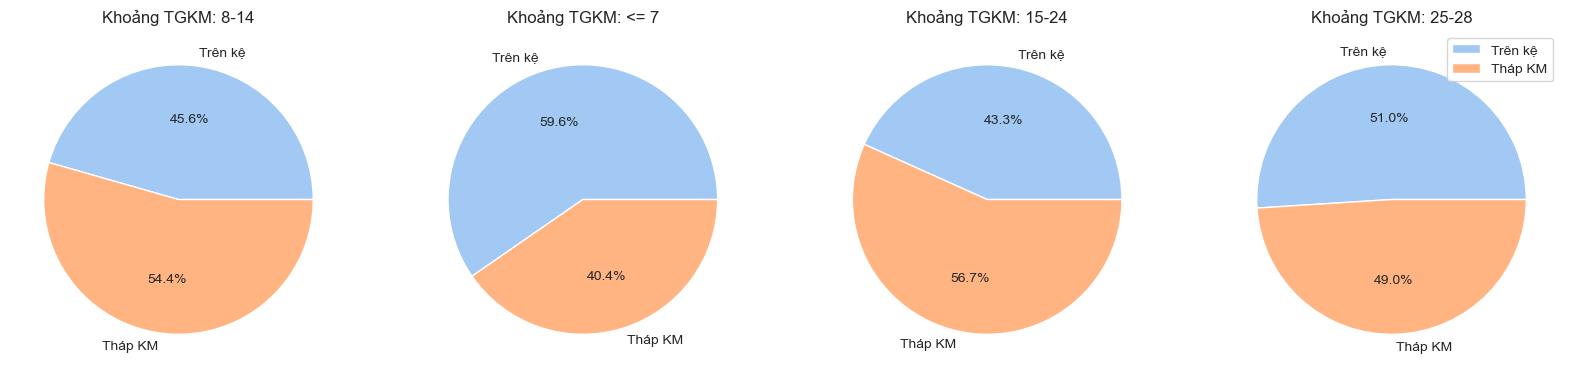

In [329]:
khoangTGKM = filtered_df_all_mau['Khoảng TGKM'].unique()
fig = plt.figure(figsize=(20, 20))
for i in range(len(khoangTGKM)):
    khoang = khoangTGKM[i]
    df_khoang = filtered_df_all_mau[filtered_df_all_mau['Khoảng TGKM'] == khoang]
    labels = df_khoang['Trưng bày'].unique()
    values = df_khoang.groupby('Trưng bày')[0].sum()
    ax = fig.add_subplot(1, 4, i+1)
    ax.pie(values, labels=labels, autopct='%1.1f%%')
    ax.set_title('Khoảng TGKM: {}'.format(khoang))
    fig.add_subplot(ax)
plt.legend()
plt.show();

# Task 1A: Cùng KM trên kệ/trên Ụ, KM như thế nào là hiệu quả?

## Trên kệ: K-prototypes:

In [18]:
master_df['Trưng bày'] = master_df['Trưng bày'].str.replace('Trên Kệ','Trên kệ', regex =True)

In [25]:
df_trenke = master_df[master_df['Trưng bày'] == 'Trên kệ']
df_trenke

Year  Mã CTKM                                           Tên CTKM  \
0       2022   462011             CTKM tháng 3  - (24/03-28/12) -  15955   
1       2022   462011             CTKM tháng 3  - (24/03-28/12) -  15955   
2       2022   462011             CTKM tháng 3  - (24/03-28/12) -  15955   
3       2022   462011             CTKM tháng 3  - (24/03-28/12) -  15955   
4       2022   462011             CTKM tháng 3  - (24/03-28/12) -  15955   
...      ...      ...                                                ...   
459715  2023   731814  CTKM BỔ SUNG  THÁNG 03 (15/03-28/03) Tặng 15k ...   
459716  2023   731814  CTKM BỔ SUNG  THÁNG 03 (15/03-28/03) Tặng 15k ...   
459717  2023   731814  CTKM BỔ SUNG  THÁNG 03 (15/03-28/03) Tặng 15k ...   
459718  2023   731814  CTKM BỔ SUNG  THÁNG 03 (15/03-28/03) Tặng 15k ...   
459719  2023   731814  CTKM BỔ SUNG  THÁNG 03 (15/03-28/03) Tặng 15k ...   

                                               CTKM Ngày bắt đầu  \
0                                          Giảm giá   2022-03-24   
1                                          Giảm giá   2022-03-24   
2                                          Giảm giá   2022-03-24   
3                                          Giảm giá   2022-03-24   
4                                          Giảm giá   2022-03-24   
...                                             ...          ...   
459715  99K Colgate tặng 15k mua thịt, cá, trái cây   2023-03-15   
459716  99K Colgate tặng 15k mua thịt, cá, trái cây   2023-03-15   
459717  99K Colgate tặng 15k mua thịt, cá, trái cây   2023-03-15   
459718  99K Colgate tặng 15k mua thịt, cá, trái cây   2023-03-15   
459719  99K Colgate tặng 15k mua thịt, cá, trái cây   2023-03-15   

       Ngày kết thúc  Thời gian khuyến mãi  Tỷ lệ khuyến mãi       Model  \
0         2022-12-28                   280          0.128205  2107004050   
1         2022-12-28                   280          0.128205  2107004050   
2         2022-12-28                   280          0.128205  2107004050   
3         2022-12-28                   280          0.128205  2107004050   
4         2022-12-28                   280          0.128205  2107004050   
...              ...                   ...               ...         ...   
459715    2023-03-28                    14          0.151515  1607004281   
459716    2023-03-28                    14          0.151515  1607004281   
459717    2023-03-28                    14          0.151515  1607004281   
459718    2023-03-28                    14          0.151515  1607004281   
459719    2023-03-28                    14          0.151515  1607004281   

          Mã SP chính  ...    Brand   DVT  Là thương hiệu nổi tiếng hay không  \
0       9252712000363  ...     2080  Tuýp                                  No   
1       9252712000363  ...     2080  Tuýp                                  No   
2       9252712000363  ...     2080  Tuýp                                  No   
3       9252712000363  ...     2080  Tuýp                                  No   
4       9252712000363  ...     2080  Tuýp                                  No   
...               ...  ...      ...   ...                                 ...   
459715  9252836000012  ...  COLGATE  Tuýp                                 Yes   
459716  9252836000012  ...  COLGATE  Tuýp                                 Yes   
459717  9252836000012  ...  COLGATE  Tuýp                                 Yes   
459718  9252836000012  ...  COLGATE  Tuýp                                 Yes   
459719  9252836000012  ...  COLGATE  Tuýp                                 Yes   

            TE/NL          Size Phân khúc giá Trưng bày  \
0          Trẻ em  Nhỏ (<=100g)           Cao   Trên kệ   
1          Trẻ em  Nhỏ (<=100g)           Cao   Trên kệ   
2          Trẻ em  Nhỏ (<=100g)           Cao   Trên kệ   
3          Trẻ em  Nhỏ (<=100g)           Cao   Trên kệ   
4          Trẻ em  Nhỏ (<=100g)           Cao   Trên kệ   
...           ...           ...       

In [26]:
df_trenke = df_trenke[['CTKM', 'Thời gian khuyến mãi', 'Tỷ lệ khuyến mãi', 'Miền', 'Thu nhập dân cư quanh shop', 'Phân loại mức độ cạnh tranh FMCG', 'Loại ST', 'Công dụng sản phẩm', 'Là thương hiệu nổi tiếng hay không', 'TE/NL', 'Size', 'Phân khúc giá', 'Trưng bày', 'Sức bán thường', 'Tỷ lệ số ngày tồn = 0 / số ngày KM', 'Tỷ lệ tăng trưởng']]
df_trenke

CTKM  Thời gian khuyến mãi  \
0                                          Giảm giá                   280   
1                                          Giảm giá                   280   
2                                          Giảm giá                   280   
3                                          Giảm giá                   280   
4                                          Giảm giá                   280   
...                                             ...                   ...   
459715  99K Colgate tặng 15k mua thịt, cá, trái cây                    14   
459716  99K Colgate tặng 15k mua thịt, cá, trái cây                    14   
459717  99K Colgate tặng 15k mua thịt, cá, trái cây                    14   
459718  99K Colgate tặng 15k mua thịt, cá, trái cây                    14   
459719  99K Colgate tặng 15k mua thịt, cá, trái cây                    14   

        Tỷ lệ khuyến mãi        Miền  \
0               0.128205    Miền Tây   
1               0.128205    Miền Tây   
2               0.128205   Miền Đông   
3               0.128205   Miền Đông   
4               0.128205    Miền Tây   
...                  ...         ...   
459715          0.151515  Cao Nguyên   
459716          0.151515         HCM   
459717          0.151515         HCM   
459718          0.151515    Miền Tây   
459719          0.151515    Miền Tây   

                           Thu nhập dân cư quanh shop  \
0                          Khu dân cư có thu nhập khá   
1           Khu dân cư có thu nhập thấp - nông nghiệp   
2       Khu dân cư có thu nhập thấp - phi nông nghiệp   
3       Khu dân cư có thu nhập thấp - phi nông nghiệp   
4       Khu dân cư có thu nhập thấp - phi nông nghiệp   
...                                               ...   
459715                             Shop không có data   
459716                             Shop không có data   
459717                             Shop không có data   
459718                             Shop không có data   
459719                             Shop không có data   

       Phân loại mức độ cạnh tranh FMCG              Loại ST  \
0                  Không cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
1                        Cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
2                        Cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
3                  Không cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
4                  Không cạnh tranh cao  900 triệu - <1,2 tỷ   
...                                 ...                  ...   
459715               Shop không có data     1,2 tỷ  - < 2 tỷ   
459716               Shop không có data     1,2 tỷ  - < 2 tỷ   
459717               Shop không có data     1,2 tỷ  - < 2 tỷ   
459718               Shop không có data  900 triệu - <1,2 tỷ   
459719               Shop không có data           <900 triệu   

       Công dụng sản phẩm Là thương hiệu nổi tiếng hay không      TE/NL  \
0                Ngừa sâu                                 No     Trẻ em   
1                Ngừa sâu                                 No     Trẻ em   
2                Ngừa sâu                                 No     Trẻ em   
3                Ngừa sâu                                 No     Trẻ em   
4                Ngừa sâu                                 No     Trẻ em   
...                   ...                                ...        ...   
459715           Ngừa sâu                                Yes  Người lớn   
459716           Ngừa sâu                                Yes  Người lớn   
459717           Ngừa sâu                                Yes  Người lớn   
459718           Ngừa sâu                                Yes  Người lớn   
459719           Ngừa sâu                                Yes  Người lớn   

                Size Phân khúc giá Trưng bày  Sức bán thường  \
0       Nhỏ (<=100g)           Cao   Trên kệ          0.1000   
1       Nhỏ (<=100g)           Cao   Trên kệ          0.1000   
2       Nhỏ (<=100g)           Cao   Trên kệ          0.1000   
3       Nhỏ (<=100g)          

In [27]:
col_cat_ke = [df_trenke.columns.get_loc(col) for col in list(df_trenke.select_dtypes('object').columns)]
col_cat_ke

[0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [28]:
X = df_trenke.values
X

array([['Giảm giá', 280, 0.1282051282051282, ..., 0.1, 0.975,
        2.857142857142857],
       ['Giảm giá', 280, 0.1282051282051282, ..., 0.1,
        0.9714285714285714, 1.25],
       ['Giảm giá', 280, 0.1282051282051282, ..., 0.1,
        0.9642857142857143, 1.0],
       ...,
       ['99K Colgate tặng 15k mua thịt, cá, trái cây', 14,
        0.1515151515151515, ..., 0.1429, 0.0, 0.0],
       ['99K Colgate tặng 15k mua thịt, cá, trái cây', 14,
        0.1515151515151515, ..., 0.2857, 0.0, 0.0],
       ['99K Colgate tặng 15k mua thịt, cá, trái cây', 14,
        0.1515151515151515, ..., 0.0, 0.0, 0.0]], dtype=object)

In [35]:
kproto = KPrototypes(n_jobs = -1, n_clusters= 2, init='Huang', verbose=0)
clusters = kproto.fit_predict(X, categorical=col_cat_ke)
df_trenke['Cluster'] = clusters
df_trenke.head()

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_18330/1174858443.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trenke['Cluster'] = clusters


CTKM  Thời gian khuyến mãi  Tỷ lệ khuyến mãi       Miền  \
0  Giảm giá                   280          0.128205   Miền Tây   
1  Giảm giá                   280          0.128205   Miền Tây   
2  Giảm giá                   280          0.128205  Miền Đông   
3  Giảm giá                   280          0.128205  Miền Đông   
4  Giảm giá                   280          0.128205   Miền Tây   

                      Thu nhập dân cư quanh shop  \
0                     Khu dân cư có thu nhập khá   
1      Khu dân cư có thu nhập thấp - nông nghiệp   
2  Khu dân cư có thu nhập thấp - phi nông nghiệp   
3  Khu dân cư có thu nhập thấp - phi nông nghiệp   
4  Khu dân cư có thu nhập thấp - phi nông nghiệp   

  Phân loại mức độ cạnh tranh FMCG              Loại ST Công dụng sản phẩm  \
0             Không cạnh tranh cao     1,2 tỷ  - < 2 tỷ           Ngừa sâu   
1                   Cạnh tranh cao     1,2 tỷ  - < 2 tỷ           Ngừa sâu   
2                   Cạnh tranh cao     1,2 tỷ  - < 2 tỷ           Ngừa sâu   
3             Không cạnh tranh cao     1,2 tỷ  - < 2 tỷ           Ngừa sâu   
4             Không cạnh tranh cao  900 triệu - <1,2 tỷ           Ngừa sâu   

  Là thương hiệu nổi tiếng hay không   TE/NL          Size Phân khúc giá  \
0                                 No  Trẻ em  Nhỏ (<=100g)           Cao   
1                                 No  Trẻ em  Nhỏ (<=100g)           Cao   
2                                 No  Trẻ em  Nhỏ (<=100g)           Cao   
3                                 No  Trẻ em  Nhỏ (<=100g)           Cao   
4                                 No  Trẻ em  Nhỏ (<=100g)           Cao   

  Trưng bày  Sức bán thường  Tỷ lệ số ngày tồn = 0 / số ngày KM  \
0   Trên kệ             0.1                            0.975000   
1   Trên kệ             0.1                            0.971429   
2   Trên kệ             0.1                            0.964286   
3   Trên kệ             0.1                            0.960714   
4   Trên kệ             0.1                            0.960714   

   Tỷ lệ tăng trưởng  Cluster  
0           2.857143        1  
1           1.250000        1  
2           1.000000        1  
3           3.636364        1  
4           1.818182        1

In [41]:
cluster_num = df_trenke.groupby('Cluster')['CTKM'].count().sort_values(ascending = False)
cluster_num

Cluster
0    366686
1     17842
Name: CTKM, dtype: int64

In [43]:
df_clus_0 = df_trenke[df_trenke['Cluster'] == 0]
df_clus_0

CTKM  Thời gian khuyến mãi  \
3605                                       Giảm giá                    76   
3658                                       Giảm giá                    76   
3791                                       Giảm giá                    76   
3901                                       Giảm giá                    76   
3902                                       Giảm giá                    76   
...                                             ...                   ...   
459715  99K Colgate tặng 15k mua thịt, cá, trái cây                    14   
459716  99K Colgate tặng 15k mua thịt, cá, trái cây                    14   
459717  99K Colgate tặng 15k mua thịt, cá, trái cây                    14   
459718  99K Colgate tặng 15k mua thịt, cá, trái cây                    14   
459719  99K Colgate tặng 15k mua thịt, cá, trái cây                    14   

        Tỷ lệ khuyến mãi        Miền  \
3605            0.250000    Miền Tây   
3658            0.250000    Miền Tây   
3791            0.250000    Miền Tây   
3901            0.304348    Miền Tây   
3902            0.250000    Miền Tây   
...                  ...         ...   
459715          0.151515  Cao Nguyên   
459716          0.151515         HCM   
459717          0.151515         HCM   
459718          0.151515    Miền Tây   
459719          0.151515    Miền Tây   

                           Thu nhập dân cư quanh shop  \
3605    Khu dân cư có thu nhập thấp - phi nông nghiệp   
3658        Khu dân cư có thu nhập thấp - nông nghiệp   
3791        Khu dân cư có thu nhập thấp - nông nghiệp   
3901        Khu dân cư có thu nhập thấp - nông nghiệp   
3902        Khu dân cư có thu nhập thấp - nông nghiệp   
...                                               ...   
459715                             Shop không có data   
459716                             Shop không có data   
459717                             Shop không có data   
459718                             Shop không có data   
459719                             Shop không có data   

       Phân loại mức độ cạnh tranh FMCG              Loại ST  \
3605                     Cạnh tranh cao  900 triệu - <1,2 tỷ   
3658                     Cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
3791                     Cạnh tranh cao  900 triệu - <1,2 tỷ   
3901               Không cạnh tranh cao        2 tỷ - < 5 tỷ   
3902                     Cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
...                                 ...                  ...   
459715               Shop không có data     1,2 tỷ  - < 2 tỷ   
459716               Shop không có data     1,2 tỷ  - < 2 tỷ   
459717               Shop không có data     1,2 tỷ  - < 2 tỷ   
459718               Shop không có data  900 triệu - <1,2 tỷ   
459719               Shop không có data           <900 triệu   

          Công dụng sản phẩm Là thương hiệu nổi tiếng hay không      TE/NL  \
3605                Thơm mát                                 No  Người lớn   
3658                Thơm mát                                 No  Người lớn   
3791                Thơm mát                                 No  Người lớn   
3901    Trắng răng, thơm mát                                 No  Người lớn   
3902                Thơm mát                                 No  Người lớn   
...                      ...                                ...        ...   
459715              Ngừa sâu                                Yes  Người lớn   
459716              Ngừa sâu                                Yes  Người lớn   
459717              Ngừa sâu                                Yes  Người lớn   
459718              Ngừa sâu                                Yes  Người lớn   
459719              Ngừa sâu                                Yes  Người lớn   

                   Size Phân khúc giá Trưng bày  Sức bán thường  \
3605    Vừa (100g-200g)            Rẻ   Trên kệ          0.1000   
3658    Vừa (100g-200g)            Rẻ   Trên kệ          0.1000   
3791    Vừa (100g-200g)            Rẻ   Trên kệ  

In [44]:
X0 = df_clus_0.values
X0

array([['Giảm giá', 76, 0.25, ..., 0.9868421052631579, 10.0, 0],
       ['Giảm giá', 76, 0.25, ..., 0.9736842105263158, 10.0, 0],
       ['Giảm giá', 76, 0.25, ..., 0.9473684210526315, 2.5, 0],
       ...,
       ['99K Colgate tặng 15k mua thịt, cá, trái cây', 14,
        0.1515151515151515, ..., 0.0, 0.0, 0],
       ['99K Colgate tặng 15k mua thịt, cá, trái cây', 14,
        0.1515151515151515, ..., 0.0, 0.0, 0],
       ['99K Colgate tặng 15k mua thịt, cá, trái cây', 14,
        0.1515151515151515, ..., 0.0, 0.0, 0]], dtype=object)

In [55]:
kproto = KPrototypes(n_jobs = -1, n_clusters= 3, init='Huang', verbose=0)
clusters = kproto.fit_predict(X0, categorical=col_cat_ke)
df_clus_0['Cluster_nhỏ'] = clusters
df_clus_0.head()

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_18330/2187385379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clus_0['Cluster_nhỏ'] = clusters


CTKM  Thời gian khuyến mãi  Tỷ lệ khuyến mãi      Miền  \
3605  Giảm giá                    76          0.250000  Miền Tây   
3658  Giảm giá                    76          0.250000  Miền Tây   
3791  Giảm giá                    76          0.250000  Miền Tây   
3901  Giảm giá                    76          0.304348  Miền Tây   
3902  Giảm giá                    76          0.250000  Miền Tây   

                         Thu nhập dân cư quanh shop  \
3605  Khu dân cư có thu nhập thấp - phi nông nghiệp   
3658      Khu dân cư có thu nhập thấp - nông nghiệp   
3791      Khu dân cư có thu nhập thấp - nông nghiệp   
3901      Khu dân cư có thu nhập thấp - nông nghiệp   
3902      Khu dân cư có thu nhập thấp - nông nghiệp   

     Phân loại mức độ cạnh tranh FMCG              Loại ST  \
3605                   Cạnh tranh cao  900 triệu - <1,2 tỷ   
3658                   Cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
3791                   Cạnh tranh cao  900 triệu - <1,2 tỷ   
3901             Không cạnh tranh cao        2 tỷ - < 5 tỷ   
3902                   Cạnh tranh cao     1,2 tỷ  - < 2 tỷ   

        Công dụng sản phẩm Là thương hiệu nổi tiếng hay không      TE/NL  \
3605              Thơm mát                                 No  Người lớn   
3658              Thơm mát                                 No  Người lớn   
3791              Thơm mát                                 No  Người lớn   
3901  Trắng răng, thơm mát                                 No  Người lớn   
3902              Thơm mát                                 No  Người lớn   

                 Size Phân khúc giá Trưng bày  Sức bán thường  \
3605  Vừa (100g-200g)            Rẻ   Trên kệ             0.1   
3658  Vừa (100g-200g)            Rẻ   Trên kệ             0.1   
3791  Vừa (100g-200g)            Rẻ   Trên kệ             0.1   
3901  Vừa (100g-200g)            Rẻ   Trên kệ             0.1   
3902  Vừa (100g-200g)            Rẻ   Trên kệ             0.1   

      Tỷ lệ số ngày tồn = 0 / số ngày KM  Tỷ lệ tăng trưởng  Cluster  \
3605                            0.986842               10.0        0   
3658                            0.973684               10.0        0   
3791                            0.947368                2.5        0   
3901                            0.934211               76.0        0   
3902                            0.934211                2.0        0   

      Cluster_nhỏ  
3605            0  
3658            0  
3791            0  
3901            0  
3902            0

In [57]:
df_clus_0

CTKM  Thời gian khuyến mãi  \
3605                                       Giảm giá                    76   
3658                                       Giảm giá                    76   
3791                                       Giảm giá                    76   
3901                                       Giảm giá                    76   
3902                                       Giảm giá                    76   
...                                             ...                   ...   
459715  99K Colgate tặng 15k mua thịt, cá, trái cây                    14   
459716  99K Colgate tặng 15k mua thịt, cá, trái cây                    14   
459717  99K Colgate tặng 15k mua thịt, cá, trái cây                    14   
459718  99K Colgate tặng 15k mua thịt, cá, trái cây                    14   
459719  99K Colgate tặng 15k mua thịt, cá, trái cây                    14   

        Tỷ lệ khuyến mãi        Miền  \
3605            0.250000    Miền Tây   
3658            0.250000    Miền Tây   
3791            0.250000    Miền Tây   
3901            0.304348    Miền Tây   
3902            0.250000    Miền Tây   
...                  ...         ...   
459715          0.151515  Cao Nguyên   
459716          0.151515         HCM   
459717          0.151515         HCM   
459718          0.151515    Miền Tây   
459719          0.151515    Miền Tây   

                           Thu nhập dân cư quanh shop  \
3605    Khu dân cư có thu nhập thấp - phi nông nghiệp   
3658        Khu dân cư có thu nhập thấp - nông nghiệp   
3791        Khu dân cư có thu nhập thấp - nông nghiệp   
3901        Khu dân cư có thu nhập thấp - nông nghiệp   
3902        Khu dân cư có thu nhập thấp - nông nghiệp   
...                                               ...   
459715                             Shop không có data   
459716                             Shop không có data   
459717                             Shop không có data   
459718                             Shop không có data   
459719                             Shop không có data   

       Phân loại mức độ cạnh tranh FMCG              Loại ST  \
3605                     Cạnh tranh cao  900 triệu - <1,2 tỷ   
3658                     Cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
3791                     Cạnh tranh cao  900 triệu - <1,2 tỷ   
3901               Không cạnh tranh cao        2 tỷ - < 5 tỷ   
3902                     Cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
...                                 ...                  ...   
459715               Shop không có data     1,2 tỷ  - < 2 tỷ   
459716               Shop không có data     1,2 tỷ  - < 2 tỷ   
459717               Shop không có data     1,2 tỷ  - < 2 tỷ   
459718               Shop không có data  900 triệu - <1,2 tỷ   
459719               Shop không có data           <900 triệu   

          Công dụng sản phẩm Là thương hiệu nổi tiếng hay không      TE/NL  \
3605                Thơm mát                                 No  Người lớn   
3658                Thơm mát                                 No  Người lớn   
3791                Thơm mát                                 No  Người lớn   
3901    Trắng răng, thơm mát                                 No  Người lớn   
3902                Thơm mát                                 No  Người lớn   
...                      ...                                ...        ...   
459715              Ngừa sâu                                Yes  Người lớn   
459716              Ngừa sâu                                Yes  Người lớn   
459717              Ngừa sâu                                Yes  Người lớn   
459718              Ngừa sâu                                Yes  Người lớn   
459719              Ngừa sâu                                Yes  Người lớn   

                   Size Phân khúc giá Trưng bày  Sức bán thường  \
3605    Vừa (100g-200g)            Rẻ   Trên kệ          0.1000   
3658    Vừa (100g-200g)            Rẻ   Trên kệ          0.1000   
3791    Vừa (100g-200g)            Rẻ   Trên kệ  

In [58]:
cluster_num_lan1 = df_clus_0.groupby('Cluster_nhỏ')['CTKM'].count().sort_values(ascending = False)
cluster_num_lan1

Cluster_nhỏ
2    171387
1    156417
0     38882
Name: CTKM, dtype: int64

In [59]:
df_trenke_cumnho_1 = df_clus_0[df_clus_0['Cluster_nhỏ'] == 1]
df_trenke_cumnho_2 = df_clus_0[df_clus_0['Cluster_nhỏ'] == 2]

In [61]:
X0_1 = df_trenke_cumnho_1.values
X0_2 = df_trenke_cumnho_2.values 

In [62]:
kproto = KPrototypes(n_jobs = -1, n_clusters= 3, init='Huang', verbose=0)
clusters = kproto.fit_predict(X0_1, categorical=col_cat_ke)
df_trenke_cumnho_1['Cluster_nhỏ_1'] = clusters
df_trenke_cumnho_1.head()

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_18330/5018354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trenke_cumnho_1['Cluster_nhỏ_1'] = clusters


CTKM  Thời gian khuyến mãi  \
8995                              Giảm giá                    20   
9014                              Giảm giá                    20   
9761      HĐ P/S 89,000đ được giảm 15,000đ                    19   
10098  Bán kèm - SP cùng loại giảm giá 50%                    16   
10099  Bán kèm - SP cùng loại giảm giá 50%                    16   

       Tỷ lệ khuyến mãi        Miền  \
8995           0.154762         HCM   
9014           0.127660   Miền Đông   
9761           0.168539         HCM   
10098          0.250000   Miền Đông   
10099          0.250000  Cao Nguyên   

                          Thu nhập dân cư quanh shop  \
8995   Khu dân cư có thu nhập thấp - phi nông nghiệp   
9014                      Khu dân cư có thu nhập khá   
9761                              Shop không có data   
10098                     Khu dân cư có thu nhập khá   
10099      Khu dân cư có thu nhập thấp - nông nghiệp   

      Phân loại mức độ cạnh tranh FMCG              Loại ST  \
8995                    Cạnh tranh cao  900 triệu - <1,2 tỷ   
9014              Không cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
9761              Không cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
10098             Không cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
10099                   Cạnh tranh cao           <900 triệu   

      Công dụng sản phẩm Là thương hiệu nổi tiếng hay không      TE/NL  \
8995            Thơm mát                                Yes  Người lớn   
9014            Ngừa sâu                                Yes  Người lớn   
9761            Ngừa sâu                                Yes  Người lớn   
10098           Thơm mát                                Yes  Người lớn   
10099           Thơm mát                                Yes  Người lớn   

                  Size Phân khúc giá Trưng bày  Sức bán thường  \
8995   Vừa (100g-200g)         Trung   Trên kệ        0.047633   
9014   Vừa (100g-200g)           Cao   Trên kệ        0.023817   
9761   Vừa (100g-200g)           Cao   Trên kệ        0.100000   
10098      Lớn (>200g)         Trung   Trên kệ        0.285700   
10099      Lớn (>200g)         Trung   Trên kệ        0.100000   

       Tỷ lệ số ngày tồn = 0 / số ngày KM  Tỷ lệ tăng trưởng  Cluster  \
8995                             0.950000         100.000000        0   
9014                             0.950000          41.987404        0   
9761                             0.894737          35.000000        0   
10098                            0.937500           3.500175        0   
10099                            0.937500           0.000000        0   

       Cluster_nhỏ  Cluster_nhỏ_1  
8995             1              0  
9014             1              0  
9761             1              0  
10098            1              2  
10099            1              2

In [63]:
kproto = KPrototypes(n_jobs = -1, n_clusters= 3, init='Huang', verbose=0)
clusters = kproto.fit_predict(X0_2, categorical=col_cat_ke)
df_trenke_cumnho_2['Cluster_nhỏ_1'] = clusters
df_trenke_cumnho_2.head()

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_18330/3120211360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trenke_cumnho_2['Cluster_nhỏ_1'] = clusters


CTKM  Thời gian khuyến mãi  Tỷ lệ khuyến mãi       Miền  \
7220  Giảm giá                    28          0.166667   Miền Tây   
7221  Giảm giá                    28          0.166667   Miền Tây   
7222  Giảm giá                    28          0.115385  Miền Đông   
7223  Giảm giá                    28          0.115385   Miền Tây   
7224  Giảm giá                    28          0.144444   Miền Tây   

                     Thu nhập dân cư quanh shop  \
7220  Khu dân cư có thu nhập thấp - nông nghiệp   
7221                         Shop không có data   
7222  Khu dân cư có thu nhập thấp - nông nghiệp   
7223  Khu dân cư có thu nhập thấp - nông nghiệp   
7224  Khu dân cư có thu nhập thấp - nông nghiệp   

     Phân loại mức độ cạnh tranh FMCG           Loại ST Công dụng sản phẩm  \
7220                   Cạnh tranh cao  1,2 tỷ  - < 2 tỷ         Trắng răng   
7221                   Cạnh tranh cao  1,2 tỷ  - < 2 tỷ         Trắng răng   
7222                   Cạnh tranh cao        <900 triệu           Thơm mát   
7223                   Cạnh tranh cao        <900 triệu           Thơm mát   
7224             Không cạnh tranh cao  1,2 tỷ  - < 2 tỷ           Thơm mát   

     Là thương hiệu nổi tiếng hay không      TE/NL             Size  \
7220                                Yes  Người lớn      Lớn (>200g)   
7221                                Yes  Người lớn      Lớn (>200g)   
7222                                Yes  Người lớn  Vừa (100g-200g)   
7223                                Yes  Người lớn  Vừa (100g-200g)   
7224                                Yes  Người lớn      Lớn (>200g)   

     Phân khúc giá Trưng bày  Sức bán thường  \
7220         Trung   Trên kệ         0.42860   
7221         Trung   Trên kệ         0.11655   
7222           Cao   Trên kệ         0.42860   
7223           Cao   Trên kệ         0.14290   
7224         Trung   Trên kệ         0.42860   

      Tỷ lệ số ngày tồn = 0 / số ngày KM  Tỷ lệ tăng trưởng  Cluster  \
7220                            0.964286           2.333178        0   
7221                            0.964286           8.580009        0   
7222                            0.964286           2.333178        0   
7223                            0.964286          13.995801        0   
7224                            0.964286           2.333178        0   

      Cluster_nhỏ  Cluster_nhỏ_1  
7220            2              2  
7221            2              0  
7222            2              2  
7223            2              0  
7224            2              2

In [64]:
cluster_num_lan2_1 = df_trenke_cumnho_1.groupby('Cluster_nhỏ_1')['CTKM'].count().sort_values(ascending = False)
cluster_num_lan2_1

Cluster_nhỏ_1
2    108060
1     45808
0      2549
Name: CTKM, dtype: int64

In [65]:
cluster_num_lan2_2 = df_trenke_cumnho_2.groupby('Cluster_nhỏ_1')['CTKM'].count().sort_values(ascending = False)
cluster_num_lan2_2

Cluster_nhỏ_1
1    89649
2    76607
0     5131
Name: CTKM, dtype: int64

In [67]:
df_trenke_cumnho_0 = df_clus_0[df_clus_0['Cluster_nhỏ'] == 0]

In [68]:
df_clus_1 = df_trenke[df_trenke['Cluster'] == 1]

In [70]:
df_phancum_trenke = pd.concat([df_trenke_cumnho_0, df_trenke_cumnho_1, df_trenke_cumnho_2, df_clus_1])
df_phancum_trenke

CTKM  Thời gian khuyến mãi  Tỷ lệ khuyến mãi      Miền  \
3605    Giảm giá                    76          0.250000  Miền Tây   
3658    Giảm giá                    76          0.250000  Miền Tây   
3791    Giảm giá                    76          0.250000  Miền Tây   
3901    Giảm giá                    76          0.304348  Miền Tây   
3902    Giảm giá                    76          0.250000  Miền Tây   
...          ...                   ...               ...       ...   
230756  Giảm giá                   113          0.128205       HCM   
230757  Giảm giá                   113          0.128205       HCM   
230758  Giảm giá                   113          0.128205       HCM   
230759  Giảm giá                   113          0.128205  Miền Tây   
230760  Giảm giá                   113          0.128205  Miền Tây   

                           Thu nhập dân cư quanh shop  \
3605    Khu dân cư có thu nhập thấp - phi nông nghiệp   
3658        Khu dân cư có thu nhập thấp - nông nghiệp   
3791        Khu dân cư có thu nhập thấp - nông nghiệp   
3901        Khu dân cư có thu nhập thấp - nông nghiệp   
3902        Khu dân cư có thu nhập thấp - nông nghiệp   
...                                               ...   
230756                             Shop không có data   
230757                             Shop không có data   
230758                             Shop không có data   
230759                             Shop không có data   
230760                             Shop không có data   

       Phân loại mức độ cạnh tranh FMCG              Loại ST  \
3605                     Cạnh tranh cao  900 triệu - <1,2 tỷ   
3658                     Cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
3791                     Cạnh tranh cao  900 triệu - <1,2 tỷ   
3901               Không cạnh tranh cao        2 tỷ - < 5 tỷ   
3902                     Cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
...                                 ...                  ...   
230756               Shop không có data  900 triệu - <1,2 tỷ   
230757               Shop không có data           <900 triệu   
230758               Shop không có data  900 triệu - <1,2 tỷ   
230759             Không cạnh tranh cao           <900 triệu   
230760               Shop không có data           <900 triệu   

          Công dụng sản phẩm Là thương hiệu nổi tiếng hay không      TE/NL  \
3605                Thơm mát                                 No  Người lớn   
3658                Thơm mát                                 No  Người lớn   
3791                Thơm mát                                 No  Người lớn   
3901    Trắng răng, thơm mát                                 No  Người lớn   
3902                Thơm mát                                 No  Người lớn   
...                      ...                                ...        ...   
230756              Ngừa sâu                                 No     Trẻ em   
230757              Ngừa sâu                                 No     Trẻ em   
230758              Ngừa sâu                                 No     Trẻ em   
230759              Ngừa sâu                                 No     Trẻ em   
230760              Ngừa sâu                                 No     Trẻ em   

                   Size Phân khúc giá Trưng bày  Sức bán thường  \
3605    Vừa (100g-200g)            Rẻ   Trên kệ             0.1   
3658    Vừa (100g-200g)            Rẻ   Trên kệ             0.1   
3791    Vừa (100g-200g)            Rẻ   Trên kệ             0.1   
3901    Vừa (100g-200g)            Rẻ   Trên kệ             0.1   
3902    Vừa (100g-200g)            Rẻ   Trên kệ             0.1   
...                 ...           ...       ...             ...   
230756     Nhỏ (<=100g)           Cao   Trên kệ             0.1   
230757     Nhỏ (<=100g)           Cao   Trên kệ             0.1   
230758     Nhỏ (<=100g)           Cao   Trên kệ             0.1   
230759     Nhỏ (<=100g)           Cao   Trên kệ             0.1   
230760     Nhỏ (<=100g)           Cao   Trê

In [71]:
df_phancum_trenke['Phân cụm'] = '0'
df_phancum_trenke['Phân cụm'].loc[(df_phancum_trenke['Cluster'] == 1)] = 'Cụm 0'
df_phancum_trenke['Phân cụm'].loc[(df_phancum_trenke['Cluster_nhỏ'] == 0.0)] = 'Cụm 1'
df_phancum_trenke['Phân cụm'].loc[(df_phancum_trenke['Cluster_nhỏ'] == 1.0) & (df_phancum_trenke['Cluster_nhỏ_1'] == 0.0)] = 'Cụm 2'
df_phancum_trenke['Phân cụm'].loc[(df_phancum_trenke['Cluster_nhỏ'] == 1.0) & (df_phancum_trenke['Cluster_nhỏ_1'] == 1.0)] = 'Cụm 3'
df_phancum_trenke['Phân cụm'].loc[(df_phancum_trenke['Cluster_nhỏ'] == 1.0) & (df_phancum_trenke['Cluster_nhỏ_1'] == 2.0)] = 'Cụm 4'
df_phancum_trenke['Phân cụm'].loc[(df_phancum_trenke['Cluster_nhỏ'] == 2.0) & (df_phancum_trenke['Cluster_nhỏ_1'] == 0.0)] = 'Cụm 5'
df_phancum_trenke['Phân cụm'].loc[(df_phancum_trenke['Cluster_nhỏ'] == 2.0) & (df_phancum_trenke['Cluster_nhỏ_1'] == 1.0)] = 'Cụm 6'
df_phancum_trenke['Phân cụm'].loc[(df_phancum_trenke['Cluster_nhỏ'] == 2.0) & (df_phancum_trenke['Cluster_nhỏ_1'] == 2.0)] = 'Cụm 7'
df_phancum_trenke

/Users/ricardokaizen/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


CTKM  Thời gian khuyến mãi  Tỷ lệ khuyến mãi      Miền  \
3605    Giảm giá                    76          0.250000  Miền Tây   
3658    Giảm giá                    76          0.250000  Miền Tây   
3791    Giảm giá                    76          0.250000  Miền Tây   
3901    Giảm giá                    76          0.304348  Miền Tây   
3902    Giảm giá                    76          0.250000  Miền Tây   
...          ...                   ...               ...       ...   
230756  Giảm giá                   113          0.128205       HCM   
230757  Giảm giá                   113          0.128205       HCM   
230758  Giảm giá                   113          0.128205       HCM   
230759  Giảm giá                   113          0.128205  Miền Tây   
230760  Giảm giá                   113          0.128205  Miền Tây   

                           Thu nhập dân cư quanh shop  \
3605    Khu dân cư có thu nhập thấp - phi nông nghiệp   
3658        Khu dân cư có thu nhập thấp - nông nghiệp   
3791        Khu dân cư có thu nhập thấp - nông nghiệp   
3901        Khu dân cư có thu nhập thấp - nông nghiệp   
3902        Khu dân cư có thu nhập thấp - nông nghiệp   
...                                               ...   
230756                             Shop không có data   
230757                             Shop không có data   
230758                             Shop không có data   
230759                             Shop không có data   
230760                             Shop không có data   

       Phân loại mức độ cạnh tranh FMCG              Loại ST  \
3605                     Cạnh tranh cao  900 triệu - <1,2 tỷ   
3658                     Cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
3791                     Cạnh tranh cao  900 triệu - <1,2 tỷ   
3901               Không cạnh tranh cao        2 tỷ - < 5 tỷ   
3902                     Cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
...                                 ...                  ...   
230756               Shop không có data  900 triệu - <1,2 tỷ   
230757               Shop không có data           <900 triệu   
230758               Shop không có data  900 triệu - <1,2 tỷ   
230759             Không cạnh tranh cao           <900 triệu   
230760               Shop không có data           <900 triệu   

          Công dụng sản phẩm Là thương hiệu nổi tiếng hay không      TE/NL  \
3605                Thơm mát                                 No  Người lớn   
3658                Thơm mát                                 No  Người lớn   
3791                Thơm mát                                 No  Người lớn   
3901    Trắng răng, thơm mát                                 No  Người lớn   
3902                Thơm mát                                 No  Người lớn   
...                      ...                                ...        ...   
230756              Ngừa sâu                                 No     Trẻ em   
230757              Ngừa sâu                                 No     Trẻ em   
230758              Ngừa sâu                                 No     Trẻ em   
230759              Ngừa sâu                                 No     Trẻ em   
230760              Ngừa sâu                                 No     Trẻ em   

                   Size Phân khúc giá Trưng bày  Sức bán thường  \
3605    Vừa (100g-200g)            Rẻ   Trên kệ             0.1   
3658    Vừa (100g-200g)            Rẻ   Trên kệ             0.1   
3791    Vừa (100g-200g)            Rẻ   Trên kệ             0.1   
3901    Vừa (100g-200g)            Rẻ   Trên kệ             0.1   
3902    Vừa (100g-200g)            Rẻ   Trên kệ             0.1   
...                 ...           ...       ...             ...   
230756     Nhỏ (<=100g)           Cao   Trên kệ             0.1   
230757     Nhỏ (<=100g)           Cao   Trên kệ             0.1   
230758     Nhỏ (<=100g)           Cao   Trên kệ             0.1   
230759     Nhỏ (<=100g)           Cao   Trên kệ             0.1   
230760     Nhỏ (<=100g)           Cao   Trê

In [73]:
cluster_num_phancum = df_phancum_trenke.groupby('Phân cụm')['CTKM'].count().sort_values(ascending = False).reset_index()
cluster_num_phancum

Phân cụm    CTKM
0    Cụm 4  108060
1    Cụm 6   89649
2    Cụm 7   76607
3    Cụm 3   45808
4    Cụm 1   38882
5    Cụm 0   17842
6    Cụm 5    5131
7    Cụm 2    2549

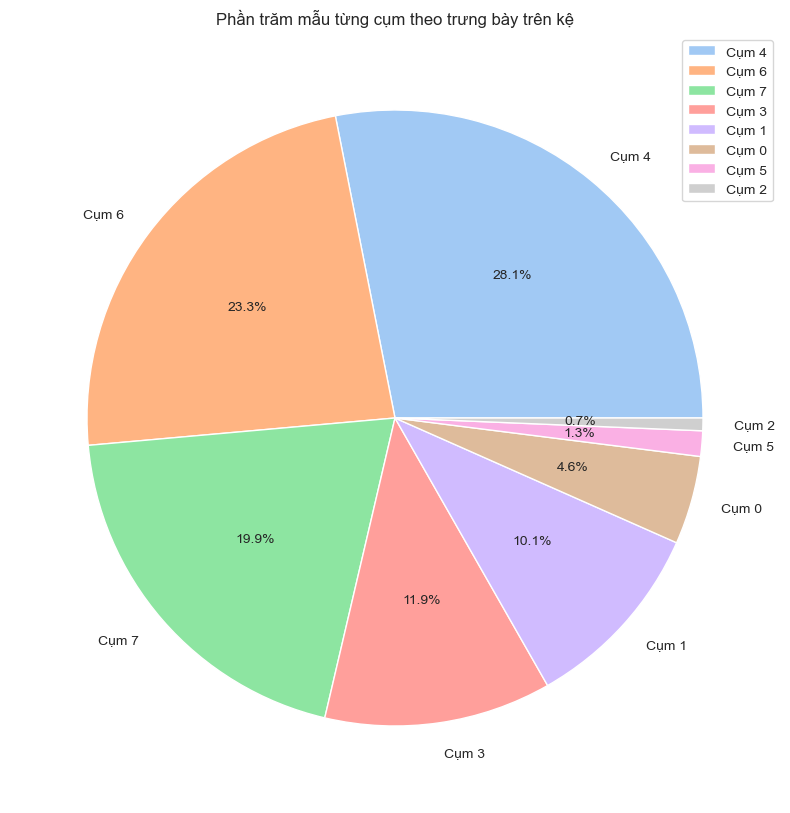

In [77]:
plt.figure(figsize=(10,10))
plt.title('Phần trăm mẫu từng cụm theo trưng bày trên kệ')
sns.set_palette('pastel')
sns.set_style('whitegrid')
plt.pie(cluster_num_phancum['CTKM'], labels=cluster_num_phancum['Phân cụm'], autopct='%1.1f%%')
plt.legend()
plt.show();

- Các cụm lớn bao gồm: Cụm 4, cụm 6, cụm 7
- Các cụm trung bình: Cụm 1, cụm 3
- Các cụm nhỏ: Cụm 0, cụm 2, cụm 5

In [93]:
df_phancum_trenke

CTKM  Thời gian khuyến mãi  Tỷ lệ khuyến mãi      Miền  \
3605    Giảm giá                    76          0.250000  Miền Tây   
3658    Giảm giá                    76          0.250000  Miền Tây   
3791    Giảm giá                    76          0.250000  Miền Tây   
3901    Giảm giá                    76          0.304348  Miền Tây   
3902    Giảm giá                    76          0.250000  Miền Tây   
...          ...                   ...               ...       ...   
230756  Giảm giá                   113          0.128205       HCM   
230757  Giảm giá                   113          0.128205       HCM   
230758  Giảm giá                   113          0.128205       HCM   
230759  Giảm giá                   113          0.128205  Miền Tây   
230760  Giảm giá                   113          0.128205  Miền Tây   

                           Thu nhập dân cư quanh shop  \
3605    Khu dân cư có thu nhập thấp - phi nông nghiệp   
3658        Khu dân cư có thu nhập thấp - nông nghiệp   
3791        Khu dân cư có thu nhập thấp - nông nghiệp   
3901        Khu dân cư có thu nhập thấp - nông nghiệp   
3902        Khu dân cư có thu nhập thấp - nông nghiệp   
...                                               ...   
230756                             Shop không có data   
230757                             Shop không có data   
230758                             Shop không có data   
230759                             Shop không có data   
230760                             Shop không có data   

       Phân loại mức độ cạnh tranh FMCG              Loại ST  \
3605                     Cạnh tranh cao  900 triệu - <1,2 tỷ   
3658                     Cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
3791                     Cạnh tranh cao  900 triệu - <1,2 tỷ   
3901               Không cạnh tranh cao        2 tỷ - < 5 tỷ   
3902                     Cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
...                                 ...                  ...   
230756               Shop không có data  900 triệu - <1,2 tỷ   
230757               Shop không có data           <900 triệu   
230758               Shop không có data  900 triệu - <1,2 tỷ   
230759             Không cạnh tranh cao           <900 triệu   
230760               Shop không có data           <900 triệu   

          Công dụng sản phẩm Là thương hiệu nổi tiếng hay không      TE/NL  \
3605                Thơm mát                                 No  Người lớn   
3658                Thơm mát                                 No  Người lớn   
3791                Thơm mát                                 No  Người lớn   
3901    Trắng răng, thơm mát                                 No  Người lớn   
3902                Thơm mát                                 No  Người lớn   
...                      ...                                ...        ...   
230756              Ngừa sâu                                 No     Trẻ em   
230757              Ngừa sâu                                 No     Trẻ em   
230758              Ngừa sâu                                 No     Trẻ em   
230759              Ngừa sâu                                 No     Trẻ em   
230760              Ngừa sâu                                 No     Trẻ em   

                   Size Phân khúc giá Trưng bày  Sức bán thường  \
3605    Vừa (100g-200g)            Rẻ   Trên kệ             0.1   
3658    Vừa (100g-200g)            Rẻ   Trên kệ             0.1   
3791    Vừa (100g-200g)            Rẻ   Trên kệ             0.1   
3901    Vừa (100g-200g)            Rẻ   Trên kệ             0.1   
3902    Vừa (100g-200g)            Rẻ   Trên kệ             0.1   
...                 ...           ...       ...             ...   
230756     Nhỏ (<=100g)           Cao   Trên kệ             0.1   
230757     Nhỏ (<=100g)           Cao   Trên kệ             0.1   
230758     Nhỏ (<=100g)           Cao   Trên kệ             0.1   
230759     Nhỏ (<=100g)           Cao   Trên kệ             0.1   
230760     Nhỏ (<=100g)           Cao   Trê

## Task A1: Phân tích miền từng cụm - Trên kệ:

In [95]:
df_mien_cum_ke = df_phancum_trenke.groupby(['Phân cụm','Miền']).size().reset_index()
df_mien_cum_ke 

Phân cụm        Miền      0
0     Cụm 0  Cao Nguyên   2210
1     Cụm 0         HCM   5153
2     Cụm 0    Miền Tây   6043
3     Cụm 0   Miền Đông   4436
4     Cụm 1  Cao Nguyên   4661
5     Cụm 1         HCM  11091
6     Cụm 1    Miền Tây  13447
7     Cụm 1   Miền Đông   9683
8     Cụm 2  Cao Nguyên    333
9     Cụm 2         HCM    647
10    Cụm 2    Miền Tây   1110
11    Cụm 2   Miền Đông    459
12    Cụm 3  Cao Nguyên   5293
13    Cụm 3         HCM  13828
14    Cụm 3    Miền Tây  15191
15    Cụm 3   Miền Đông  11496
16    Cụm 4  Cao Nguyên  12447
17    Cụm 4         HCM  31502
18    Cụm 4    Miền Tây  36848
19    Cụm 4   Miền Đông  27263
20    Cụm 5  Cao Nguyên    798
21    Cụm 5         HCM   1291
22    Cụm 5    Miền Tây   2003
23    Cụm 5   Miền Đông   1039
24    Cụm 6  Cao Nguyên  10781
25    Cụm 6         HCM  25721
26    Cụm 6    Miền Tây  30863
27    Cụm 6   Miền Đông  22284
28    Cụm 7  Cao Nguyên   9136
29    Cụm 7         HCM  22175
30    Cụm 7    Miền Tây  26220
31    Cụm 7   Miền Đông  19076

<Figure size 3000x3000 with 0 Axes>

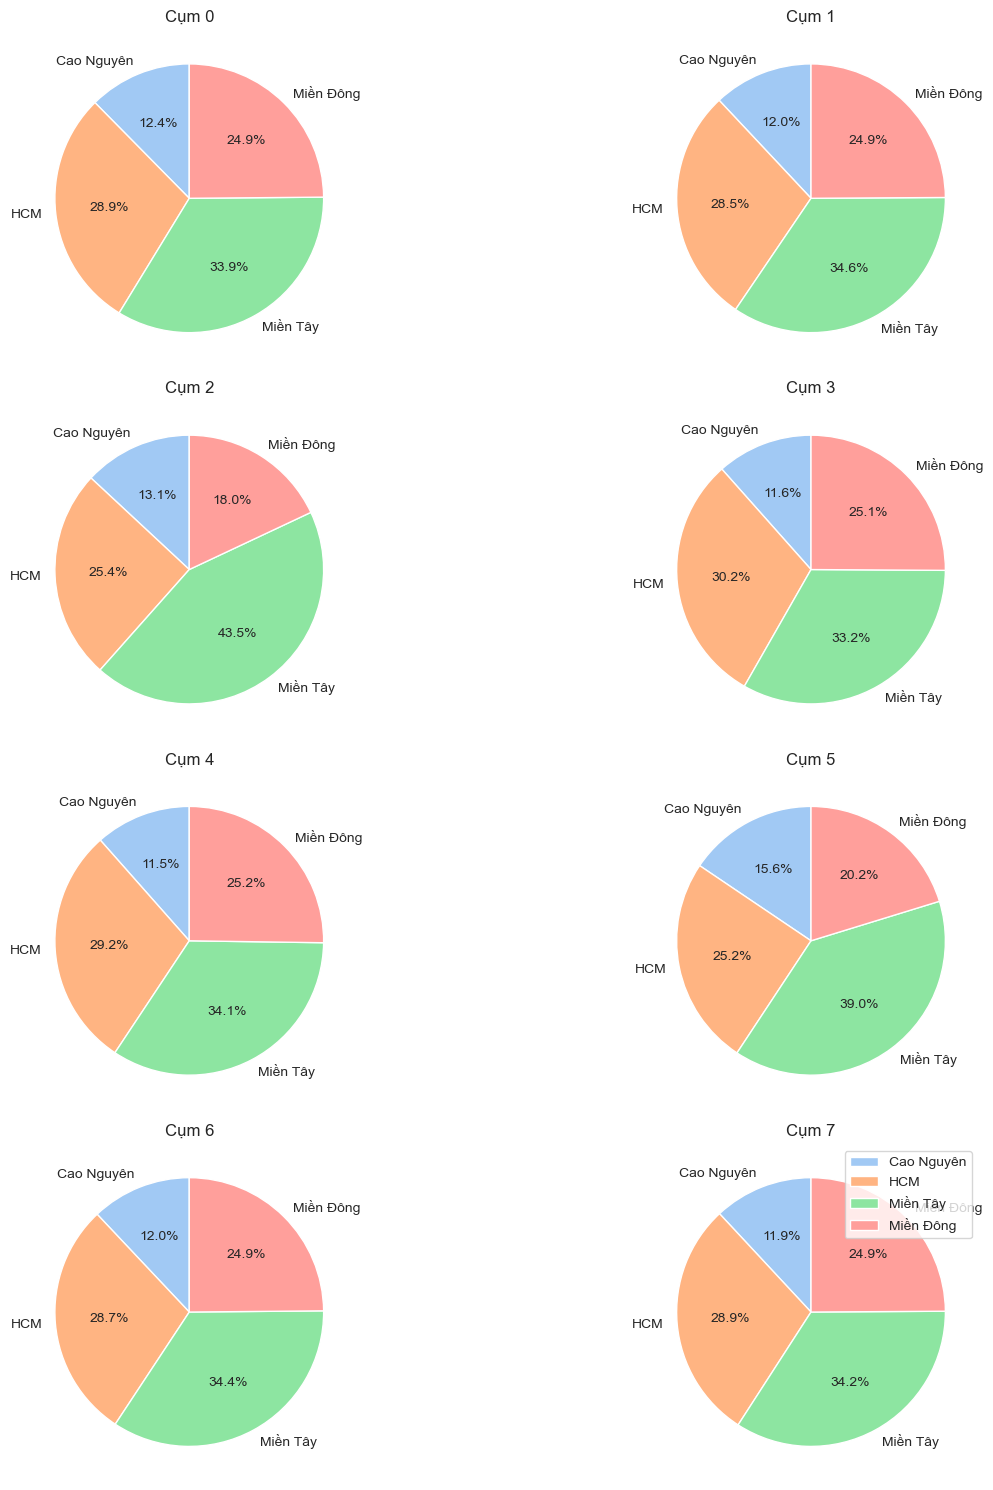

In [169]:
plt.figure(figsize=(30, 30))
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_mien_cum_ke[df_mien_cum_ke['Phân cụm'] == f'Cụm {i}']
    ax.pie(df_cum_nho[0], labels=df_cum_nho['Miền'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cụm {i}')

plt.tight_layout()
plt.legend()
plt.show();

- Các cụm đều có điểm chung về tỷ lệ mẫu theo từng miền: Miền Tây và Thành phố Hồ Chí Minh đang có tỷ lệ mẫu cao nhất

## Phân tích tỷ lệ tăng trưởng theo cụm trên kệ:

In [98]:
df_tyletangtruong_ke_cum = df_phancum_trenke[['Phân cụm', 'Tỷ lệ tăng trưởng']]
df_tyletangtruong_ke_cum

Phân cụm  Tỷ lệ tăng trưởng
3605      Cụm 1          10.000000
3658      Cụm 1          10.000000
3791      Cụm 1           2.500000
3901      Cụm 1          76.000000
3902      Cụm 1           2.000000
...         ...                ...
230756    Cụm 0           0.442478
230757    Cụm 0           0.619469
230758    Cụm 0           0.000000
230759    Cụm 0           0.619469
230760    Cụm 0           0.000000

[384528 rows x 2 columns]

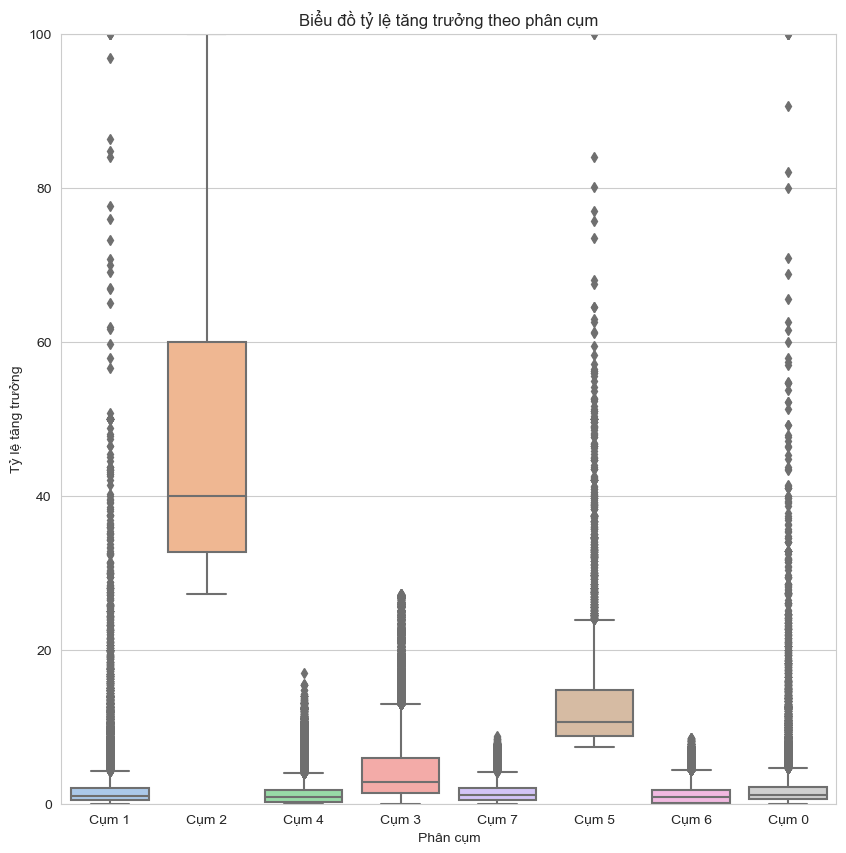

In [106]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(df_tyletangtruong_ke_cum, x = 'Phân cụm', y = 'Tỷ lệ tăng trưởng')
ax.set_ylim(0, 100)
plt.title('Biểu đồ tỷ lệ tăng trưởng theo phân cụm')
plt.show();

- Cụm hiệu quả: Cụm 2, Cụm 3, Cụm 5
- Cụm không hiệu quả: Cụm 0, Cụm 1, Cụm 4, Cụm 6, Cụm 7

## Phân tích tỷ lệ CTKM của các cụm:

In [120]:
df_ctkm_ke_cum = df_phancum_trenke.groupby(['Phân cụm','CTKM']).size().reset_index()
df_ctkm_ke_cum = df_ctkm_ke_cum.sort_values(by = 'CTKM', ascending= False)
df_ctkm_ke_cum

Phân cụm                                         CTKM      0
6     Cụm 2                                 Mua 2 tặng 1    445
11    Cụm 3                                 Mua 2 tặng 1  14377
16    Cụm 4                                 Mua 2 tặng 1   5349
21    Cụm 6             HĐ P/S 89,000đ được giảm 15,000đ  60545
5     Cụm 2             HĐ P/S 89,000đ được giảm 15,000đ     15
19    Cụm 5             HĐ P/S 89,000đ được giảm 15,000đ    247
10    Cụm 3             HĐ P/S 89,000đ được giảm 15,000đ   1863
15    Cụm 4             HĐ P/S 89,000đ được giảm 15,000đ  16256
23    Cụm 7           HĐ 99,000đ Colgate được tặng 1 KĐR  18766
18    Cụm 5           HĐ 99,000đ Colgate được tặng 1 KĐR    280
14    Cụm 4                                     Giảm giá  62652
22    Cụm 7                                     Giảm giá  57841
20    Cụm 6                                     Giảm giá  29104
17    Cụm 5                                     Giảm giá   4604
0     Cụm 0                                     Giảm giá  17842
1     Cụm 1                                     Giảm giá  38882
9     Cụm 3                                     Giảm giá  29505
4     Cụm 2                                     Giảm giá   2072
13    Cụm 4          Bán kèm - SP cùng loại giảm giá 50%   4936
8     Cụm 3          Bán kèm - SP cùng loại giảm giá 50%     60
3     Cụm 2          Bán kèm - SP cùng loại giảm giá 50%     16
7     Cụm 3  99K Colgate tặng 15k mua thịt, cá, trái cây      3
2     Cụm 2  99K Colgate tặng 15k mua thịt, cá, trái cây      1
12    Cụm 4  99K Colgate tặng 15k mua thịt, cá, trái cây  18867

<Figure size 1000x1000 with 0 Axes>

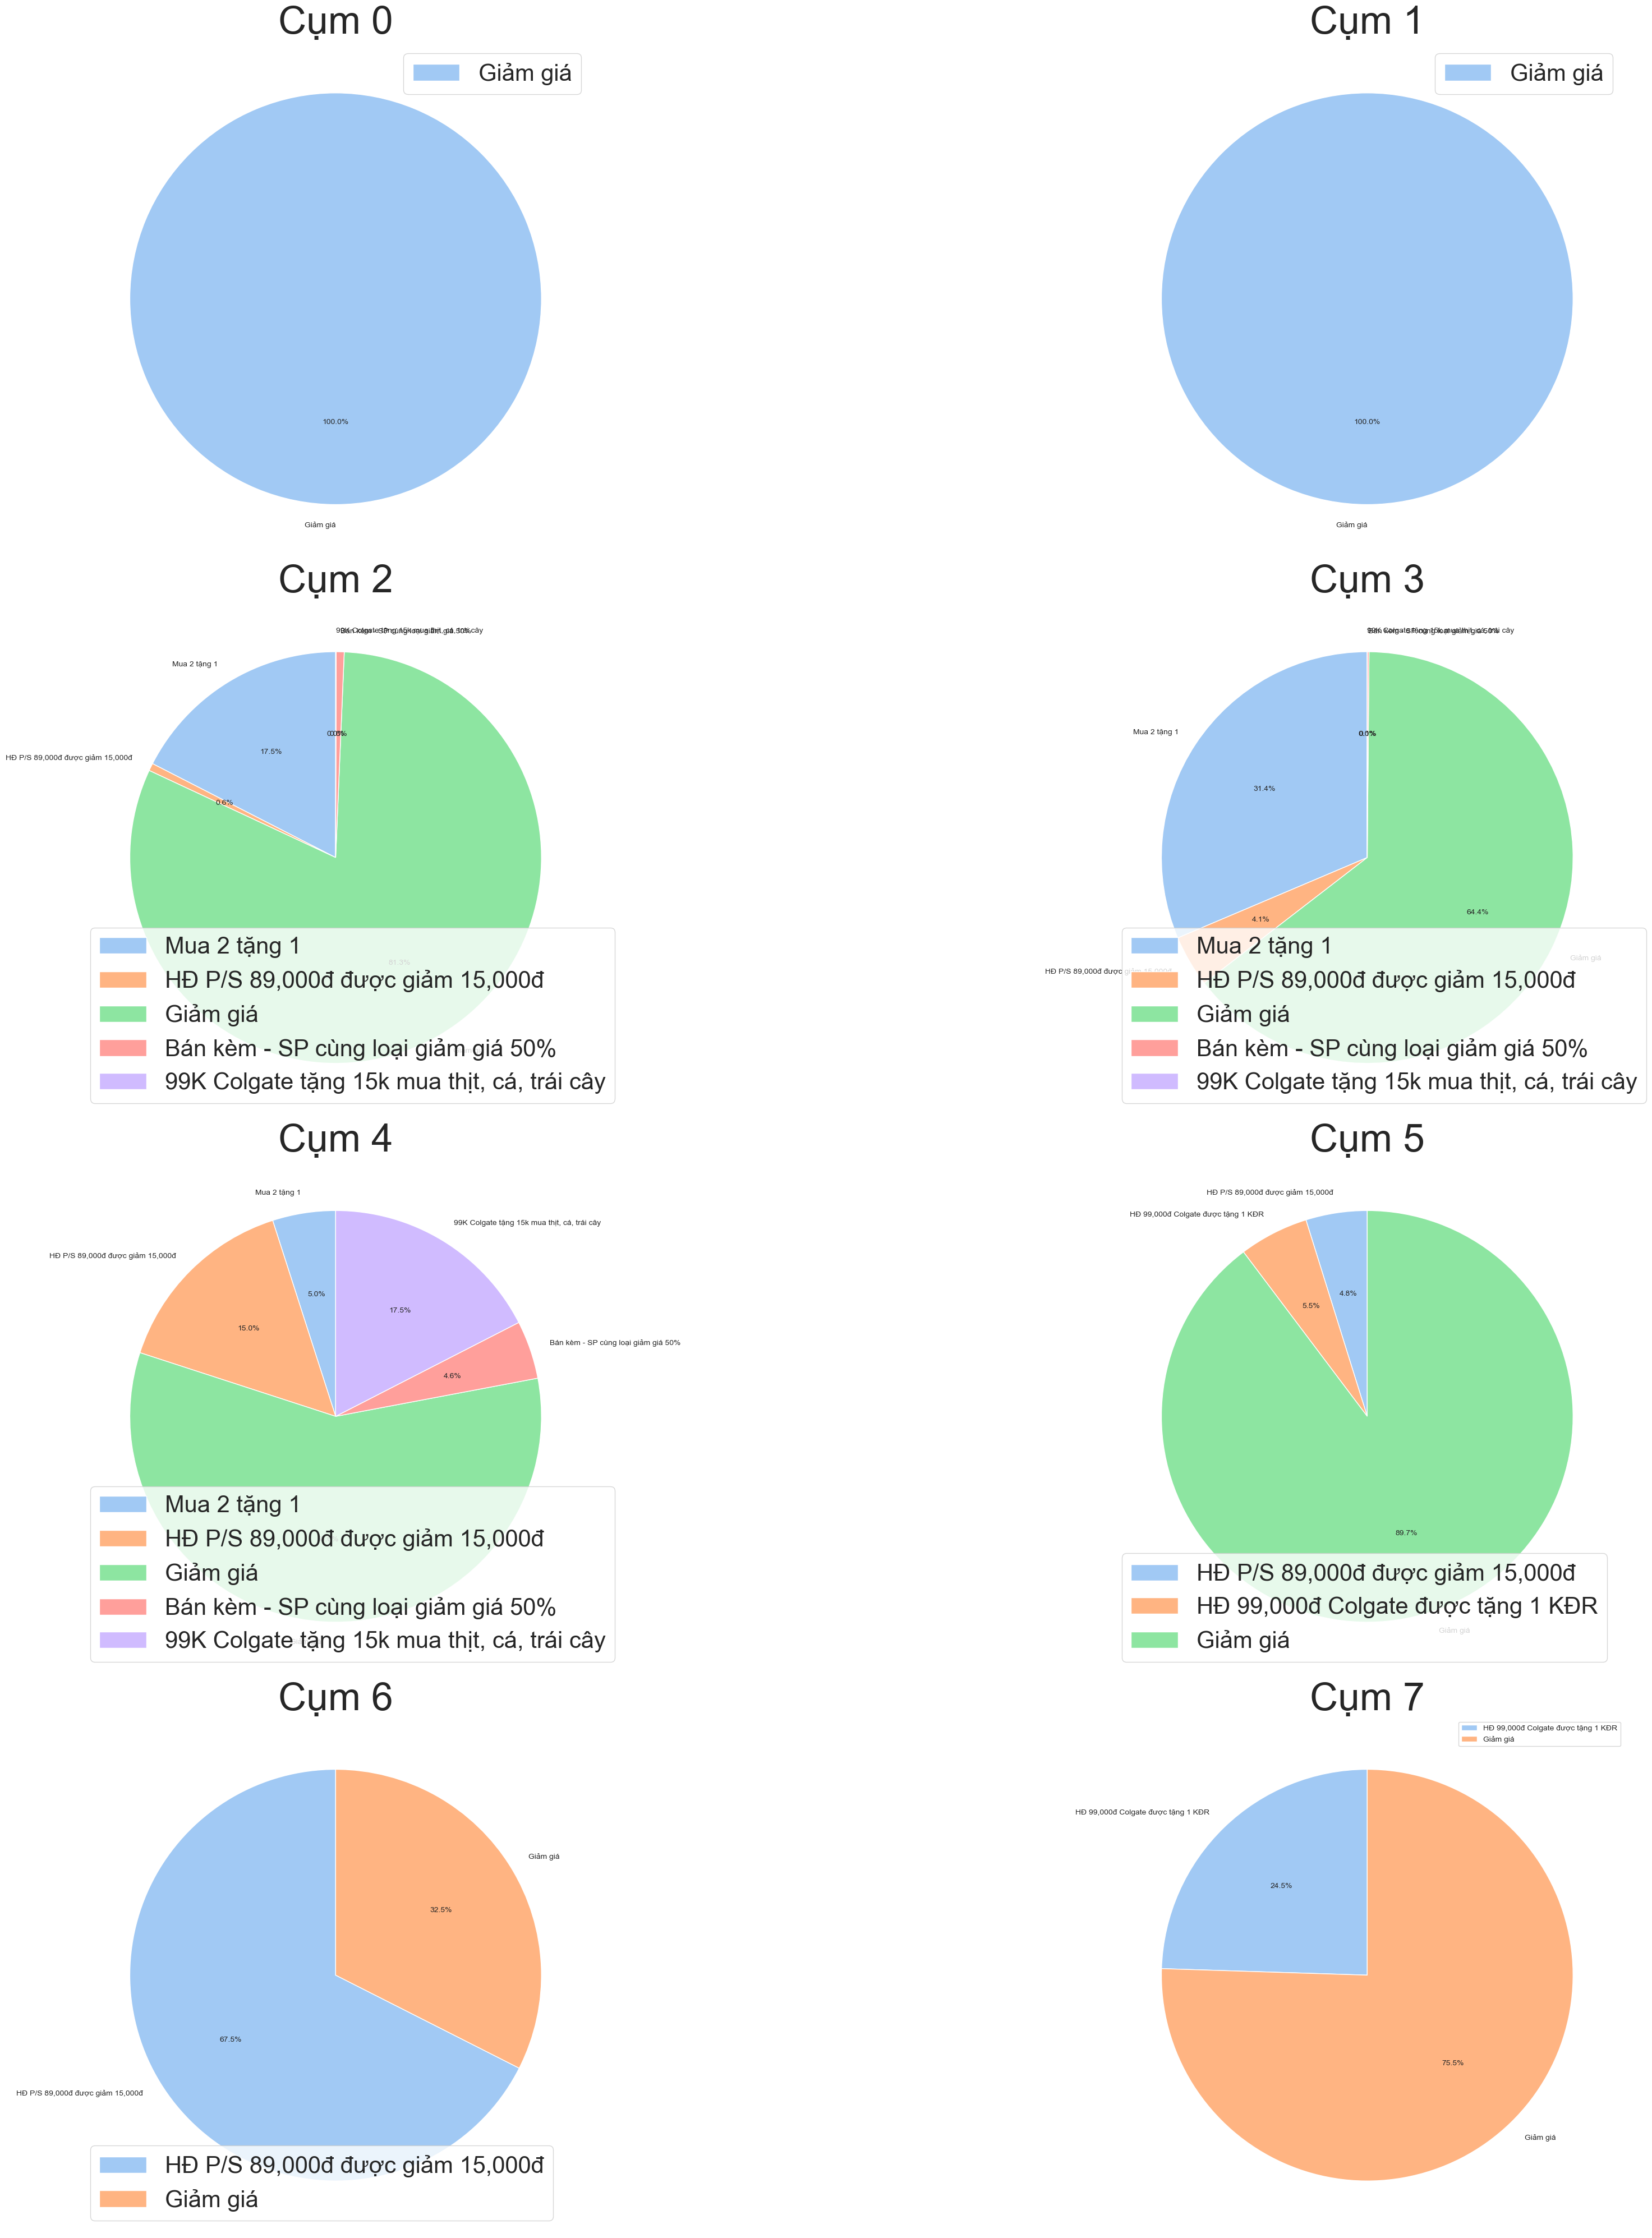

In [331]:
plt.figure(figsize=(10, 10))
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(40, 40))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_ctkm_ke_cum[df_ctkm_ke_cum['Phân cụm'] == f'Cụm {i}']
    ax.pie(df_cum_nho[0], labels=df_cum_nho['CTKM'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cụm {i}', fontsize = 50)
    ax.legend(fontsize=30)
plt.tight_layout()
plt.legend()
plt.show();

## Phân tích thời gian khuyến mãi từng cụm:

In [133]:
df_tgkm_ke_cum = df_phancum_trenke[['Phân cụm','Thời gian khuyến mãi']]
df_tgkm_ke_cum

Phân cụm  Thời gian khuyến mãi
3605      Cụm 1                    76
3658      Cụm 1                    76
3791      Cụm 1                    76
3901      Cụm 1                    76
3902      Cụm 1                    76
...         ...                   ...
230756    Cụm 0                   113
230757    Cụm 0                   113
230758    Cụm 0                   113
230759    Cụm 0                   113
230760    Cụm 0                   113

[384528 rows x 2 columns]

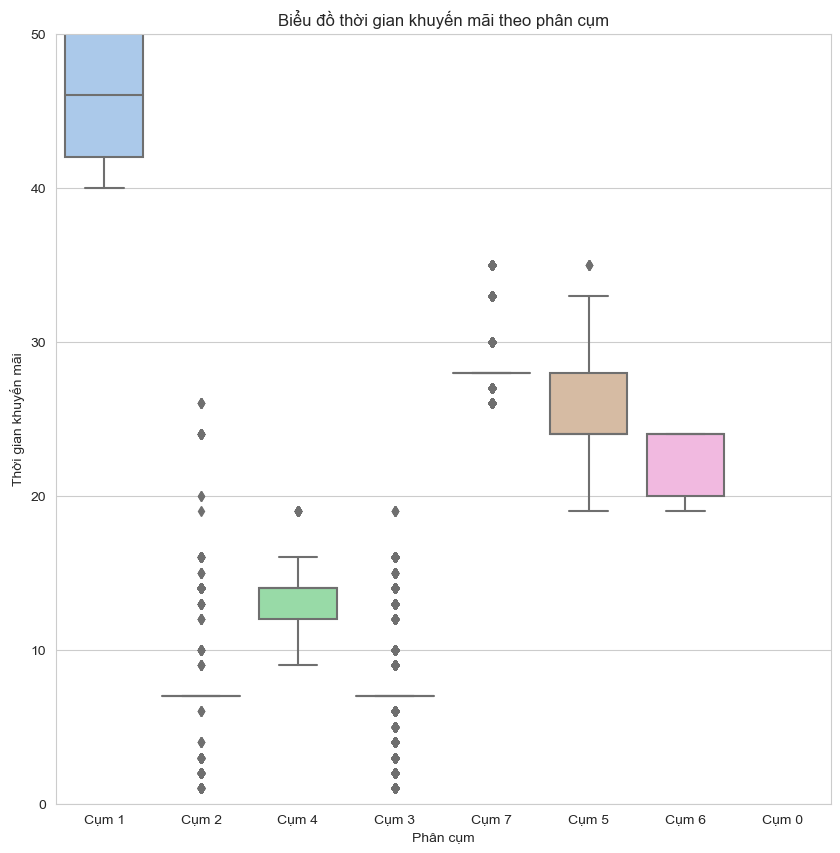

In [140]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(df_tgkm_ke_cum, x = 'Phân cụm', y = 'Thời gian khuyến mãi')
ax.set_ylim(0, 50)
plt.title('Biểu đồ thời gian khuyến mãi theo phân cụm')
plt.show();

## Phân tích phân khúc giá trên kệ:

In [143]:
df_gia_cum_ke = df_phancum_trenke.groupby(['Phân cụm','Phân khúc giá']).size().reset_index()
df_gia_cum_ke 

Phân cụm Phân khúc giá      0
0     Cụm 0           Cao   6961
1     Cụm 0            Rẻ   6297
2     Cụm 0         Trung   4584
3     Cụm 1           Cao  11558
4     Cụm 1            Rẻ   3990
5     Cụm 1         Trung  23334
6     Cụm 2           Cao    238
7     Cụm 2            Rẻ    829
8     Cụm 2         Trung   1482
9     Cụm 3           Cao   9043
10    Cụm 3            Rẻ   3170
11    Cụm 3         Trung  33595
12    Cụm 4           Cao  16050
13    Cụm 4            Rẻ   4270
14    Cụm 4         Trung  87740
15    Cụm 5           Cao    852
16    Cụm 5            Rẻ     73
17    Cụm 5         Trung   4206
18    Cụm 6           Cao  10965
19    Cụm 6            Rẻ  13875
20    Cụm 6         Trung  64809
21    Cụm 7           Cao  19335
22    Cụm 7         Trung  57272

<Figure size 3000x3000 with 0 Axes>

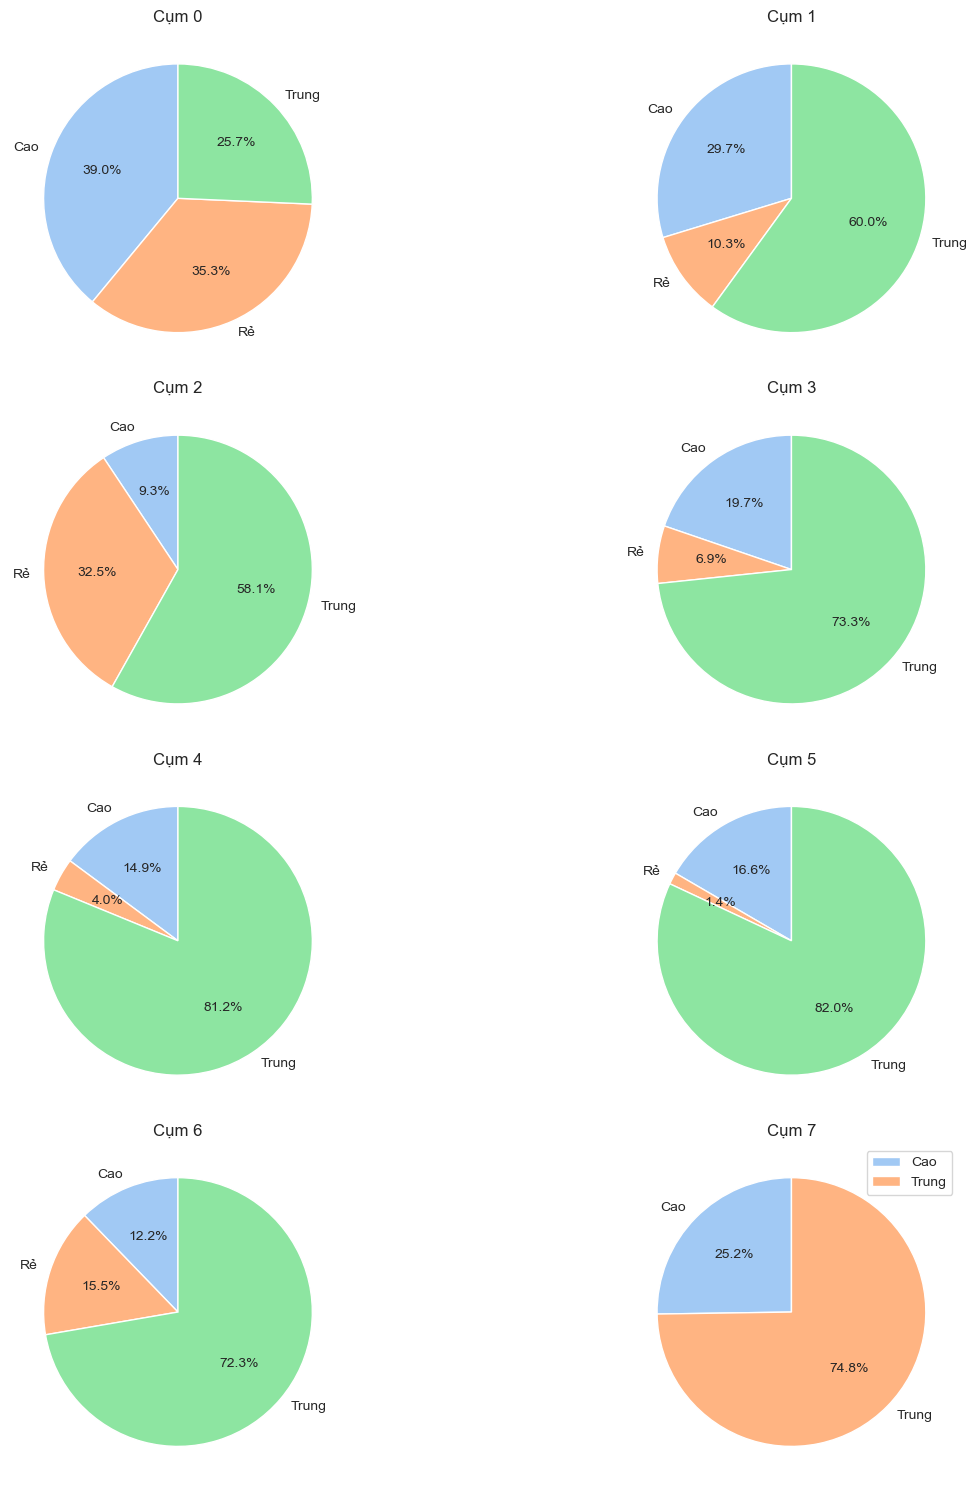

In [158]:
plt.figure(figsize=(30, 30))
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_gia_cum_ke [df_gia_cum_ke ['Phân cụm'] == f'Cụm {i}']
    ax.pie(df_cum_nho[0], labels=df_cum_nho['Phân khúc giá'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cụm {i}')

plt.tight_layout()
plt.legend()
plt.show();

## Phân tích sự nổi tiếng của thương hiệu từng cụm:

In [146]:
df_fame_cum_ke = df_phancum_trenke.groupby(['Phân cụm','Là thương hiệu nổi tiếng hay không']).size().reset_index()
df_fame_cum_ke 

Phân cụm Là thương hiệu nổi tiếng hay không       0
0     Cụm 0                                 No   16140
1     Cụm 0                                Yes    1702
2     Cụm 1                                 No    4667
3     Cụm 1                                Yes   34215
4     Cụm 2                                 No    1114
5     Cụm 2                                Yes    1435
6     Cụm 3                                 No    4452
7     Cụm 3                                Yes   41356
8     Cụm 4                                 No    1883
9     Cụm 4                                Yes  106177
10    Cụm 5                                 No      40
11    Cụm 5                                Yes    5091
12    Cụm 6                                 No    3583
13    Cụm 6                                Yes   86066
14    Cụm 7                                 No    2610
15    Cụm 7                                Yes   73997

<Figure size 500x500 with 0 Axes>

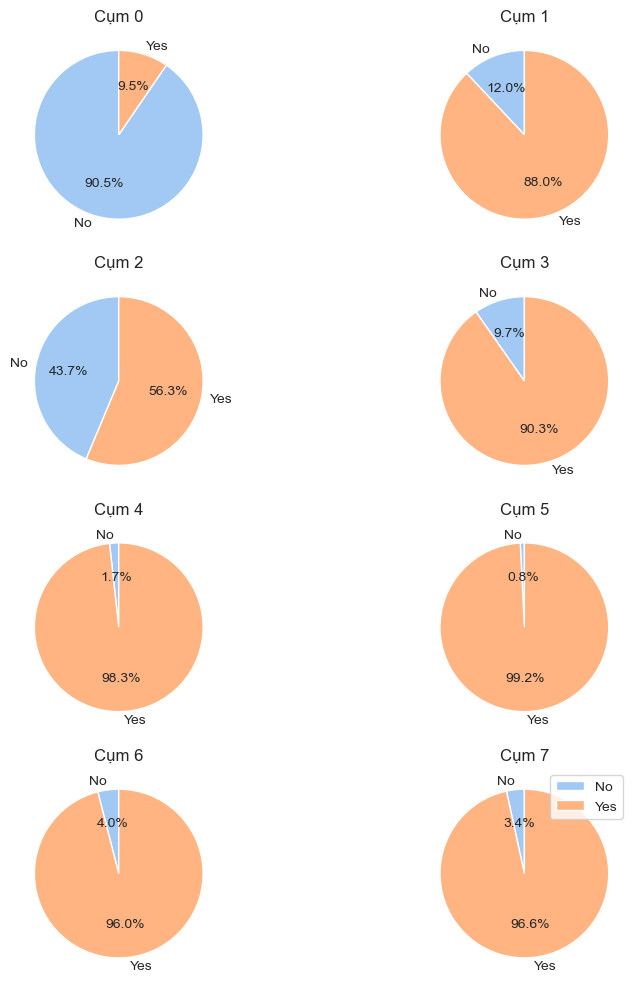

In [156]:
plt.figure(figsize=(5, 5))
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_fame_cum_ke[df_fame_cum_ke['Phân cụm'] == f'Cụm {i}']
    ax.pie(df_cum_nho[0], labels=df_cum_nho['Là thương hiệu nổi tiếng hay không'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cụm {i}')
    
plt.tight_layout()
plt.legend()
plt.show();

## Phân tích size theo từng cụm trên kệ:

In [151]:
df_size_cum_ke = df_phancum_trenke.groupby(['Phân cụm','Size']).size().reset_index()
df_size_cum_ke 

Phân cụm             Size      0
0     Cụm 0      Lớn (>200g)   4797
1     Cụm 0     Nhỏ (<=100g)   5259
2     Cụm 0  Vừa (100g-200g)   7786
3     Cụm 1      Lớn (>200g)  16615
4     Cụm 1     Nhỏ (<=100g)   1058
5     Cụm 1  Vừa (100g-200g)  21209
6     Cụm 2      Lớn (>200g)   1703
7     Cụm 2     Nhỏ (<=100g)     20
8     Cụm 2  Vừa (100g-200g)    826
9     Cụm 3      Lớn (>200g)  27984
10    Cụm 3     Nhỏ (<=100g)   5088
11    Cụm 3  Vừa (100g-200g)  12736
12    Cụm 4      Lớn (>200g)  69407
13    Cụm 4     Nhỏ (<=100g)  11005
14    Cụm 4  Vừa (100g-200g)  27648
15    Cụm 5      Lớn (>200g)   3967
16    Cụm 5     Nhỏ (<=100g)    136
17    Cụm 5  Vừa (100g-200g)   1028
18    Cụm 6      Lớn (>200g)  44129
19    Cụm 6     Nhỏ (<=100g)  18580
20    Cụm 6  Vừa (100g-200g)  26940
21    Cụm 7      Lớn (>200g)  44328
22    Cụm 7     Nhỏ (<=100g)   7578
23    Cụm 7  Vừa (100g-200g)  24701

<Figure size 500x500 with 0 Axes>

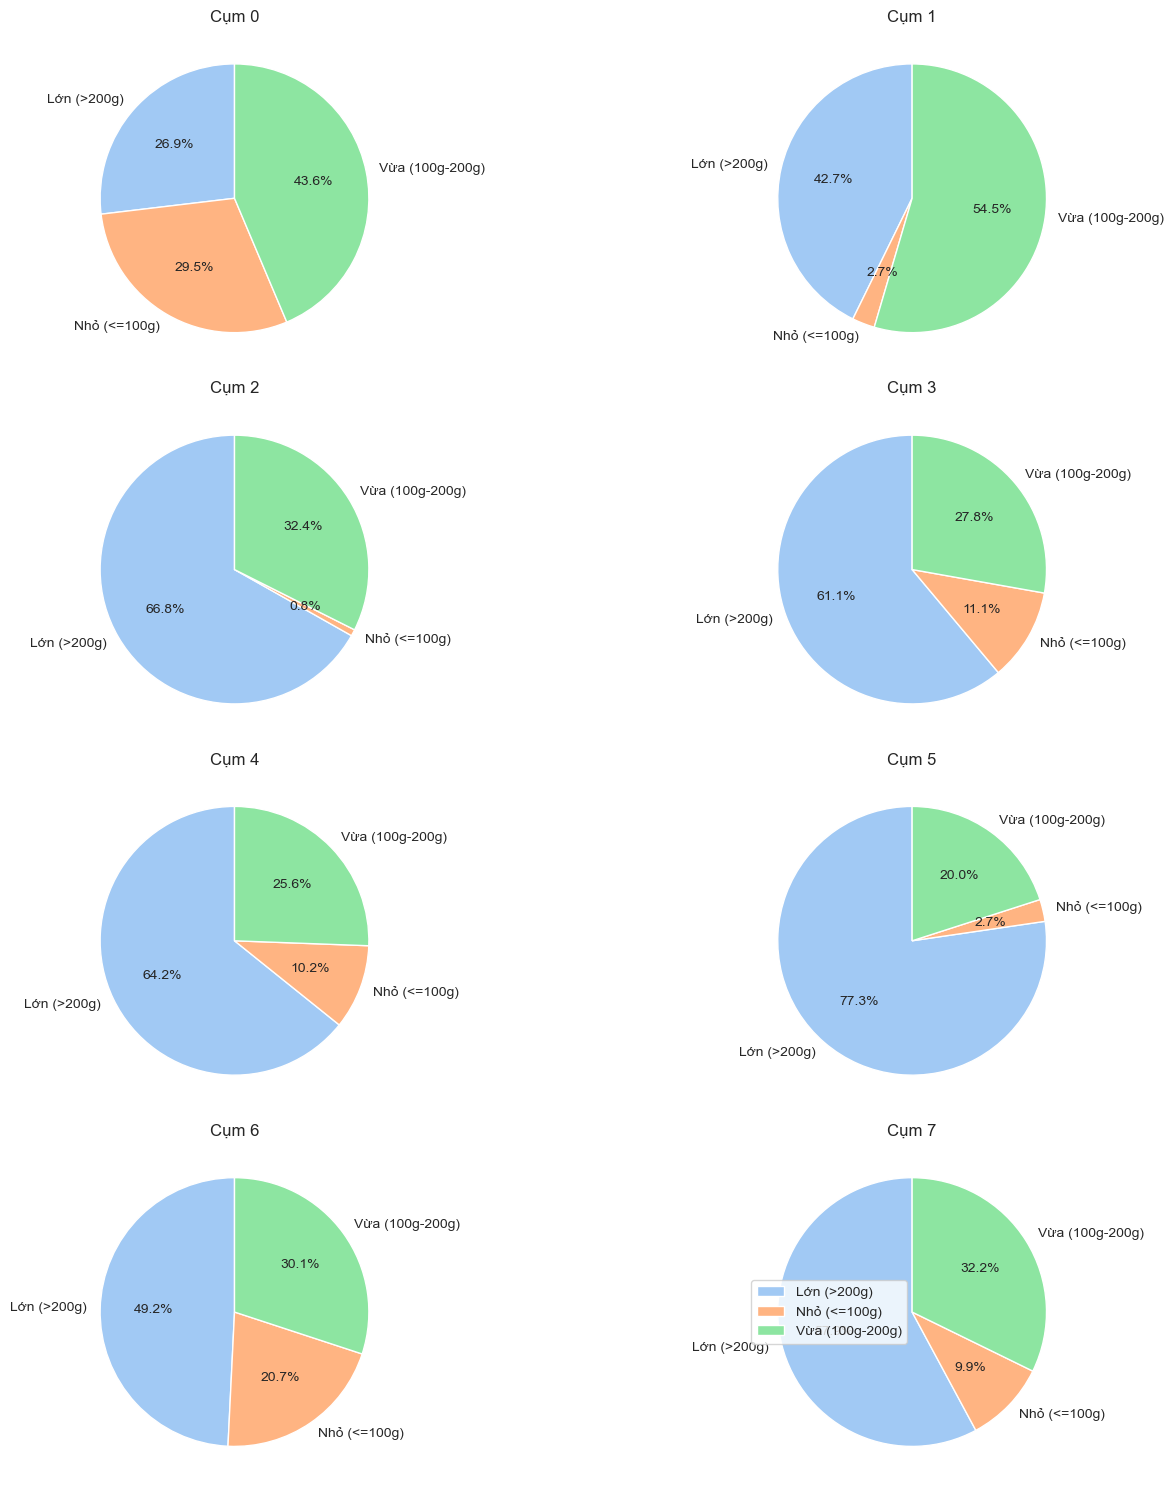

In [155]:
plt.figure(figsize=(5, 5))
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_size_cum_ke[df_size_cum_ke['Phân cụm'] == f'Cụm {i}']
    ax.pie(df_cum_nho[0], labels=df_cum_nho['Size'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cụm {i}')
    
plt.tight_layout()
plt.legend()
plt.show();

## Phân tích quy mô siêu thị trên kệ:

In [167]:
df_st_cum_ke = df_phancum_trenke.groupby(['Phân cụm','Loại ST']).size().reset_index()
df_st_cum_ke 

Phân cụm              Loại ST      0
0     Cụm 0     1,2 tỷ  - < 2 tỷ   7373
1     Cụm 0        2 tỷ - < 5 tỷ   2326
2     Cụm 0  900 triệu - <1,2 tỷ   4701
3     Cụm 0           <900 triệu   3442
4     Cụm 1     1,2 tỷ  - < 2 tỷ  15716
5     Cụm 1        2 tỷ - < 5 tỷ   4751
6     Cụm 1  900 triệu - <1,2 tỷ  10557
7     Cụm 1           <900 triệu   7858
8     Cụm 2     1,2 tỷ  - < 2 tỷ    967
9     Cụm 2        2 tỷ - < 5 tỷ    288
10    Cụm 2  900 triệu - <1,2 tỷ    709
11    Cụm 2           <900 triệu    585
12    Cụm 3     1,2 tỷ  - < 2 tỷ  19094
13    Cụm 3        2 tỷ - < 5 tỷ   6217
14    Cụm 3  900 triệu - <1,2 tỷ  12131
15    Cụm 3           <900 triệu   8366
16    Cụm 4     1,2 tỷ  - < 2 tỷ  44771
17    Cụm 4        2 tỷ - < 5 tỷ  14224
18    Cụm 4  900 triệu - <1,2 tỷ  28644
19    Cụm 4           <900 triệu  20421
20    Cụm 5     1,2 tỷ  - < 2 tỷ   2145
21    Cụm 5        2 tỷ - < 5 tỷ    580
22    Cụm 5  900 triệu - <1,2 tỷ   1344
23    Cụm 5           <900 triệu   1062
24    Cụm 6     1,2 tỷ  - < 2 tỷ  36418
25    Cụm 6        2 tỷ - < 5 tỷ  11154
26    Cụm 6  900 triệu - <1,2 tỷ  24021
27    Cụm 6           <900 triệu  18056
28    Cụm 7     1,2 tỷ  - < 2 tỷ  31507
29    Cụm 7        2 tỷ - < 5 tỷ   9936
30    Cụm 7  900 triệu - <1,2 tỷ  20273
31    Cụm 7           <900 triệu  14891

<Figure size 500x500 with 0 Axes>

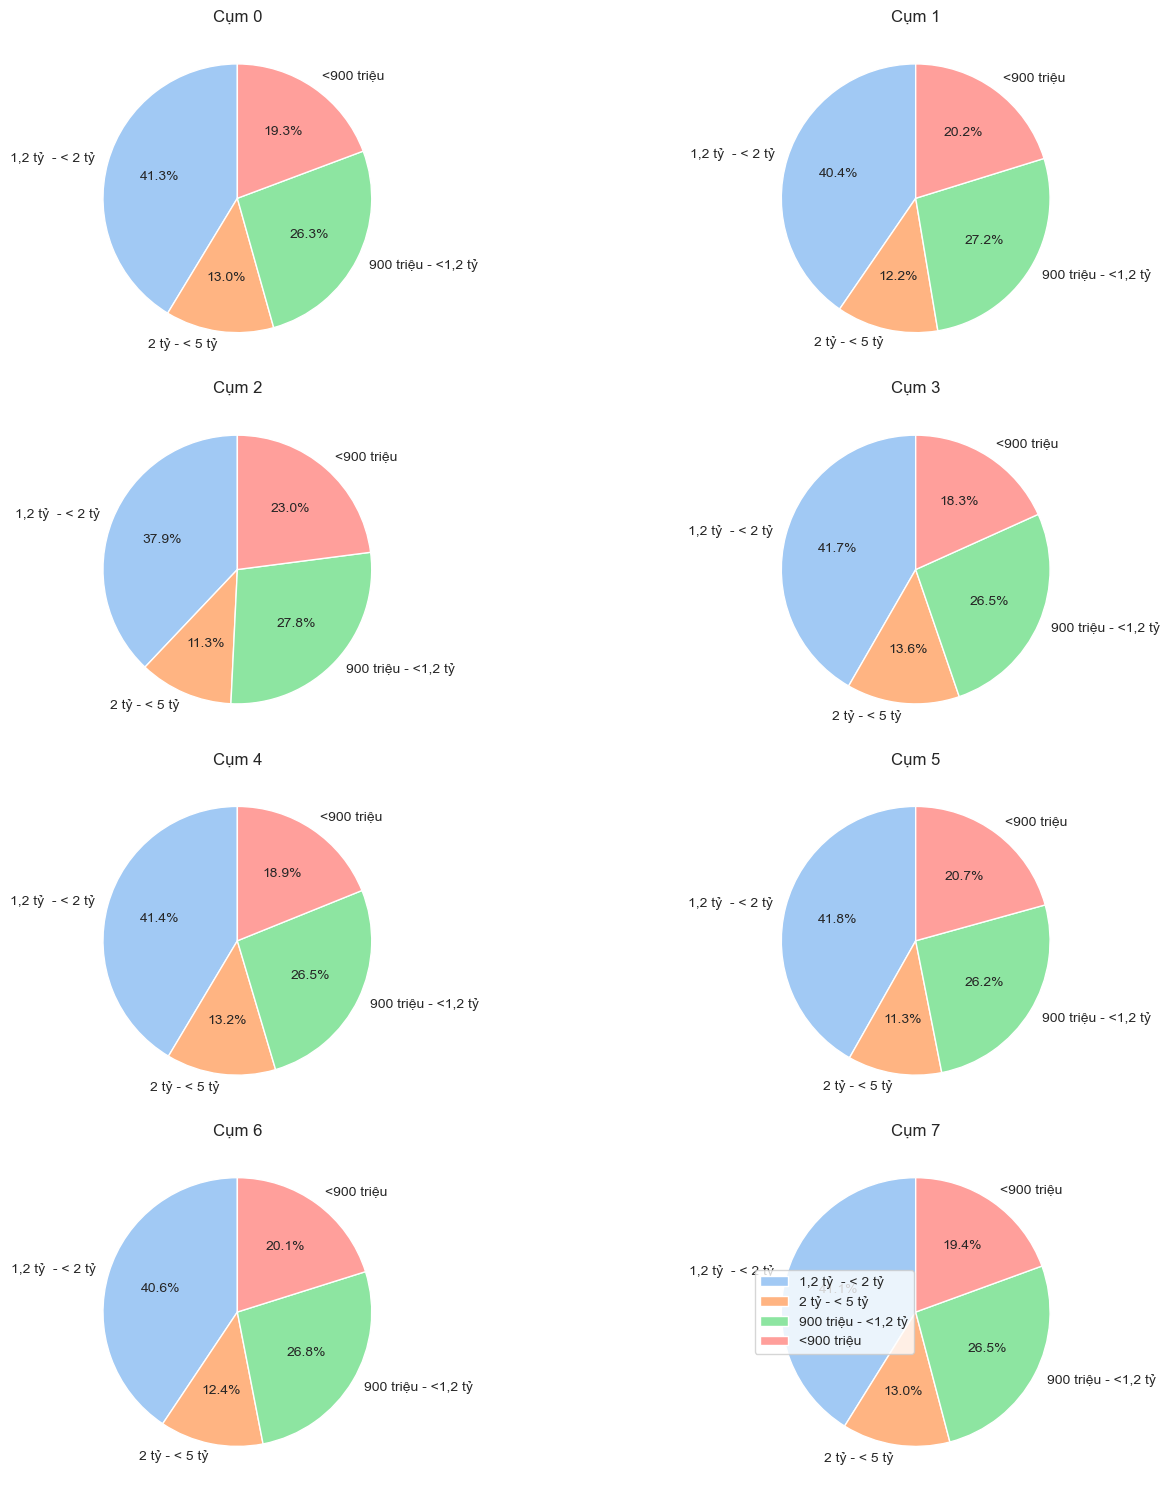

In [170]:
plt.figure(figsize=(5, 5))
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_st_cum_ke[df_st_cum_ke['Phân cụm'] == f'Cụm {i}']
    ax.pie(df_cum_nho[0], labels=df_cum_nho['Loại ST'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cụm {i}')
    
plt.tight_layout()
plt.legend()
plt.show();

## Phân tích công dụng sản phẩm:

In [171]:
df_cd_cum_ke = df_phancum_trenke.groupby(['Phân cụm','Công dụng sản phẩm']).size().reset_index()
df_cd_cum_ke

Phân cụm       Công dụng sản phẩm      0
0     Cụm 0                 Ngừa sâu  11307
1     Cụm 0     Trắng răng, thơm mát   6535
2     Cụm 1  Giảm ê buốt, trắng răng   1058
3     Cụm 1                 Ngừa sâu   8757
4     Cụm 1    Thanh nhiệt và bảo vệ   1239
5     Cụm 1                 Thơm mát  14655
6     Cụm 1               Trắng răng   7496
7     Cụm 1     Trắng răng, ngừa sâu   3367
8     Cụm 1     Trắng răng, thơm mát   2310
9     Cụm 2                 Ngừa sâu    707
10    Cụm 2    Thanh nhiệt và bảo vệ     13
11    Cụm 2                 Thơm mát    914
12    Cụm 2               Trắng răng    188
13    Cụm 2     Trắng răng, ngừa sâu    199
14    Cụm 2     Trắng răng, thơm mát    528
15    Cụm 3  Giảm ê buốt, trắng răng     98
16    Cụm 3              Giản ê buốt      1
17    Cụm 3                 Ngừa sâu  10553
18    Cụm 3    Thanh nhiệt và bảo vệ    942
19    Cụm 3                 Thơm mát  24594
20    Cụm 3               Trắng răng   5536
21    Cụm 3     Trắng răng, ngừa sâu   1977
22    Cụm 3     Trắng răng, thơm mát   2107
23    Cụm 4              Giảm ê buốt     68
24    Cụm 4  Giảm ê buốt, trắng răng   1507
25    Cụm 4              Giản ê buốt    302
26    Cụm 4                 Ngừa sâu  21017
27    Cụm 4    Thanh nhiệt và bảo vệ   1324
28    Cụm 4                 Thơm mát  62319
29    Cụm 4               Trắng răng  16495
30    Cụm 4     Trắng răng, ngừa sâu   4641
31    Cụm 4     Trắng răng, thơm mát    387
32    Cụm 5  Giảm ê buốt, trắng răng     54
33    Cụm 5              Giản ê buốt      7
34    Cụm 5                 Ngừa sâu    794
35    Cụm 5    Thanh nhiệt và bảo vệ      6
36    Cụm 5                 Thơm mát   3092
37    Cụm 5               Trắng răng    973
38    Cụm 5     Trắng răng, ngừa sâu    200
39    Cụm 5     Trắng răng, thơm mát      5
40    Cụm 6  Giảm ê buốt, trắng răng   2701
41    Cụm 6              Giản ê buốt    189
42    Cụm 6                 Ngừa sâu  37310
43    Cụm 6                 Thơm mát  29297
44    Cụm 6               Trắng răng  18301
45    Cụm 6     Trắng răng, ngừa sâu   1434
46    Cụm 6     Trắng răng, thơm mát    417
47    Cụm 7              Giảm ê buốt     81
48    Cụm 7  Giảm ê buốt, trắng răng   1074
49    Cụm 7              Giản ê buốt    408
50    Cụm 7                 Ngừa sâu  15814
51    Cụm 7    Thanh nhiệt và bảo vệ   1325
52    Cụm 7                 Thơm mát  38232
53    Cụm 7               Trắng răng  17996
54    Cụm 7     Trắng răng, ngừa sâu   1677

<Figure size 500x500 with 0 Axes>

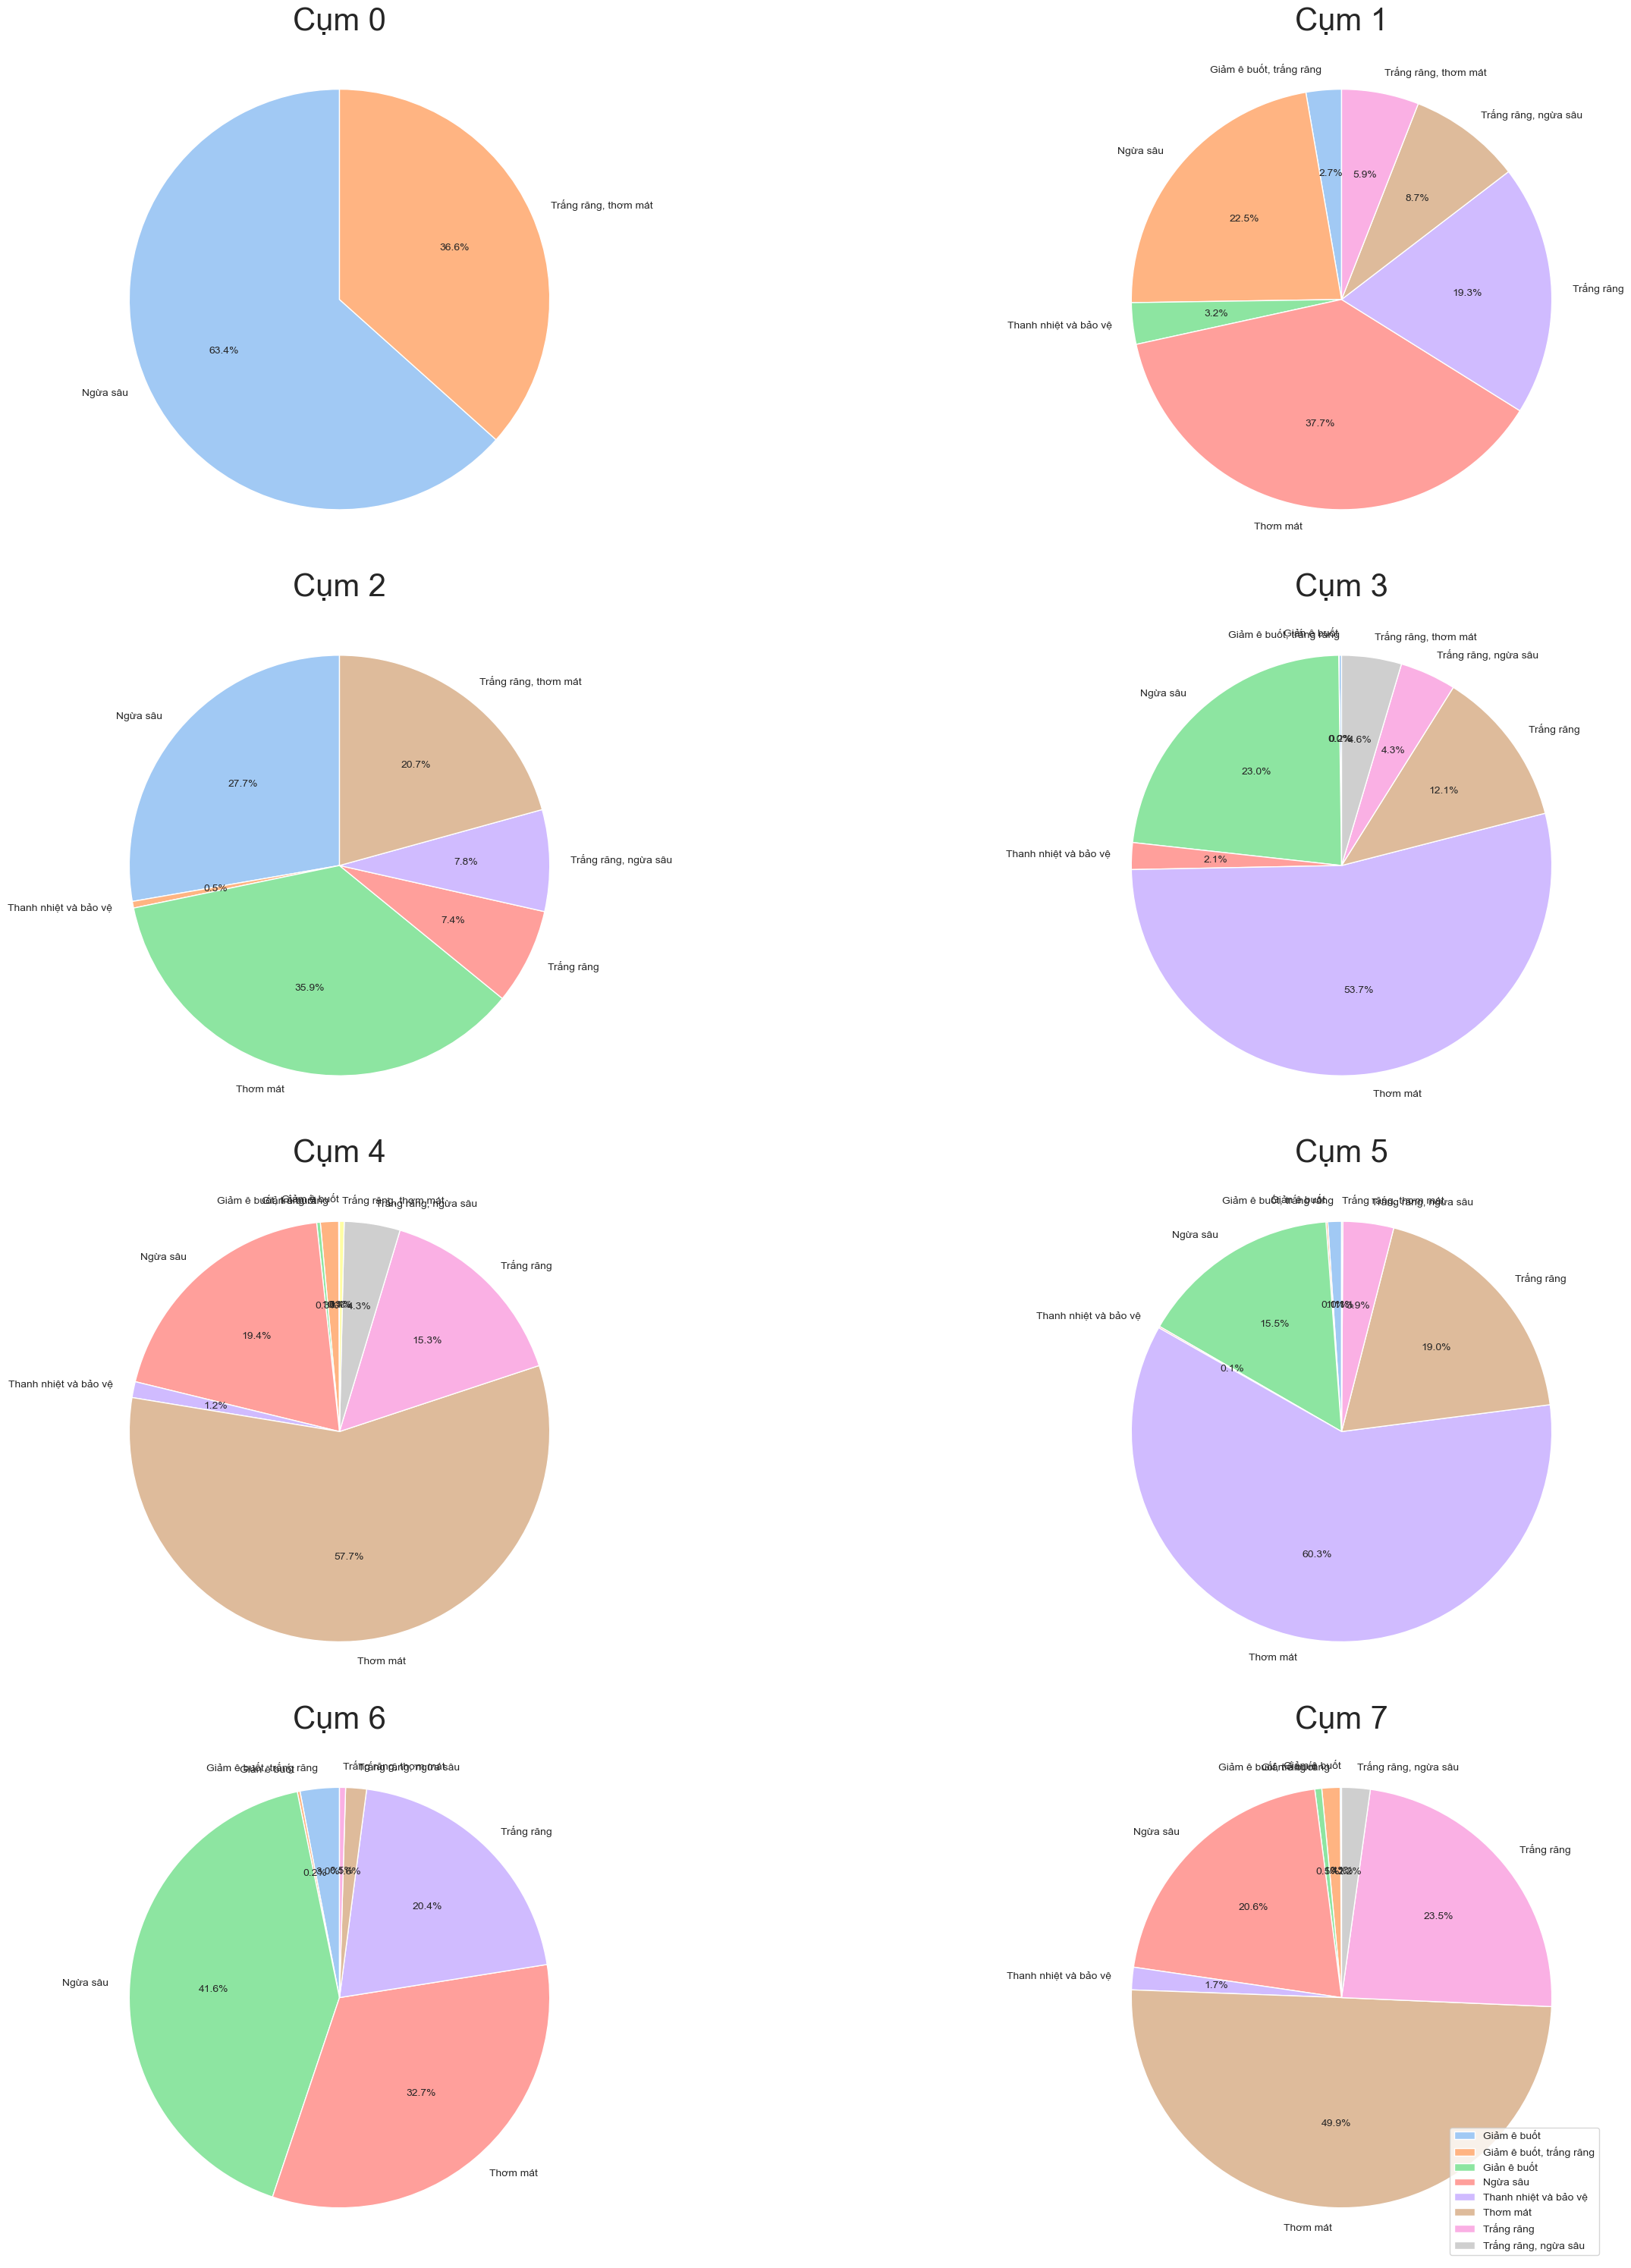

In [176]:
plt.figure(figsize=(5, 5))
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(30, 30))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_cd_cum_ke[df_cd_cum_ke['Phân cụm'] == f'Cụm {i}']
    ax.pie(df_cum_nho[0], labels=df_cum_nho['Công dụng sản phẩm'], labeldistance=1.1, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cụm {i}', fontsize = 30)
    
plt.tight_layout()
plt.legend()
plt.show();

# Ụ Tháp KM

In [36]:
df_uthap = master_df[master_df['Trưng bày'] == 'Tháp KM']
df_uthap

Year  Mã CTKM                                           Tên CTKM  \
7751    2022   548600  CTKM KHÔNG PHÉP (30/06-26/07) Mua 2 tặng 1 cùn...   
7965    2022   548600  CTKM KHÔNG PHÉP (30/06-26/07) Mua 2 tặng 1 cùn...   
7966    2022   548600  CTKM KHÔNG PHÉP (30/06-26/07) Mua 2 tặng 1 cùn...   
7967    2022   548600  CTKM KHÔNG PHÉP (30/06-26/07) Mua 2 tặng 1 cùn...   
8197    2022   548602  CTKM KHÔNG PHÉP (30/06-26/07) Mua 2 tặng 1 cùn...   
...      ...      ...                                                ...   
435182  2023   731686                CTKM THÁNG 3 (03/03-28/03)  - 15955   
435183  2023   731686                CTKM THÁNG 3 (03/03-28/03)  - 15955   
435184  2023   731686                CTKM THÁNG 3 (03/03-28/03)  - 15955   
435185  2023   731686                CTKM THÁNG 3 (03/03-28/03)  - 15955   
435186  2023   731686                CTKM THÁNG 3 (03/03-28/03)  - 15955   

                CTKM Ngày bắt đầu Ngày kết thúc  Thời gian khuyến mãi  \
7751    Mua 2 tặng 1   2022-06-30    2022-07-26                    27   
7965    Mua 2 tặng 1   2022-06-30    2022-07-26                    27   
7966    Mua 2 tặng 1   2022-06-30    2022-07-26                    27   
7967    Mua 2 tặng 1   2022-06-30    2022-07-26                    27   
8197    Mua 2 tặng 1   2022-06-30    2022-07-26                    27   
...              ...          ...           ...                   ...   
435182      Giảm giá   2023-03-03    2023-03-28                    26   
435183      Giảm giá   2023-03-03    2023-03-28                    26   
435184      Giảm giá   2023-03-03    2023-03-28                    26   
435185      Giảm giá   2023-03-03    2023-03-28                    26   
435186      Giảm giá   2023-03-03    2023-03-28                    26   

        Tỷ lệ khuyến mãi       Model    Mã SP chính  ...    Brand   DVT  \
7751            0.333400  1811000020  9252712000077  ...  COLGATE  Tuýp   
7965            0.333400  1811000020  9252712000077  ...  COLGATE  Tuýp   
7966            0.333400  1811000020  9252712000077  ...  COLGATE  Tuýp   
7967            0.333400  1811000020  9252712000077  ...  COLGATE  Tuýp   
8197            0.333400  2009000437  9252712000214  ...  COLGATE  Tuýp   
...                  ...         ...            ...  ...      ...   ...   
435182          0.333333  1811000814  9252712000084  ...      P/S  Tuýp   
435183          0.333333  1811000814  9252712000084  ...      P/S  Tuýp   
435184          0.333333  1811000814  9252712000084  ...      P/S  Tuýp   
435185          0.333333  1811000814  9252712000084  ...      P/S  Tuýp   
435186          0.333333  1811000814  9252712000084  ...      P/S  Tuýp   

        Là thương hiệu nổi tiếng hay không      TE/NL         Size  \
7751                                   Yes  Người lớn  Lớn (>200g)   
7965                                   Yes  Người lớn  Lớn (>200g)   
7966                                   Yes  Người lớn  Lớn (>200g)   
7967                                   Yes  Người lớn  Lớn (>200g)   
8197                                   Yes  Người lớn  Lớn (>200g)   
...                                    ...        ...          ...   
435182                                 Yes  Người lớn  Lớn (>200g)   
435183                                 Yes  Người lớn  Lớn (>200g)   
435184                                 Yes  Người lớn  Lớn (>200g)   
435185                                 Yes  Người lớn  Lớn (>200g)   
435186                                 Yes  Người lớn  Lớn (>200g)   

       Phân khúc giá Trưng bày Tỷ lệ số ngày tồn = 0 / số ngày KM  \
7751           Trung   Tháp KM                           0.888889   
7965           Trung   Tháp KM                           0.851852   
7966           Trung   Tháp KM                           0.851852   
7967           Trung   Tháp KM                           0.851852   
8197           Trung   Tháp KM                           0.814815   
...              ...       ...                                

In [37]:
df_uthap = df_uthap[['CTKM', 'Thời gian khuyến mãi', 'Tỷ lệ khuyến mãi', 'Miền', 'Thu nhập dân cư quanh shop', 'Phân loại mức độ cạnh tranh FMCG', 'Loại ST', 'Công dụng sản phẩm', 'Là thương hiệu nổi tiếng hay không', 'TE/NL', 'Size', 'Phân khúc giá', 'Trưng bày', 'Sức bán thường', 'Tỷ lệ số ngày tồn = 0 / số ngày KM', 'Tỷ lệ tăng trưởng']]
df_uthap

CTKM  Thời gian khuyến mãi  Tỷ lệ khuyến mãi        Miền  \
7751    Mua 2 tặng 1                    27          0.333400  Cao Nguyên   
7965    Mua 2 tặng 1                    27          0.333400         HCM   
7966    Mua 2 tặng 1                    27          0.333400  Cao Nguyên   
7967    Mua 2 tặng 1                    27          0.333400  Cao Nguyên   
8197    Mua 2 tặng 1                    27          0.333400         HCM   
...              ...                   ...               ...         ...   
435182      Giảm giá                    26          0.333333  Cao Nguyên   
435183      Giảm giá                    26          0.333333         HCM   
435184      Giảm giá                    26          0.333333         HCM   
435185      Giảm giá                    26          0.333333    Miền Tây   
435186      Giảm giá                    26          0.333333    Miền Tây   

                           Thu nhập dân cư quanh shop  \
7751                       Khu dân cư có thu nhập khá   
7965        Khu dân cư có thu nhập thấp - nông nghiệp   
7966        Khu dân cư có thu nhập thấp - nông nghiệp   
7967        Khu dân cư có thu nhập thấp - nông nghiệp   
8197    Khu dân cư có thu nhập thấp - phi nông nghiệp   
...                                               ...   
435182                             Shop không có data   
435183                             Shop không có data   
435184                             Shop không có data   
435185                             Shop không có data   
435186                             Shop không có data   

       Phân loại mức độ cạnh tranh FMCG              Loại ST  \
7751                     Cạnh tranh cao           <900 triệu   
7965                     Cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
7966               Không cạnh tranh cao           <900 triệu   
7967               Không cạnh tranh cao  900 triệu - <1,2 tỷ   
8197                     Cạnh tranh cao  900 triệu - <1,2 tỷ   
...                                 ...                  ...   
435182               Shop không có data     1,2 tỷ  - < 2 tỷ   
435183               Shop không có data     1,2 tỷ  - < 2 tỷ   
435184               Shop không có data     1,2 tỷ  - < 2 tỷ   
435185               Shop không có data  900 triệu - <1,2 tỷ   
435186               Shop không có data           <900 triệu   

       Công dụng sản phẩm Là thương hiệu nổi tiếng hay không      TE/NL  \
7751             Thơm mát                                Yes  Người lớn   
7965             Thơm mát                                Yes  Người lớn   
7966             Thơm mát                                Yes  Người lớn   
7967             Thơm mát                                Yes  Người lớn   
8197             Thơm mát                                Yes  Người lớn   
...                   ...                                ...        ...   
435182         Trắng răng                                Yes  Người lớn   
435183         Trắng răng                                Yes  Người lớn   
435184         Trắng răng                                Yes  Người lớn   
435185         Trắng răng                                Yes  Người lớn   
435186         Trắng răng                                Yes  Người lớn   

               Size Phân khúc giá Trưng bày  Sức bán thường  \
7751    Lớn (>200g)         Trung   Tháp KM        0.285700   
7965    Lớn (>200g)         Trung   Tháp KM        0.142857   
7966    Lớn (>200g)         Trung   Tháp KM        0.142857   
7967    Lớn (>200g)         Trung   Tháp KM        0.100000   
8197    Lớn (>200g)         Trung   Tháp KM        0.142857   
...             ...           ...       ...             ...   
435182  Lớn (>200g)         Trung   Tháp KM        0.285700   
435183  Lớn (>200g)         Trung   Tháp KM        0.142900   
435184  Lớn (>200g)         Trung   Tháp KM        0.142900   
435185  Lớn (>200g)         Trung   Tháp KM        0.285700   
435186  Lớn (>200g)         Trung   Tháp KM        0.14

In [40]:
col_cat_thap = [df_uthap.columns.get_loc(col) for col in list(df_trenke.select_dtypes('object').columns)]
col_cat_thap

[0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [38]:
X1 = df_uthap.values
X1

array([['Mua 2 tặng 1', 27, 0.3334, ..., 0.2857, 0.8888888888888888,
        2.333450005833625],
       ['Mua 2 tặng 1', 27, 0.3334, ..., 0.1428571428571428,
        0.8518518518518519, 3.500000000000002],
       ['Mua 2 tặng 1', 27, 0.3334, ..., 0.1428571428571428,
        0.8518518518518519, 0.0],
       ...,
       ['Giảm giá', 26, 0.3333333333333333, ..., 0.1429, 0.0,
        7.805350702481563],
       ['Giảm giá', 26, 0.3333333333333333, ..., 0.2857, 0.0,
        4.173285587356291],
       ['Giảm giá', 26, 0.3333333333333333, ..., 0.1429,
        0.6153846153846154, 50.0]], dtype=object)

In [39]:
kproto = KPrototypes(n_jobs = -1, n_clusters= 2, init='Cao', verbose=0)
clusters1 = kproto.fit_predict(X1, categorical=col_cat_ke)
df_uthap['Cluster'] = clusters1
df_uthap.head()

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_18330/260025741.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uthap['Cluster'] = clusters1


CTKM  Thời gian khuyến mãi  Tỷ lệ khuyến mãi        Miền  \
7751  Mua 2 tặng 1                    27            0.3334  Cao Nguyên   
7965  Mua 2 tặng 1                    27            0.3334         HCM   
7966  Mua 2 tặng 1                    27            0.3334  Cao Nguyên   
7967  Mua 2 tặng 1                    27            0.3334  Cao Nguyên   
8197  Mua 2 tặng 1                    27            0.3334         HCM   

                         Thu nhập dân cư quanh shop  \
7751                     Khu dân cư có thu nhập khá   
7965      Khu dân cư có thu nhập thấp - nông nghiệp   
7966      Khu dân cư có thu nhập thấp - nông nghiệp   
7967      Khu dân cư có thu nhập thấp - nông nghiệp   
8197  Khu dân cư có thu nhập thấp - phi nông nghiệp   

     Phân loại mức độ cạnh tranh FMCG              Loại ST Công dụng sản phẩm  \
7751                   Cạnh tranh cao           <900 triệu           Thơm mát   
7965                   Cạnh tranh cao     1,2 tỷ  - < 2 tỷ           Thơm mát   
7966             Không cạnh tranh cao           <900 triệu           Thơm mát   
7967             Không cạnh tranh cao  900 triệu - <1,2 tỷ           Thơm mát   
8197                   Cạnh tranh cao  900 triệu - <1,2 tỷ           Thơm mát   

     Là thương hiệu nổi tiếng hay không      TE/NL         Size Phân khúc giá  \
7751                                Yes  Người lớn  Lớn (>200g)         Trung   
7965                                Yes  Người lớn  Lớn (>200g)         Trung   
7966                                Yes  Người lớn  Lớn (>200g)         Trung   
7967                                Yes  Người lớn  Lớn (>200g)         Trung   
8197                                Yes  Người lớn  Lớn (>200g)         Trung   

     Trưng bày  Sức bán thường  Tỷ lệ số ngày tồn = 0 / số ngày KM  \
7751   Tháp KM        0.285700                            0.888889   
7965   Tháp KM        0.142857                            0.851852   
7966   Tháp KM        0.142857                            0.851852   
7967   Tháp KM        0.100000                            0.851852   
8197   Tháp KM        0.142857                            0.814815   

      Tỷ lệ tăng trưởng  Cluster  
7751            2.33345        0  
7965            3.50000        0  
7966            0.00000        0  
7967            7.50000        0  
8197            0.00000        0

In [47]:
cluster_num_uthap = df_uthap.groupby('Cluster')['CTKM'].count().sort_values(ascending = False)
cluster_num_uthap

Cluster
0    61797
1     2942
Name: CTKM, dtype: int64

In [177]:
df_clusthap_0 = df_uthap[df_uthap['Cluster'] == 0]
df_clusthap_0

CTKM  Thời gian khuyến mãi  Tỷ lệ khuyến mãi        Miền  \
7751    Mua 2 tặng 1                    27          0.333400  Cao Nguyên   
7965    Mua 2 tặng 1                    27          0.333400         HCM   
7966    Mua 2 tặng 1                    27          0.333400  Cao Nguyên   
7967    Mua 2 tặng 1                    27          0.333400  Cao Nguyên   
8197    Mua 2 tặng 1                    27          0.333400         HCM   
...              ...                   ...               ...         ...   
435181      Giảm giá                    26          0.333333  Cao Nguyên   
435182      Giảm giá                    26          0.333333  Cao Nguyên   
435183      Giảm giá                    26          0.333333         HCM   
435184      Giảm giá                    26          0.333333         HCM   
435185      Giảm giá                    26          0.333333    Miền Tây   

                           Thu nhập dân cư quanh shop  \
7751                       Khu dân cư có thu nhập khá   
7965        Khu dân cư có thu nhập thấp - nông nghiệp   
7966        Khu dân cư có thu nhập thấp - nông nghiệp   
7967        Khu dân cư có thu nhập thấp - nông nghiệp   
8197    Khu dân cư có thu nhập thấp - phi nông nghiệp   
...                                               ...   
435181                             Shop không có data   
435182                             Shop không có data   
435183                             Shop không có data   
435184                             Shop không có data   
435185                             Shop không có data   

       Phân loại mức độ cạnh tranh FMCG              Loại ST  \
7751                     Cạnh tranh cao           <900 triệu   
7965                     Cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
7966               Không cạnh tranh cao           <900 triệu   
7967               Không cạnh tranh cao  900 triệu - <1,2 tỷ   
8197                     Cạnh tranh cao  900 triệu - <1,2 tỷ   
...                                 ...                  ...   
435181               Shop không có data  900 triệu - <1,2 tỷ   
435182               Shop không có data     1,2 tỷ  - < 2 tỷ   
435183               Shop không có data     1,2 tỷ  - < 2 tỷ   
435184               Shop không có data     1,2 tỷ  - < 2 tỷ   
435185               Shop không có data  900 triệu - <1,2 tỷ   

       Công dụng sản phẩm Là thương hiệu nổi tiếng hay không      TE/NL  \
7751             Thơm mát                                Yes  Người lớn   
7965             Thơm mát                                Yes  Người lớn   
7966             Thơm mát                                Yes  Người lớn   
7967             Thơm mát                                Yes  Người lớn   
8197             Thơm mát                                Yes  Người lớn   
...                   ...                                ...        ...   
435181         Trắng răng                                Yes  Người lớn   
435182         Trắng răng                                Yes  Người lớn   
435183         Trắng răng                                Yes  Người lớn   
435184         Trắng răng                                Yes  Người lớn   
435185         Trắng răng                                Yes  Người lớn   

               Size Phân khúc giá Trưng bày  Sức bán thường  \
7751    Lớn (>200g)         Trung   Tháp KM        0.285700   
7965    Lớn (>200g)         Trung   Tháp KM        0.142857   
7966    Lớn (>200g)         Trung   Tháp KM        0.142857   
7967    Lớn (>200g)         Trung   Tháp KM        0.100000   
8197    Lớn (>200g)         Trung   Tháp KM        0.142857   
...             ...           ...       ...             ...   
435181  Lớn (>200g)         Trung   Tháp KM        0.142900   
435182  Lớn (>200g)         Trung   Tháp KM        0.285700   
435183  Lớn (>200g)         Trung   Tháp KM        0.142900   
435184  Lớn (>200g)         Trung   Tháp KM        0.142900   
435185  Lớn (>200g)         Trung   Tháp KM        0.28

In [178]:
X0_thap = df_clusthap_0.values
X0_thap

array([['Mua 2 tặng 1', 27, 0.3334, ..., 0.8888888888888888,
        2.333450005833625, 0],
       ['Mua 2 tặng 1', 27, 0.3334, ..., 0.8518518518518519,
        3.500000000000002, 0],
       ['Mua 2 tặng 1', 27, 0.3334, ..., 0.8518518518518519, 0.0, 0],
       ...,
       ['Giảm giá', 26, 0.3333333333333333, ..., 0.03846153846153846,
        10.07697690692792, 0],
       ['Giảm giá', 26, 0.3333333333333333, ..., 0.0, 7.805350702481563,
        0],
       ['Giảm giá', 26, 0.3333333333333333, ..., 0.0, 4.173285587356291,
        0]], dtype=object)

In [179]:
kproto = KPrototypes(n_jobs = -1, n_clusters= 3, init='Huang', verbose=0)
clusters = kproto.fit_predict(X0_thap, categorical=col_cat_ke)
df_clusthap_0['Cluster_nhỏ'] = clusters
df_clusthap_0.head()

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_18330/3916481703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clusthap_0['Cluster_nhỏ'] = clusters


CTKM  Thời gian khuyến mãi  Tỷ lệ khuyến mãi        Miền  \
7751  Mua 2 tặng 1                    27            0.3334  Cao Nguyên   
7965  Mua 2 tặng 1                    27            0.3334         HCM   
7966  Mua 2 tặng 1                    27            0.3334  Cao Nguyên   
7967  Mua 2 tặng 1                    27            0.3334  Cao Nguyên   
8197  Mua 2 tặng 1                    27            0.3334         HCM   

                         Thu nhập dân cư quanh shop  \
7751                     Khu dân cư có thu nhập khá   
7965      Khu dân cư có thu nhập thấp - nông nghiệp   
7966      Khu dân cư có thu nhập thấp - nông nghiệp   
7967      Khu dân cư có thu nhập thấp - nông nghiệp   
8197  Khu dân cư có thu nhập thấp - phi nông nghiệp   

     Phân loại mức độ cạnh tranh FMCG              Loại ST Công dụng sản phẩm  \
7751                   Cạnh tranh cao           <900 triệu           Thơm mát   
7965                   Cạnh tranh cao     1,2 tỷ  - < 2 tỷ           Thơm mát   
7966             Không cạnh tranh cao           <900 triệu           Thơm mát   
7967             Không cạnh tranh cao  900 triệu - <1,2 tỷ           Thơm mát   
8197                   Cạnh tranh cao  900 triệu - <1,2 tỷ           Thơm mát   

     Là thương hiệu nổi tiếng hay không      TE/NL         Size Phân khúc giá  \
7751                                Yes  Người lớn  Lớn (>200g)         Trung   
7965                                Yes  Người lớn  Lớn (>200g)         Trung   
7966                                Yes  Người lớn  Lớn (>200g)         Trung   
7967                                Yes  Người lớn  Lớn (>200g)         Trung   
8197                                Yes  Người lớn  Lớn (>200g)         Trung   

     Trưng bày  Sức bán thường  Tỷ lệ số ngày tồn = 0 / số ngày KM  \
7751   Tháp KM        0.285700                            0.888889   
7965   Tháp KM        0.142857                            0.851852   
7966   Tháp KM        0.142857                            0.851852   
7967   Tháp KM        0.100000                            0.851852   
8197   Tháp KM        0.142857                            0.814815   

      Tỷ lệ tăng trưởng  Cluster  Cluster_nhỏ  
7751            2.33345        0            0  
7965            3.50000        0            0  
7966            0.00000        0            0  
7967            7.50000        0            0  
8197            0.00000        0            0

In [180]:
cluster_num_uthap_lan1 = df_clusthap_0.groupby('Cluster_nhỏ')['CTKM'].count().sort_values(ascending = False)
cluster_num_uthap_lan1

Cluster_nhỏ
2    33168
0    20406
1     8223
Name: CTKM, dtype: int64

In [181]:
df_phancum_uthap = pd.concat([df_clusthap_0, df_uthap[df_uthap['Cluster'] == 1]])
df_phancum_uthap

CTKM  Thời gian khuyến mãi  Tỷ lệ khuyến mãi        Miền  \
7751    Mua 2 tặng 1                    27          0.333400  Cao Nguyên   
7965    Mua 2 tặng 1                    27          0.333400         HCM   
7966    Mua 2 tặng 1                    27          0.333400  Cao Nguyên   
7967    Mua 2 tặng 1                    27          0.333400  Cao Nguyên   
8197    Mua 2 tặng 1                    27          0.333400         HCM   
...              ...                   ...               ...         ...   
434306      Giảm giá                    26          0.333333    Miền Tây   
434472      Giảm giá                    26          0.333333  Cao Nguyên   
434769      Giảm giá                    26          0.333333         HCM   
434900      Giảm giá                    26          0.333333         HCM   
435186      Giảm giá                    26          0.333333    Miền Tây   

                           Thu nhập dân cư quanh shop  \
7751                       Khu dân cư có thu nhập khá   
7965        Khu dân cư có thu nhập thấp - nông nghiệp   
7966        Khu dân cư có thu nhập thấp - nông nghiệp   
7967        Khu dân cư có thu nhập thấp - nông nghiệp   
8197    Khu dân cư có thu nhập thấp - phi nông nghiệp   
...                                               ...   
434306  Khu dân cư có thu nhập thấp - phi nông nghiệp   
434472      Khu dân cư có thu nhập thấp - nông nghiệp   
434769  Khu dân cư có thu nhập thấp - phi nông nghiệp   
434900      Khu dân cư có thu nhập thấp - nông nghiệp   
435186                             Shop không có data   

       Phân loại mức độ cạnh tranh FMCG              Loại ST  \
7751                     Cạnh tranh cao           <900 triệu   
7965                     Cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
7966               Không cạnh tranh cao           <900 triệu   
7967               Không cạnh tranh cao  900 triệu - <1,2 tỷ   
8197                     Cạnh tranh cao  900 triệu - <1,2 tỷ   
...                                 ...                  ...   
434306             Không cạnh tranh cao        2 tỷ - < 5 tỷ   
434472                   Cạnh tranh cao        2 tỷ - < 5 tỷ   
434769             Không cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
434900                   Cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
435186               Shop không có data           <900 triệu   

       Công dụng sản phẩm Là thương hiệu nổi tiếng hay không      TE/NL  \
7751             Thơm mát                                Yes  Người lớn   
7965             Thơm mát                                Yes  Người lớn   
7966             Thơm mát                                Yes  Người lớn   
7967             Thơm mát                                Yes  Người lớn   
8197             Thơm mát                                Yes  Người lớn   
...                   ...                                ...        ...   
434306         Trắng răng                                Yes  Người lớn   
434472         Trắng răng                                Yes  Người lớn   
434769         Trắng răng                                Yes  Người lớn   
434900         Trắng răng                                Yes  Người lớn   
435186         Trắng răng                                Yes  Người lớn   

               Size Phân khúc giá Trưng bày  Sức bán thường  \
7751    Lớn (>200g)         Trung   Tháp KM        0.285700   
7965    Lớn (>200g)         Trung   Tháp KM        0.142857   
7966    Lớn (>200g)         Trung   Tháp KM        0.142857   
7967    Lớn (>200g)         Trung   Tháp KM        0.100000   
8197    Lớn (>200g)         Trung   Tháp KM        0.142857   
...             ...           ...       ...             ...   
434306  Lớn (>200g)         Trung   Tháp KM        0.142900   
434472  Lớn (>200g)         Trung   Tháp KM        0.142900   
434769  Lớn (>200g)         Trung   Tháp KM        0.142900   
434900  Lớn (>200g)         Trung   Tháp KM        0.142900   
435186  Lớn (>200g)         Trung   Tháp KM        0.14

In [183]:
df_phancum_uthap['Phân cụm'] = '0'
df_phancum_uthap['Phân cụm'].loc[(df_phancum_uthap['Cluster'] == 1)] = 'Cụm 0'
df_phancum_uthap['Phân cụm'].loc[(df_phancum_uthap['Cluster'] == 0) & (df_phancum_uthap['Cluster_nhỏ'] == 0.0)] = 'Cụm 1'
df_phancum_uthap['Phân cụm'].loc[(df_phancum_uthap['Cluster'] == 0) & (df_phancum_uthap['Cluster_nhỏ'] == 1.0)] = 'Cụm 2'
df_phancum_uthap['Phân cụm'].loc[(df_phancum_uthap['Cluster'] == 0) & (df_phancum_uthap['Cluster_nhỏ'] == 2.0)] = 'Cụm 3'
df_phancum_uthap

/Users/ricardokaizen/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


CTKM  Thời gian khuyến mãi  Tỷ lệ khuyến mãi        Miền  \
7751    Mua 2 tặng 1                    27          0.333400  Cao Nguyên   
7965    Mua 2 tặng 1                    27          0.333400         HCM   
7966    Mua 2 tặng 1                    27          0.333400  Cao Nguyên   
7967    Mua 2 tặng 1                    27          0.333400  Cao Nguyên   
8197    Mua 2 tặng 1                    27          0.333400         HCM   
...              ...                   ...               ...         ...   
434306      Giảm giá                    26          0.333333    Miền Tây   
434472      Giảm giá                    26          0.333333  Cao Nguyên   
434769      Giảm giá                    26          0.333333         HCM   
434900      Giảm giá                    26          0.333333         HCM   
435186      Giảm giá                    26          0.333333    Miền Tây   

                           Thu nhập dân cư quanh shop  \
7751                       Khu dân cư có thu nhập khá   
7965        Khu dân cư có thu nhập thấp - nông nghiệp   
7966        Khu dân cư có thu nhập thấp - nông nghiệp   
7967        Khu dân cư có thu nhập thấp - nông nghiệp   
8197    Khu dân cư có thu nhập thấp - phi nông nghiệp   
...                                               ...   
434306  Khu dân cư có thu nhập thấp - phi nông nghiệp   
434472      Khu dân cư có thu nhập thấp - nông nghiệp   
434769  Khu dân cư có thu nhập thấp - phi nông nghiệp   
434900      Khu dân cư có thu nhập thấp - nông nghiệp   
435186                             Shop không có data   

       Phân loại mức độ cạnh tranh FMCG              Loại ST  \
7751                     Cạnh tranh cao           <900 triệu   
7965                     Cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
7966               Không cạnh tranh cao           <900 triệu   
7967               Không cạnh tranh cao  900 triệu - <1,2 tỷ   
8197                     Cạnh tranh cao  900 triệu - <1,2 tỷ   
...                                 ...                  ...   
434306             Không cạnh tranh cao        2 tỷ - < 5 tỷ   
434472                   Cạnh tranh cao        2 tỷ - < 5 tỷ   
434769             Không cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
434900                   Cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
435186               Shop không có data           <900 triệu   

       Công dụng sản phẩm Là thương hiệu nổi tiếng hay không      TE/NL  \
7751             Thơm mát                                Yes  Người lớn   
7965             Thơm mát                                Yes  Người lớn   
7966             Thơm mát                                Yes  Người lớn   
7967             Thơm mát                                Yes  Người lớn   
8197             Thơm mát                                Yes  Người lớn   
...                   ...                                ...        ...   
434306         Trắng răng                                Yes  Người lớn   
434472         Trắng răng                                Yes  Người lớn   
434769         Trắng răng                                Yes  Người lớn   
434900         Trắng răng                                Yes  Người lớn   
435186         Trắng răng                                Yes  Người lớn   

               Size Phân khúc giá Trưng bày  Sức bán thường  \
7751    Lớn (>200g)         Trung   Tháp KM        0.285700   
7965    Lớn (>200g)         Trung   Tháp KM        0.142857   
7966    Lớn (>200g)         Trung   Tháp KM        0.142857   
7967    Lớn (>200g)         Trung   Tháp KM        0.100000   
8197    Lớn (>200g)         Trung   Tháp KM        0.142857   
...             ...           ...       ...             ...   
434306  Lớn (>200g)         Trung   Tháp KM        0.142900   
434472  Lớn (>200g)         Trung   Tháp KM        0.142900   
434769  Lớn (>200g)         Trung   Tháp KM        0.142900   
434900  Lớn (>200g)         Trung   Tháp KM        0.142900   
435186  Lớn (>200g)         Trung   Tháp KM        0.14

## Phân tích số lượng mẫu trong từng cụm trong ụ tháp:

In [184]:
df_cum_thap = df_phancum_uthap.groupby('Phân cụm').size().reset_index()
df_cum_thap

Phân cụm      0
0    Cụm 0   2942
1    Cụm 1  20406
2    Cụm 2   8223
3    Cụm 3  33168

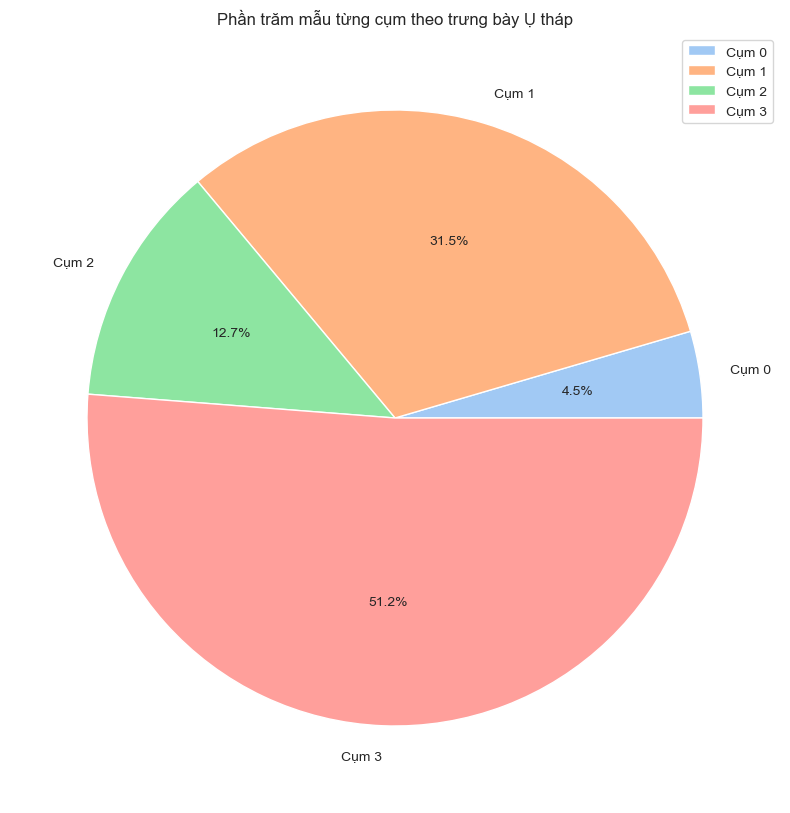

In [185]:
plt.figure(figsize=(10,10))
plt.title('Phần trăm mẫu từng cụm theo trưng bày Ụ tháp')
sns.set_palette('pastel')
sns.set_style('whitegrid')
plt.pie(df_cum_thap[0], labels=df_cum_thap['Phân cụm'], autopct='%1.1f%%')
plt.legend()
plt.show();

- Cụm lớn: Cụm 1, Cụm 3
- Cụm trung bình: Cụm 2
- Cụm nhỏ: Cụm 0

## Phân tích tỷ lệ tăng trưởng cụm trên ụ tháp:

In [186]:
df_tyletangtruong_thap_cum = df_phancum_uthap[['Phân cụm', 'Tỷ lệ tăng trưởng']]
df_tyletangtruong_thap_cum

Phân cụm  Tỷ lệ tăng trưởng
7751      Cụm 1           2.333450
7965      Cụm 1           3.500000
7966      Cụm 1           0.000000
7967      Cụm 1           7.500000
8197      Cụm 1           0.000000
...         ...                ...
434306    Cụm 0          32.298003
434472    Cụm 0          37.142703
434769    Cụm 0          35.258653
434900    Cụm 0          47.159765
435186    Cụm 0          50.000000

[64739 rows x 2 columns]

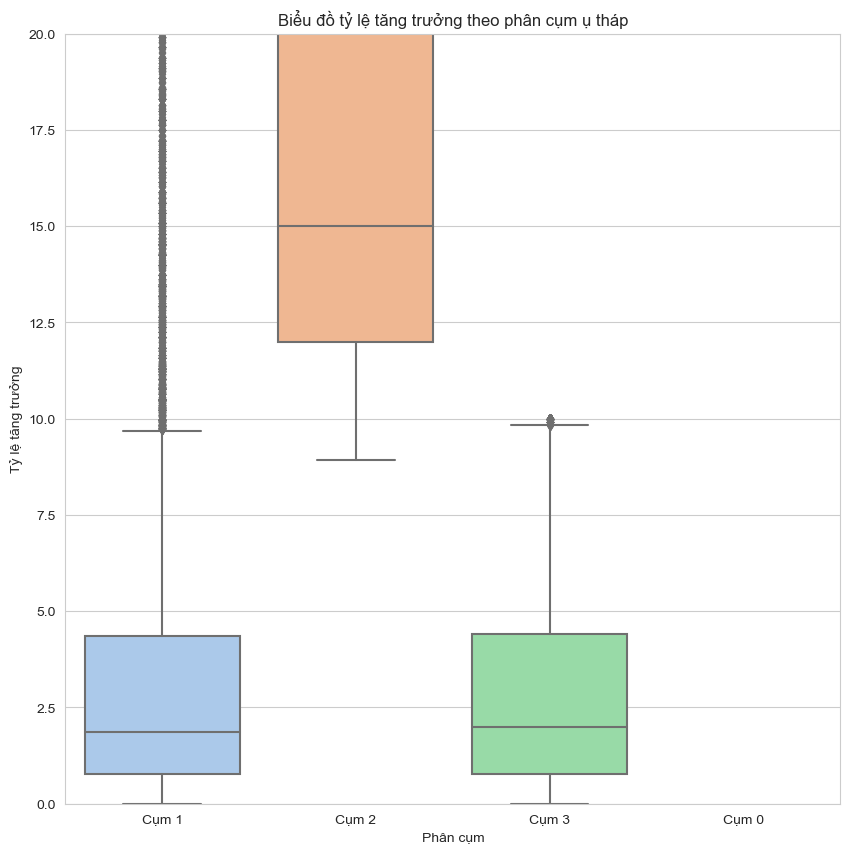

In [188]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(df_tyletangtruong_thap_cum, x = 'Phân cụm', y = 'Tỷ lệ tăng trưởng')
ax.set_ylim(0, 20)
plt.title('Biểu đồ tỷ lệ tăng trưởng theo phân cụm ụ tháp')
plt.show();

- Cụm hiệu quả: Cụm 0, cụm 2
- Cụm không hiệu quả: Cụm 1, Cụm 3

## Phân tích miền ụ tháp:

In [189]:
df_mien_thap_cum = df_phancum_uthap.groupby(['Phân cụm','Miền']).size().reset_index()
df_mien_thap_cum

Phân cụm        Miền      0
0     Cụm 0  Cao Nguyên    464
1     Cụm 0         HCM    578
2     Cụm 0    Miền Tây   1353
3     Cụm 0   Miền Đông    547
4     Cụm 1  Cao Nguyên   2303
5     Cụm 1         HCM   5882
6     Cụm 1    Miền Tây   7187
7     Cụm 1   Miền Đông   5034
8     Cụm 2  Cao Nguyên   1099
9     Cụm 2         HCM   2094
10    Cụm 2    Miền Tây   3321
11    Cụm 2   Miền Đông   1709
12    Cụm 3  Cao Nguyên   3643
13    Cụm 3         HCM  10307
14    Cụm 3    Miền Tây  10436
15    Cụm 3   Miền Đông   8782

<Figure size 500x500 with 0 Axes>

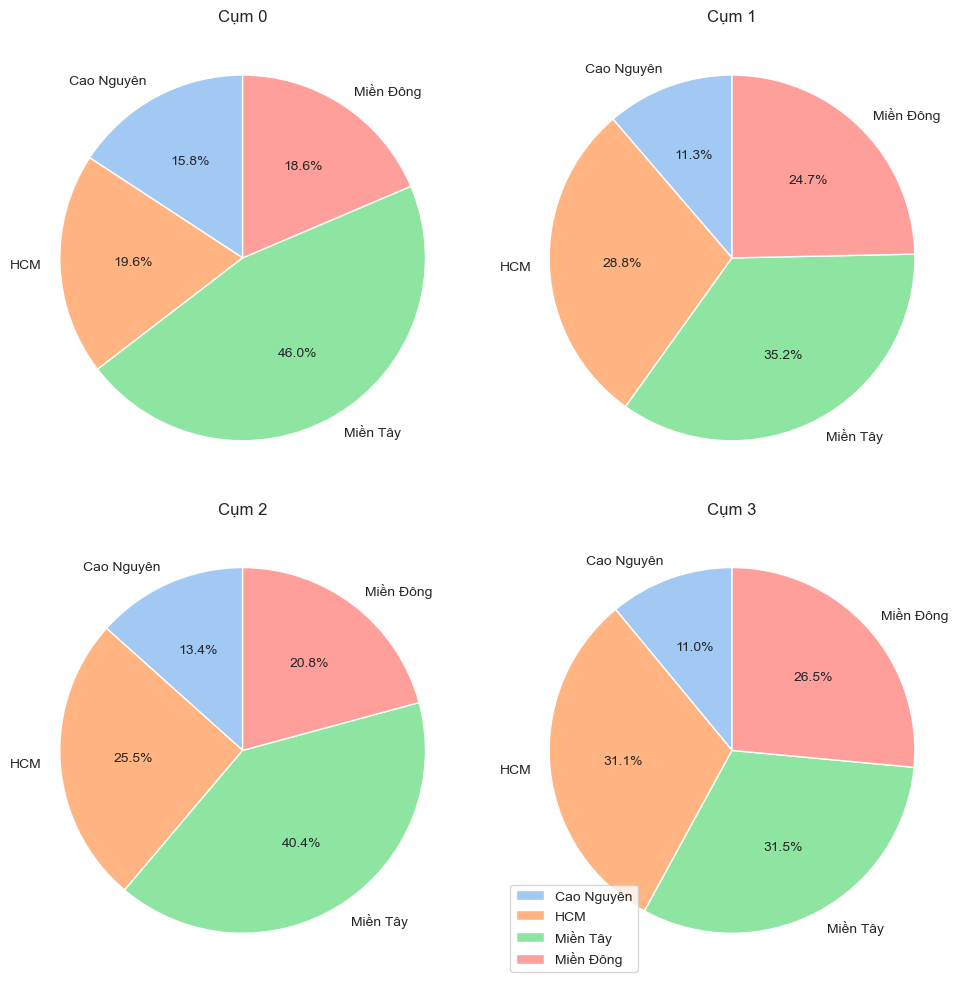

In [192]:
plt.figure(figsize=(5, 5))
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_mien_thap_cum[df_mien_thap_cum['Phân cụm'] == f'Cụm {i}']
    ax.pie(df_cum_nho[0], labels=df_cum_nho['Miền'], labeldistance=1.1, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cụm {i}')
    
plt.tight_layout()
plt.legend()
plt.show();

## Phân tích CTKM Ụ tháp:

In [193]:
df_ctkm_thap_cum = df_phancum_uthap.groupby(['Phân cụm','CTKM']).size().reset_index()
df_ctkm_thap_cum = df_ctkm_thap_cum.sort_values(by = 'CTKM', ascending= False)
df_ctkm_thap_cum

Phân cụm          CTKM      0
1    Cụm 0  Mua 2 tặng 1   2884
3    Cụm 1  Mua 2 tặng 1  15487
5    Cụm 2  Mua 2 tặng 1   8082
6    Cụm 3  Mua 2 tặng 1  33168
0    Cụm 0      Giảm giá     58
2    Cụm 1      Giảm giá   4919
4    Cụm 2      Giảm giá    141

<Figure size 500x500 with 0 Axes>

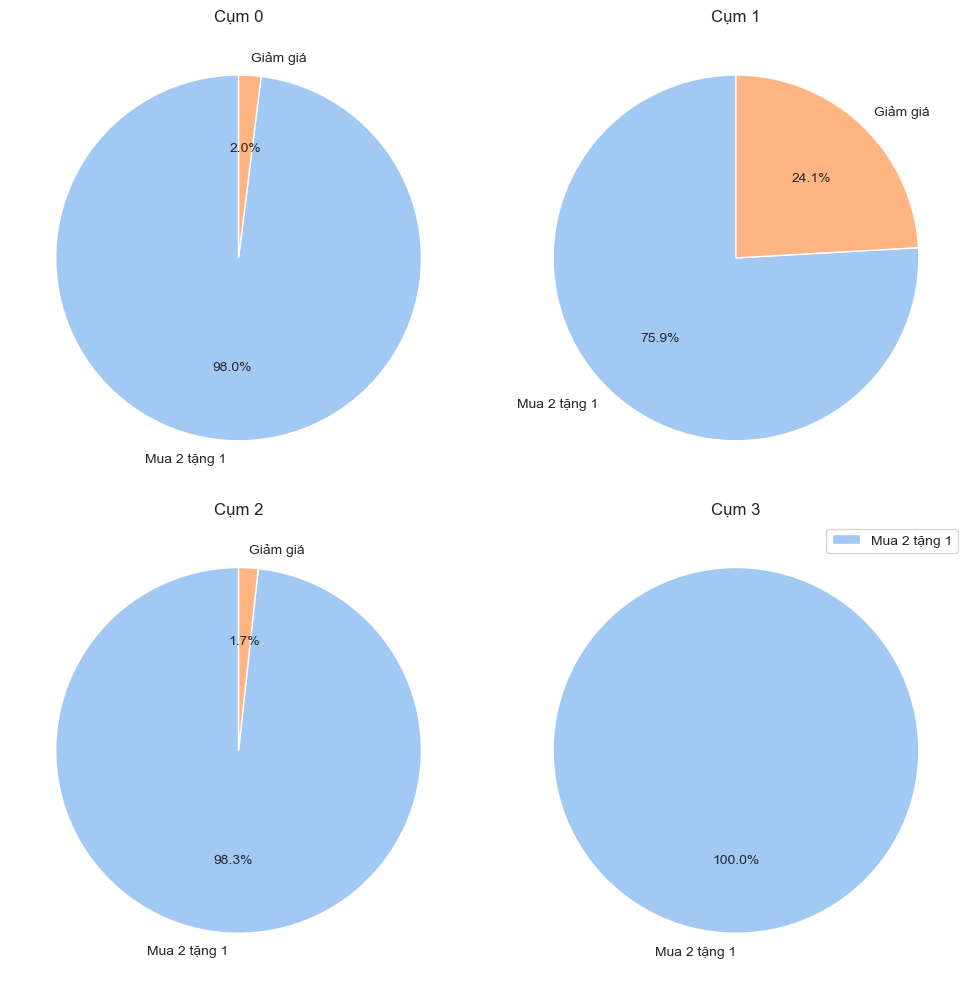

In [194]:
plt.figure(figsize=(5, 5))
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_ctkm_thap_cum[df_ctkm_thap_cum['Phân cụm'] == f'Cụm {i}']
    ax.pie(df_cum_nho[0], labels=df_cum_nho['CTKM'], labeldistance=1.1, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cụm {i}')
    
plt.tight_layout()
plt.legend()
plt.show();

- CTKM Mua 2 tặng 1 phần lớn có mặt trên ụ tháp

## Phân tích thời gian khuyến mãi:

In [195]:
df_tgkm_thap_cum = df_phancum_uthap[['Phân cụm','Thời gian khuyến mãi']]
df_tgkm_thap_cum

Phân cụm  Thời gian khuyến mãi
7751      Cụm 1                    27
7965      Cụm 1                    27
7966      Cụm 1                    27
7967      Cụm 1                    27
8197      Cụm 1                    27
...         ...                   ...
434306    Cụm 0                    26
434472    Cụm 0                    26
434769    Cụm 0                    26
434900    Cụm 0                    26
435186    Cụm 0                    26

[64739 rows x 2 columns]

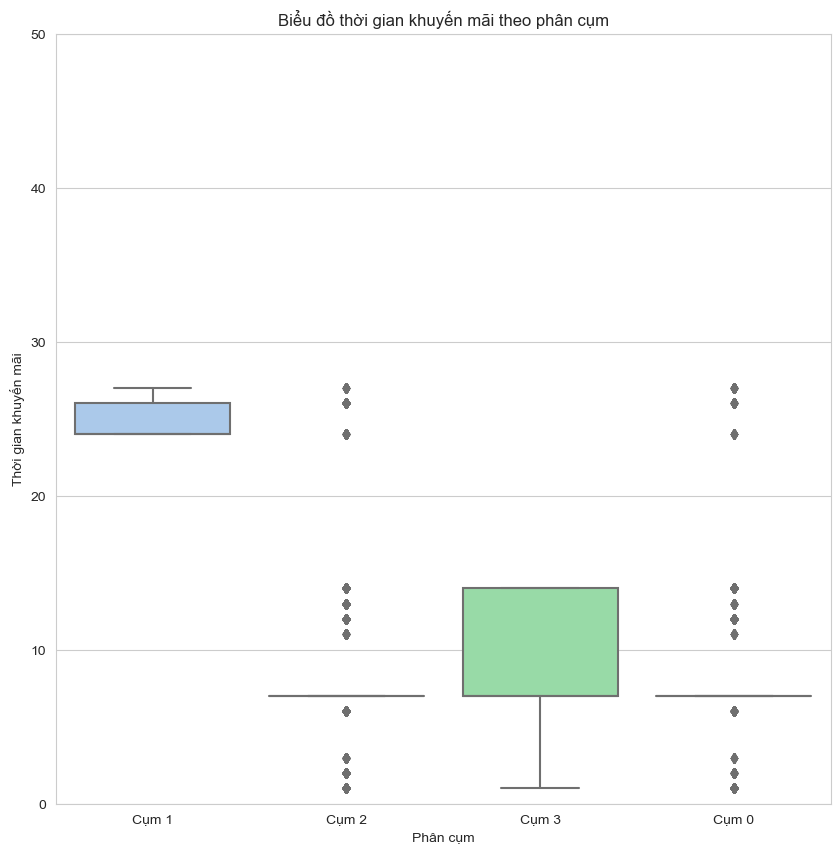

In [196]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(df_tgkm_thap_cum, x = 'Phân cụm', y = 'Thời gian khuyến mãi')
ax.set_ylim(0, 50)
plt.title('Biểu đồ thời gian khuyến mãi theo phân cụm')
plt.show();

## Phân tích phân khúc giá ụ tháp:

In [197]:
df_gia_cum_thap = df_phancum_uthap.groupby(['Phân cụm','Phân khúc giá']).size().reset_index()
df_gia_cum_thap 

Phân cụm Phân khúc giá      0
0     Cụm 0           Cao    212
1     Cụm 0            Rẻ     81
2     Cụm 0         Trung   2649
3     Cụm 1           Cao   3322
4     Cụm 1         Trung  17084
5     Cụm 2           Cao    284
6     Cụm 2            Rẻ    333
7     Cụm 2         Trung   7606
8     Cụm 3           Cao   2481
9     Cụm 3            Rẻ   1162
10    Cụm 3         Trung  29525

<Figure size 500x500 with 0 Axes>

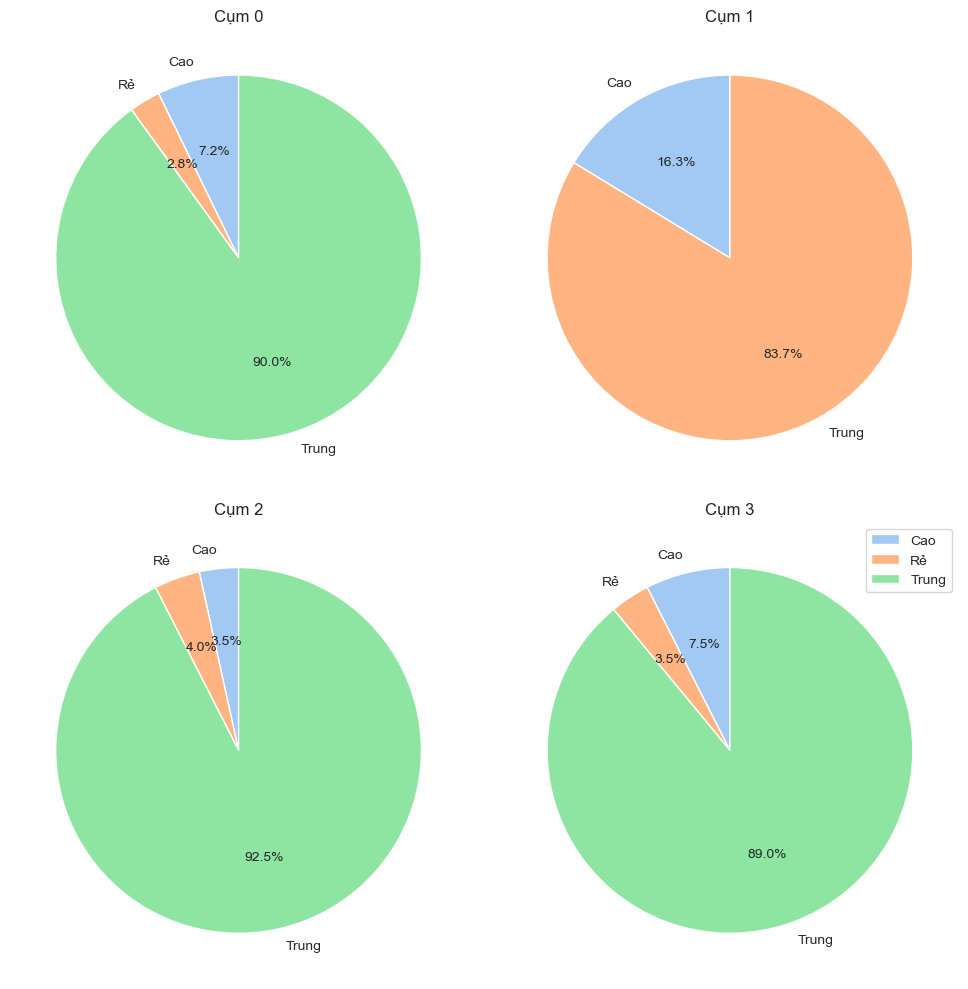

In [198]:
plt.figure(figsize=(5, 5))
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_gia_cum_thap[df_gia_cum_thap ['Phân cụm'] == f'Cụm {i}']
    ax.pie(df_cum_nho[0], labels=df_cum_nho['Phân khúc giá'], labeldistance=1.1, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cụm {i}')
    
plt.tight_layout()
plt.legend()
plt.show();

## Phân tích sự nổi tiếng của thương hiệu ụ tháp:

In [199]:
df_fame_cum_thap = df_phancum_uthap.groupby(['Phân cụm','Là thương hiệu nổi tiếng hay không']).size().reset_index()
df_fame_cum_thap 

Phân cụm Là thương hiệu nổi tiếng hay không      0
0    Cụm 0                                Yes   2942
1    Cụm 1                                Yes  20406
2    Cụm 2                                Yes   8223
3    Cụm 3                                Yes  33168

## Phân tích size ụ tháp:

In [200]:
df_size_cum_thap = df_phancum_uthap.groupby(['Phân cụm','Size']).size().reset_index()
df_size_cum_thap 

Phân cụm             Size      0
0    Cụm 0      Lớn (>200g)   2730
1    Cụm 0  Vừa (100g-200g)    212
2    Cụm 1      Lớn (>200g)  17084
3    Cụm 1  Vừa (100g-200g)   3322
4    Cụm 2      Lớn (>200g)   7939
5    Cụm 2  Vừa (100g-200g)    284
6    Cụm 3      Lớn (>200g)  30687
7    Cụm 3  Vừa (100g-200g)   2481

<Figure size 500x500 with 0 Axes>

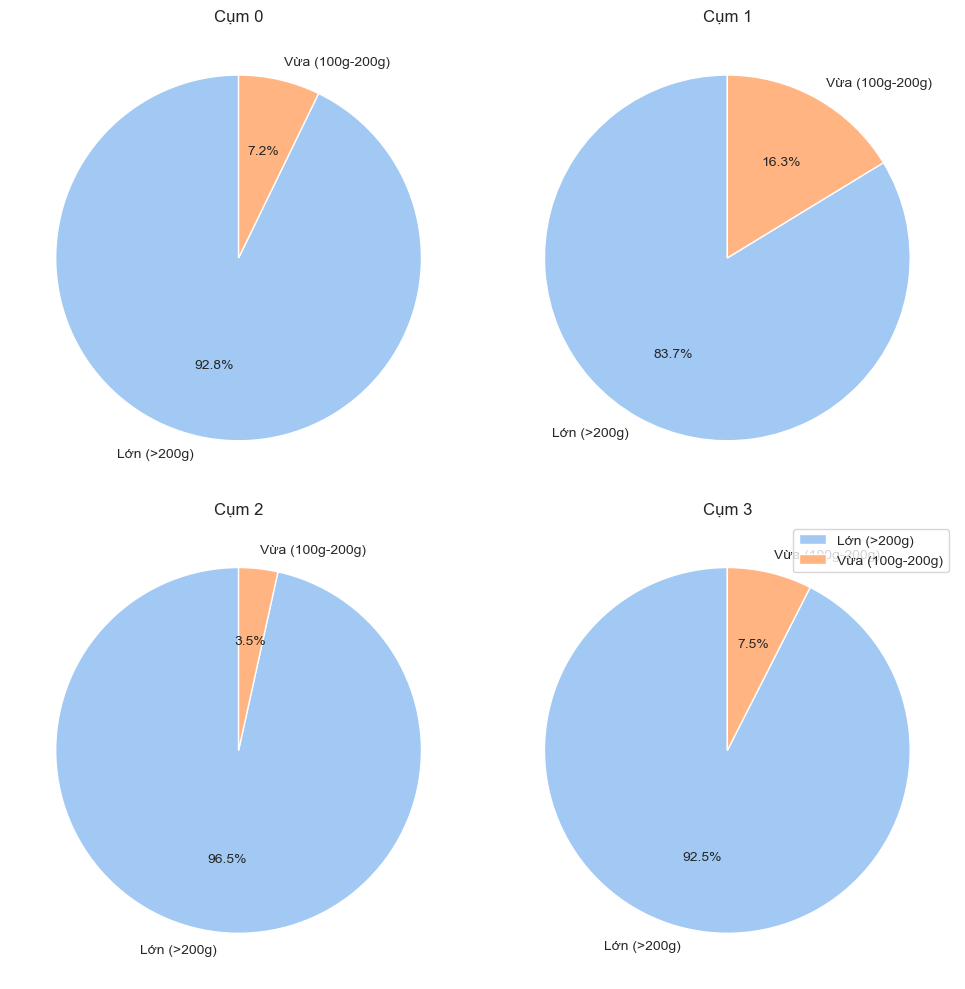

In [201]:
plt.figure(figsize=(5, 5))
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_size_cum_thap[df_size_cum_thap ['Phân cụm'] == f'Cụm {i}']
    ax.pie(df_cum_nho[0], labels=df_cum_nho['Size'], labeldistance=1.1, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cụm {i}')
    
plt.tight_layout()
plt.legend()
plt.show();

## Phân tích quy mô siêu thị ụ tháp:

In [202]:
df_st_cum_thap = df_phancum_uthap.groupby(['Phân cụm','Loại ST']).size().reset_index()
df_st_cum_thap 

Phân cụm              Loại ST      0
0     Cụm 0     1,2 tỷ  - < 2 tỷ   1119
1     Cụm 0        2 tỷ - < 5 tỷ    231
2     Cụm 0  900 triệu - <1,2 tỷ    834
3     Cụm 0           <900 triệu    758
4     Cụm 1     1,2 tỷ  - < 2 tỷ   8150
5     Cụm 1        2 tỷ - < 5 tỷ   2449
6     Cụm 1  900 triệu - <1,2 tỷ   5527
7     Cụm 1           <900 triệu   4280
8     Cụm 2     1,2 tỷ  - < 2 tỷ   3384
9     Cụm 2        2 tỷ - < 5 tỷ    915
10    Cụm 2  900 triệu - <1,2 tỷ   2224
11    Cụm 2           <900 triệu   1700
12    Cụm 3     1,2 tỷ  - < 2 tỷ  13368
13    Cụm 3        2 tỷ - < 5 tỷ   4348
14    Cụm 3  900 triệu - <1,2 tỷ   9132
15    Cụm 3           <900 triệu   6320

<Figure size 500x500 with 0 Axes>

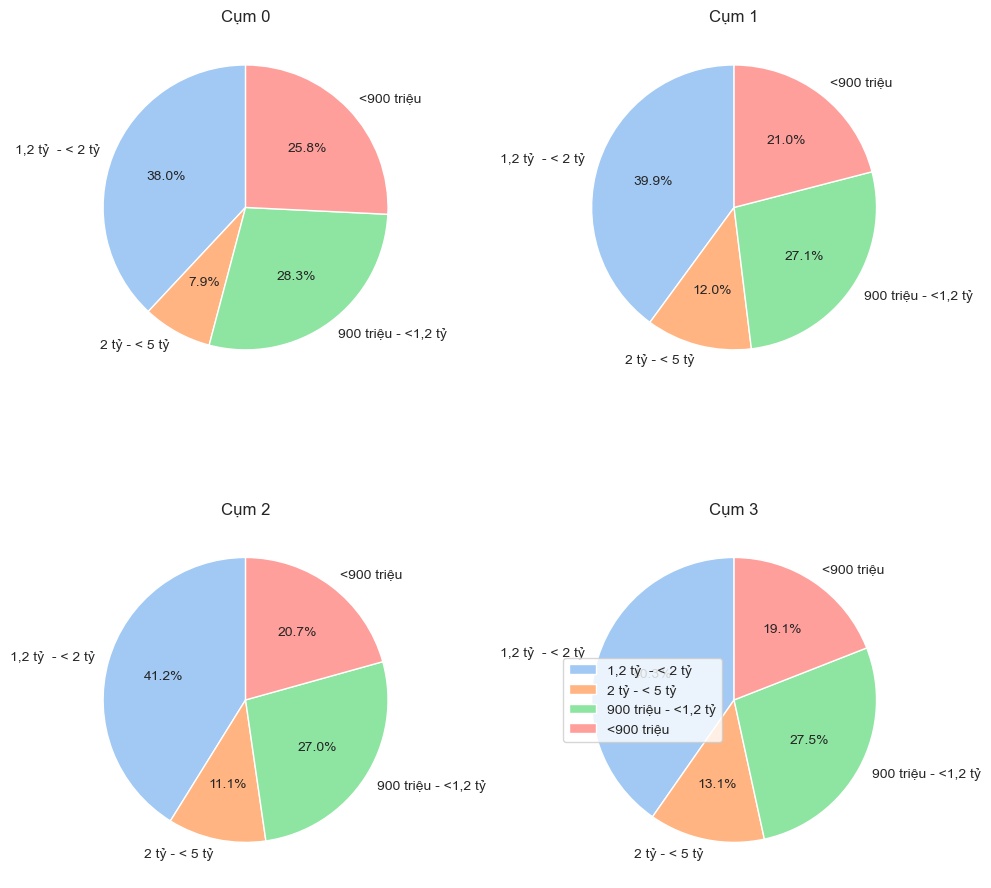

In [203]:
plt.figure(figsize=(5, 5))
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_st_cum_thap[df_st_cum_thap ['Phân cụm'] == f'Cụm {i}']
    ax.pie(df_cum_nho[0], labels=df_cum_nho['Loại ST'], labeldistance=1.1, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cụm {i}')
    
plt.tight_layout()
plt.legend()
plt.show();

## Phân tích công dụng sản phẩm ụ tháp

In [204]:
df_cd_cum_thap = df_phancum_uthap.groupby(['Phân cụm','Công dụng sản phẩm']).size().reset_index()
df_cd_cum_thap

Phân cụm    Công dụng sản phẩm      0
0     Cụm 0              Ngừa sâu    667
1     Cụm 0              Thơm mát   1122
2     Cụm 0            Trắng răng    941
3     Cụm 0  Trắng răng, ngừa sâu    212
4     Cụm 1              Thơm mát  11547
5     Cụm 1            Trắng răng   5537
6     Cụm 1  Trắng răng, ngừa sâu   3322
7     Cụm 2              Ngừa sâu   1935
8     Cụm 2              Thơm mát   3347
9     Cụm 2            Trắng răng   2657
10    Cụm 2  Trắng răng, ngừa sâu    284
11    Cụm 3              Ngừa sâu   5040
12    Cụm 3              Thơm mát  16537
13    Cụm 3            Trắng răng   9110
14    Cụm 3  Trắng răng, ngừa sâu   2481

<Figure size 500x500 with 0 Axes>

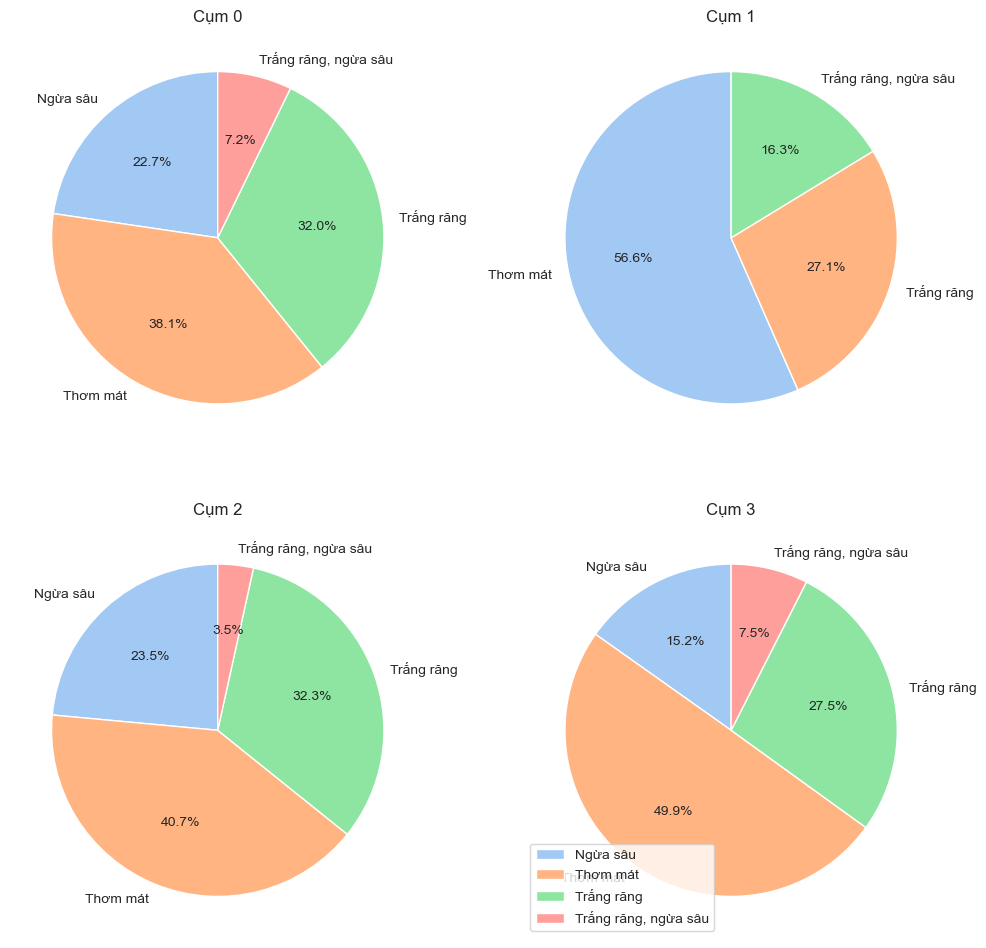

In [205]:
plt.figure(figsize=(5, 5))
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_cd_cum_thap[df_cd_cum_thap ['Phân cụm'] == f'Cụm {i}']
    ax.pie(df_cum_nho[0], labels=df_cum_nho['Công dụng sản phẩm'], labeldistance=1.1, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cụm {i}')
    
plt.tight_layout()
plt.legend()
plt.show();

Đặc điểm khuyến mãi hiệu quả:
Cụm hiệu quả được chọn: Trên kệ: Cụm 3; Ụ tháp: Cụm 2
- Trên kệ: 
+ Tập trung ở miền Tây, TPHCM
+ CTKM: Giảm giá, Mua 2 tặng 1
+ Phân khúc giá: Trung
+ Là thương hiệu nổi tiếng
+ Size lớn (> 200g)
+ Loại ST: 900 triệu => 1 tỷ 2, 1 tỷ 2 => 2 tỷ
+ TGKM: khoảng 1 tuần
+ Công dụng sản phẩm: Thơm mát, ngừa sâu

- Ụ tháp:
+ Tập trung ở miền Tây, TPHCM
+ CTKM: Mua 2 tặng 1
+ Phân khúc giá: Trung
+ Là thương hiệu nổi tiếng
+ Size lớn (> 200g)
+ Loại ST: 900 triệu => 1 tỷ 2, 1 tỷ 2 => 2 tỷ
+ TGKM: khoảng 1 tuần
+ Công dụng sản phẩm: Thơm mát, trắng răng, ngừa sâu

# Task 3A: Phân khúc giá trung, KM như thế nào là hiệu quả?

In [238]:
df_giatrung = master_df[master_df['Phân khúc giá'] == 'Trung']
df_giatrung

Year  Mã CTKM                                           Tên CTKM  \
6       2022   462004             CTKM tháng 3  - (24/03-28/12) -  15955   
7       2022   462004             CTKM tháng 3  - (24/03-28/12) -  15955   
8       2022   462004             CTKM tháng 3  - (24/03-28/12) -  15955   
12      2022   462004             CTKM tháng 3  - (24/03-28/12) -  15955   
13      2022   462004             CTKM tháng 3  - (24/03-28/12) -  15955   
...      ...      ...                                                ...   
459715  2023   731814  CTKM BỔ SUNG  THÁNG 03 (15/03-28/03) Tặng 15k ...   
459716  2023   731814  CTKM BỔ SUNG  THÁNG 03 (15/03-28/03) Tặng 15k ...   
459717  2023   731814  CTKM BỔ SUNG  THÁNG 03 (15/03-28/03) Tặng 15k ...   
459718  2023   731814  CTKM BỔ SUNG  THÁNG 03 (15/03-28/03) Tặng 15k ...   
459719  2023   731814  CTKM BỔ SUNG  THÁNG 03 (15/03-28/03) Tặng 15k ...   

                                               CTKM Ngày bắt đầu  \
6                                          Giảm giá   2022-03-24   
7                                          Giảm giá   2022-03-24   
8                                          Giảm giá   2022-03-24   
12                                         Giảm giá   2022-03-24   
13                                         Giảm giá   2022-03-24   
...                                             ...          ...   
459715  99K Colgate tặng 15k mua thịt, cá, trái cây   2023-03-15   
459716  99K Colgate tặng 15k mua thịt, cá, trái cây   2023-03-15   
459717  99K Colgate tặng 15k mua thịt, cá, trái cây   2023-03-15   
459718  99K Colgate tặng 15k mua thịt, cá, trái cây   2023-03-15   
459719  99K Colgate tặng 15k mua thịt, cá, trái cây   2023-03-15   

       Ngày kết thúc  Thời gian khuyến mãi  Tỷ lệ khuyến mãi       Model  \
6         2022-12-28                   280          0.187500  2108003059   
7         2022-12-28                   280          0.187500  2108003059   
8         2022-12-28                   280          0.187500  2108003059   
12        2022-12-28                   280          0.187500  2108003059   
13        2022-12-28                   280          0.187500  2108003059   
...              ...                   ...               ...         ...   
459715    2023-03-28                    14          0.151515  1607004281   
459716    2023-03-28                    14          0.151515  1607004281   
459717    2023-03-28                    14          0.151515  1607004281   
459718    2023-03-28                    14          0.151515  1607004281   
459719    2023-03-28                    14          0.151515  1607004281   

          Mã SP chính  ...    Brand   DVT  Là thương hiệu nổi tiếng hay không  \
6       9252712000368  ...     2080  Tuýp                                  No   
7       9252712000368  ...     2080  Tuýp                                  No   
8       9252712000368  ...     2080  Tuýp                                  No   
12      9252712000368  ...     2080  Tuýp                                  No   
13      9252712000368  ...     2080  Tuýp                                  No   
...               ...  ...      ...   ...                                 ...   
459715  9252836000012  ...  COLGATE  Tuýp                                 Yes   
459716  9252836000012  ...  COLGATE  Tuýp                                 Yes   
459717  9252836000012  ...  COLGATE  Tuýp                                 Yes   
459718  9252836000012  ...  COLGATE  Tuýp                                 Yes   
459719  9252836000012  ...  COLGATE  Tuýp                                 Yes   

            TE/NL             Size Phân khúc giá Trưng bày  \
6       Người lớn  Vừa (100g-200g)         Trung   Trên kệ   
7       Người lớn  Vừa (100g-200g)         Trung   Trên kệ   
8       Người lớn  Vừa (100g-200g)         Trung   Trên kệ   
12      Người lớn  Vừa (100g-200g)         Trung   Trên kệ   
13      Người lớn  Vừa (100g-200g)         Trung   Trên kệ   
...           ...   

In [239]:
df_giatrung = df_giatrung[['CTKM', 'Thời gian khuyến mãi', 'Tỷ lệ khuyến mãi', 'Miền', 'Thu nhập dân cư quanh shop', 'Phân loại mức độ cạnh tranh FMCG', 'Loại ST', 'Công dụng sản phẩm', 'Là thương hiệu nổi tiếng hay không', 'TE/NL', 'Size', 'Phân khúc giá', 'Trưng bày', 'Sức bán thường', 'Tỷ lệ số ngày tồn = 0 / số ngày KM', 'Tỷ lệ tăng trưởng']]
df_giatrung

CTKM  Thời gian khuyến mãi  \
6                                          Giảm giá                   280   
7                                          Giảm giá                   280   
8                                          Giảm giá                   280   
12                                         Giảm giá                   280   
13                                         Giảm giá                   280   
...                                             ...                   ...   
459715  99K Colgate tặng 15k mua thịt, cá, trái cây                    14   
459716  99K Colgate tặng 15k mua thịt, cá, trái cây                    14   
459717  99K Colgate tặng 15k mua thịt, cá, trái cây                    14   
459718  99K Colgate tặng 15k mua thịt, cá, trái cây                    14   
459719  99K Colgate tặng 15k mua thịt, cá, trái cây                    14   

        Tỷ lệ khuyến mãi        Miền  \
6               0.187500    Miền Tây   
7               0.187500    Miền Tây   
8               0.187500    Miền Tây   
12              0.187500   Miền Đông   
13              0.187500    Miền Tây   
...                  ...         ...   
459715          0.151515  Cao Nguyên   
459716          0.151515         HCM   
459717          0.151515         HCM   
459718          0.151515    Miền Tây   
459719          0.151515    Miền Tây   

                           Thu nhập dân cư quanh shop  \
6           Khu dân cư có thu nhập thấp - nông nghiệp   
7           Khu dân cư có thu nhập thấp - nông nghiệp   
8                          Khu dân cư có thu nhập khá   
12      Khu dân cư có thu nhập thấp - phi nông nghiệp   
13      Khu dân cư có thu nhập thấp - phi nông nghiệp   
...                                               ...   
459715                             Shop không có data   
459716                             Shop không có data   
459717                             Shop không có data   
459718                             Shop không có data   
459719                             Shop không có data   

       Phân loại mức độ cạnh tranh FMCG              Loại ST  \
6                  Không cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
7                  Không cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
8                  Không cạnh tranh cao           <900 triệu   
12                       Cạnh tranh cao  900 triệu - <1,2 tỷ   
13                       Cạnh tranh cao           <900 triệu   
...                                 ...                  ...   
459715               Shop không có data     1,2 tỷ  - < 2 tỷ   
459716               Shop không có data     1,2 tỷ  - < 2 tỷ   
459717               Shop không có data     1,2 tỷ  - < 2 tỷ   
459718               Shop không có data  900 triệu - <1,2 tỷ   
459719               Shop không có data           <900 triệu   

       Công dụng sản phẩm Là thương hiệu nổi tiếng hay không      TE/NL  \
6                Ngừa sâu                                 No  Người lớn   
7                Ngừa sâu                                 No  Người lớn   
8                Ngừa sâu                                 No  Người lớn   
12               Ngừa sâu                                 No  Người lớn   
13               Ngừa sâu                                 No  Người lớn   
...                   ...                                ...        ...   
459715           Ngừa sâu                                Yes  Người lớn   
459716           Ngừa sâu                                Yes  Người lớn   
459717           Ngừa sâu                                Yes  Người lớn   
459718           Ngừa sâu                                Yes  Người lớn   
459719           Ngừa sâu                                Yes  Người lớn   

                   Size Phân khúc giá Trưng bày  Sức bán thường  \
6       Vừa (100g-200g)         Trung   Trên kệ          0.1000   
7       Vừa (100g-200g)         Trung   Trên kệ          0.1000   
8       Vừa (100g-200g)         Trung   Trên kệ          0.1000   
12      Vừa (100g-

In [240]:
col_cat_trung = [df_giatrung.columns.get_loc(col) for col in list(df_giatrung.select_dtypes('object').columns)]
col_cat_trung

[0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [241]:
X_trung = df_giatrung.values
X_trung

array([['Giảm giá', 280, 0.1875, ..., 0.1, 0.9535714285714286,
        3.076923076923077],
       ['Giảm giá', 280, 0.1875, ..., 0.1, 0.9535714285714286,
        3.076923076923077],
       ['Giảm giá', 280, 0.1875, ..., 0.1, 0.95, 5.714285714285714],
       ...,
       ['99K Colgate tặng 15k mua thịt, cá, trái cây', 14,
        0.1515151515151515, ..., 0.1429, 0.0, 0.0],
       ['99K Colgate tặng 15k mua thịt, cá, trái cây', 14,
        0.1515151515151515, ..., 0.2857, 0.0, 0.0],
       ['99K Colgate tặng 15k mua thịt, cá, trái cây', 14,
        0.1515151515151515, ..., 0.0, 0.0, 0.0]], dtype=object)

In [242]:
kproto = KPrototypes(n_jobs = -1, n_clusters= 2, init='Cao', verbose=0)
clusters_trung = kproto.fit_predict(X_trung, categorical=col_cat_ke)
df_giatrung['Cluster'] = clusters_trung
df_giatrung.head()

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_18330/272959451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_giatrung['Cluster'] = clusters_trung


CTKM  Thời gian khuyến mãi  Tỷ lệ khuyến mãi       Miền  \
6   Giảm giá                   280            0.1875   Miền Tây   
7   Giảm giá                   280            0.1875   Miền Tây   
8   Giảm giá                   280            0.1875   Miền Tây   
12  Giảm giá                   280            0.1875  Miền Đông   
13  Giảm giá                   280            0.1875   Miền Tây   

                       Thu nhập dân cư quanh shop  \
6       Khu dân cư có thu nhập thấp - nông nghiệp   
7       Khu dân cư có thu nhập thấp - nông nghiệp   
8                      Khu dân cư có thu nhập khá   
12  Khu dân cư có thu nhập thấp - phi nông nghiệp   
13  Khu dân cư có thu nhập thấp - phi nông nghiệp   

   Phân loại mức độ cạnh tranh FMCG              Loại ST Công dụng sản phẩm  \
6              Không cạnh tranh cao     1,2 tỷ  - < 2 tỷ           Ngừa sâu   
7              Không cạnh tranh cao     1,2 tỷ  - < 2 tỷ           Ngừa sâu   
8              Không cạnh tranh cao           <900 triệu           Ngừa sâu   
12                   Cạnh tranh cao  900 triệu - <1,2 tỷ           Ngừa sâu   
13                   Cạnh tranh cao           <900 triệu           Ngừa sâu   

   Là thương hiệu nổi tiếng hay không      TE/NL             Size  \
6                                  No  Người lớn  Vừa (100g-200g)   
7                                  No  Người lớn  Vừa (100g-200g)   
8                                  No  Người lớn  Vừa (100g-200g)   
12                                 No  Người lớn  Vừa (100g-200g)   
13                                 No  Người lớn  Vừa (100g-200g)   

   Phân khúc giá Trưng bày  Sức bán thường  \
6          Trung   Trên kệ             0.1   
7          Trung   Trên kệ             0.1   
8          Trung   Trên kệ             0.1   
12         Trung   Trên kệ             0.1   
13         Trung   Trên kệ             0.1   

    Tỷ lệ số ngày tồn = 0 / số ngày KM  Tỷ lệ tăng trưởng  Cluster  
6                             0.953571           3.076923        1  
7                             0.953571           3.076923        1  
8                             0.950000           5.714286        1  
12                            0.917857           1.739130        1  
13                            0.914286           1.666667        1

In [243]:
cluster_num_giatrung = df_giatrung.groupby('Cluster').size().sort_values(ascending = False)
cluster_num_giatrung

Cluster
0    341882
1      2457
dtype: int64

In [244]:
df_clus_trung_0 = df_giatrung[df_giatrung['Cluster'] == 0]
df_clus_trung_0

CTKM  Thời gian khuyến mãi  \
2453                                       Giảm giá                    90   
2454                                       Giảm giá                    90   
2455                                       Giảm giá                    90   
2536                                       Giảm giá                    90   
2649                                       Giảm giá                    90   
...                                             ...                   ...   
459715  99K Colgate tặng 15k mua thịt, cá, trái cây                    14   
459716  99K Colgate tặng 15k mua thịt, cá, trái cây                    14   
459717  99K Colgate tặng 15k mua thịt, cá, trái cây                    14   
459718  99K Colgate tặng 15k mua thịt, cá, trái cây                    14   
459719  99K Colgate tặng 15k mua thịt, cá, trái cây                    14   

        Tỷ lệ khuyến mãi        Miền  \
2453            0.137931    Miền Tây   
2454            0.137931    Miền Tây   
2455            0.137931    Miền Tây   
2536            0.137931    Miền Tây   
2649            0.137931    Miền Tây   
...                  ...         ...   
459715          0.151515  Cao Nguyên   
459716          0.151515         HCM   
459717          0.151515         HCM   
459718          0.151515    Miền Tây   
459719          0.151515    Miền Tây   

                           Thu nhập dân cư quanh shop  \
2453        Khu dân cư có thu nhập thấp - nông nghiệp   
2454        Khu dân cư có thu nhập thấp - nông nghiệp   
2455        Khu dân cư có thu nhập thấp - nông nghiệp   
2536    Khu dân cư có thu nhập thấp - phi nông nghiệp   
2649                               Shop không có data   
...                                               ...   
459715                             Shop không có data   
459716                             Shop không có data   
459717                             Shop không có data   
459718                             Shop không có data   
459719                             Shop không có data   

       Phân loại mức độ cạnh tranh FMCG              Loại ST  \
2453               Không cạnh tranh cao        2 tỷ - < 5 tỷ   
2454               Không cạnh tranh cao  900 triệu - <1,2 tỷ   
2455                     Cạnh tranh cao           <900 triệu   
2536                     Cạnh tranh cao           <900 triệu   
2649                     Cạnh tranh cao        2 tỷ - < 5 tỷ   
...                                 ...                  ...   
459715               Shop không có data     1,2 tỷ  - < 2 tỷ   
459716               Shop không có data     1,2 tỷ  - < 2 tỷ   
459717               Shop không có data     1,2 tỷ  - < 2 tỷ   
459718               Shop không có data  900 triệu - <1,2 tỷ   
459719               Shop không có data           <900 triệu   

          Công dụng sản phẩm Là thương hiệu nổi tiếng hay không      TE/NL  \
2453    Trắng răng, thơm mát                                 No  Người lớn   
2454    Trắng răng, thơm mát                                 No  Người lớn   
2455    Trắng răng, thơm mát                                 No  Người lớn   
2536    Trắng răng, thơm mát                                 No  Người lớn   
2649    Trắng răng, thơm mát                                 No  Người lớn   
...                      ...                                ...        ...   
459715              Ngừa sâu                                Yes  Người lớn   
459716              Ngừa sâu                                Yes  Người lớn   
459717              Ngừa sâu                                Yes  Người lớn   
459718              Ngừa sâu                                Yes  Người lớn   
459719              Ngừa sâu                                Yes  Người lớn   

                   Size Phân khúc giá Trưng bày  Sức bán thường  \
2453    Vừa (100g-200g)         Trung   Trên kệ        0.009804   
2454    Vừa (100g-200g)         Trung   Trên kệ        0.009804   
2455    Vừa (100g-200g)         Trung   Trên kệ  

In [245]:
X_trung_0 = df_clus_trung_0.values
X_trung_0

array([['Giảm giá', 90, 0.1379310344827586, ..., 0.9888888888888889,
        100.0, 0],
       ['Giảm giá', 90, 0.1379310344827586, ..., 0.9888888888888889,
        100.0, 0],
       ['Giảm giá', 90, 0.1379310344827586, ..., 0.9888888888888889,
        10.0, 0],
       ...,
       ['99K Colgate tặng 15k mua thịt, cá, trái cây', 14,
        0.1515151515151515, ..., 0.0, 0.0, 0],
       ['99K Colgate tặng 15k mua thịt, cá, trái cây', 14,
        0.1515151515151515, ..., 0.0, 0.0, 0],
       ['99K Colgate tặng 15k mua thịt, cá, trái cây', 14,
        0.1515151515151515, ..., 0.0, 0.0, 0]], dtype=object)

In [246]:
kproto = KPrototypes(n_jobs = -1, n_clusters= 3, init='Cao', verbose=0)
clusters_trung_0 = kproto.fit_predict(X_trung_0, categorical=col_cat_trung)
df_clus_trung_0['Cluster_nhỏ'] = clusters_trung_0
df_clus_trung_0.head()

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_18330/2750304897.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clus_trung_0['Cluster_nhỏ'] = clusters_trung_0


CTKM  Thời gian khuyến mãi  Tỷ lệ khuyến mãi      Miền  \
2453  Giảm giá                    90          0.137931  Miền Tây   
2454  Giảm giá                    90          0.137931  Miền Tây   
2455  Giảm giá                    90          0.137931  Miền Tây   
2536  Giảm giá                    90          0.137931  Miền Tây   
2649  Giảm giá                    90          0.137931  Miền Tây   

                         Thu nhập dân cư quanh shop  \
2453      Khu dân cư có thu nhập thấp - nông nghiệp   
2454      Khu dân cư có thu nhập thấp - nông nghiệp   
2455      Khu dân cư có thu nhập thấp - nông nghiệp   
2536  Khu dân cư có thu nhập thấp - phi nông nghiệp   
2649                             Shop không có data   

     Phân loại mức độ cạnh tranh FMCG              Loại ST  \
2453             Không cạnh tranh cao        2 tỷ - < 5 tỷ   
2454             Không cạnh tranh cao  900 triệu - <1,2 tỷ   
2455                   Cạnh tranh cao           <900 triệu   
2536                   Cạnh tranh cao           <900 triệu   
2649                   Cạnh tranh cao        2 tỷ - < 5 tỷ   

        Công dụng sản phẩm Là thương hiệu nổi tiếng hay không      TE/NL  \
2453  Trắng răng, thơm mát                                 No  Người lớn   
2454  Trắng răng, thơm mát                                 No  Người lớn   
2455  Trắng răng, thơm mát                                 No  Người lớn   
2536  Trắng răng, thơm mát                                 No  Người lớn   
2649  Trắng răng, thơm mát                                 No  Người lớn   

                 Size Phân khúc giá Trưng bày  Sức bán thường  \
2453  Vừa (100g-200g)         Trung   Trên kệ        0.009804   
2454  Vừa (100g-200g)         Trung   Trên kệ        0.009804   
2455  Vừa (100g-200g)         Trung   Trên kệ        0.100000   
2536  Vừa (100g-200g)         Trung   Trên kệ        0.100000   
2649  Vừa (100g-200g)         Trung   Trên kệ        0.009804   

      Tỷ lệ số ngày tồn = 0 / số ngày KM  Tỷ lệ tăng trưởng  Cluster  \
2453                            0.988889              100.0        0   
2454                            0.988889              100.0        0   
2455                            0.988889               10.0        0   
2536                            0.977778                5.0        0   
2649                            0.966667              100.0        0   

      Cluster_nhỏ  
2453            0  
2454            0  
2455            0  
2536            0  
2649            0

In [247]:
cluster_num_giatrung_0 = df_clus_trung_0.groupby('Cluster_nhỏ').size().sort_values(ascending = False)
cluster_num_giatrung_0

Cluster_nhỏ
1    172759
2    143662
0     25461
dtype: int64

In [248]:
df_giatrung_cumnho_1 = df_clus_trung_0[df_clus_trung_0['Cluster_nhỏ'] == 1]
df_giatrung_cumnho_2 = df_clus_trung_0[df_clus_trung_0['Cluster_nhỏ'] == 2]

In [249]:
X_trung_0_1 = df_giatrung_cumnho_1.values
X_trung_0_2 = df_giatrung_cumnho_2.values 

In [250]:
kproto = KPrototypes(n_jobs = -1, n_clusters= 3, init='Cao', verbose=0)
clusters = kproto.fit_predict(X_trung_0_1, categorical=col_cat_ke)
df_giatrung_cumnho_1['Cluster_nhỏ_1'] = clusters
df_giatrung_cumnho_1.head()

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_18330/3085755688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_giatrung_cumnho_1['Cluster_nhỏ_1'] = clusters


CTKM  Thời gian khuyến mãi  \
7225                              Giảm giá                    28   
7530                              Giảm giá                    28   
8995                              Giảm giá                    20   
9077                              Giảm giá                    28   
10098  Bán kèm - SP cùng loại giảm giá 50%                    16   

       Tỷ lệ khuyến mãi       Miền  \
7225           0.144444   Miền Tây   
7530           0.091837        HCM   
8995           0.154762        HCM   
9077           0.091837  Miền Đông   
10098          0.250000  Miền Đông   

                          Thu nhập dân cư quanh shop  \
7225                              Shop không có data   
7530   Khu dân cư có thu nhập thấp - phi nông nghiệp   
8995   Khu dân cư có thu nhập thấp - phi nông nghiệp   
9077                      Khu dân cư có thu nhập khá   
10098                     Khu dân cư có thu nhập khá   

      Phân loại mức độ cạnh tranh FMCG              Loại ST  \
7225              Không cạnh tranh cao  900 triệu - <1,2 tỷ   
7530              Không cạnh tranh cao           <900 triệu   
8995                    Cạnh tranh cao  900 triệu - <1,2 tỷ   
9077              Không cạnh tranh cao  900 triệu - <1,2 tỷ   
10098             Không cạnh tranh cao     1,2 tỷ  - < 2 tỷ   

      Công dụng sản phẩm Là thương hiệu nổi tiếng hay không      TE/NL  \
7225            Thơm mát                                Yes  Người lớn   
7530          Trắng răng                                Yes  Người lớn   
8995            Thơm mát                                Yes  Người lớn   
9077          Trắng răng                                Yes  Người lớn   
10098           Thơm mát                                Yes  Người lớn   

                  Size Phân khúc giá Trưng bày  Sức bán thường  \
7225       Lớn (>200g)         Trung   Trên kệ        0.102057   
7530       Lớn (>200g)         Trung   Trên kệ        0.017862   
8995   Vừa (100g-200g)         Trung   Trên kệ        0.047633   
9077       Lớn (>200g)         Trung   Trên kệ        0.023810   
10098      Lớn (>200g)         Trung   Trên kệ        0.285700   

       Tỷ lệ số ngày tồn = 0 / số ngày KM  Tỷ lệ tăng trưởng  Cluster  \
7225                             0.964286         100.000000        0   
7530                             0.928571         100.000000        0   
8995                             0.950000         100.000000        0   
9077                             0.678571          84.000000        0   
10098                            0.937500           3.500175        0   

       Cluster_nhỏ  Cluster_nhỏ_1  
7225             1              1  
7530             1              1  
8995             1              1  
9077             1              1  
10098            1              2

In [251]:
kproto = KPrototypes(n_jobs = -1, n_clusters= 3, init='Cao', verbose=0)
clusters = kproto.fit_predict(X_trung_0_2, categorical=col_cat_ke)
df_giatrung_cumnho_2['Cluster_nhỏ_1'] = clusters
df_giatrung_cumnho_2.head()

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_18330/614634287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_giatrung_cumnho_2['Cluster_nhỏ_1'] = clusters


CTKM  Thời gian khuyến mãi  Tỷ lệ khuyến mãi      Miền  \
7220  Giảm giá                    28          0.166667  Miền Tây   
7221  Giảm giá                    28          0.166667  Miền Tây   
7224  Giảm giá                    28          0.144444  Miền Tây   
7245  Giảm giá                    28          0.114583       HCM   
7246  Giảm giá                    28          0.114583       HCM   

                     Thu nhập dân cư quanh shop  \
7220  Khu dân cư có thu nhập thấp - nông nghiệp   
7221                         Shop không có data   
7224  Khu dân cư có thu nhập thấp - nông nghiệp   
7245  Khu dân cư có thu nhập thấp - nông nghiệp   
7246  Khu dân cư có thu nhập thấp - nông nghiệp   

     Phân loại mức độ cạnh tranh FMCG              Loại ST Công dụng sản phẩm  \
7220                   Cạnh tranh cao     1,2 tỷ  - < 2 tỷ         Trắng răng   
7221                   Cạnh tranh cao     1,2 tỷ  - < 2 tỷ         Trắng răng   
7224             Không cạnh tranh cao     1,2 tỷ  - < 2 tỷ           Thơm mát   
7245             Không cạnh tranh cao           <900 triệu           Thơm mát   
7246                   Cạnh tranh cao  900 triệu - <1,2 tỷ           Thơm mát   

     Là thương hiệu nổi tiếng hay không      TE/NL         Size Phân khúc giá  \
7220                                Yes  Người lớn  Lớn (>200g)         Trung   
7221                                Yes  Người lớn  Lớn (>200g)         Trung   
7224                                Yes  Người lớn  Lớn (>200g)         Trung   
7245                                Yes  Người lớn  Lớn (>200g)         Trung   
7246                                Yes  Người lớn  Lớn (>200g)         Trung   

     Trưng bày  Sức bán thường  Tỷ lệ số ngày tồn = 0 / số ngày KM  \
7220   Trên kệ         0.42860                            0.964286   
7221   Trên kệ         0.11655                            0.964286   
7224   Trên kệ         0.42860                            0.964286   
7245   Trên kệ         0.14290                            0.964286   
7246   Trên kệ         0.57140                            0.964286   

      Tỷ lệ tăng trưởng  Cluster  Cluster_nhỏ  Cluster_nhỏ_1  
7220           2.333178        0            2              2  
7221           8.580009        0            2              0  
7224           2.333178        0            2              2  
7245           6.997901        0            2              2  
7246           1.750088        0            2              2

In [252]:
df_giatrung_cumnho_0 = df_clus_trung_0[df_clus_trung_0['Cluster_nhỏ'] == 0]

In [253]:
df_clus_trung_1 = df_giatrung[df_giatrung['Cluster'] == 1]

In [254]:
df_phancum_giatrung = pd.concat([df_giatrung_cumnho_0, df_giatrung_cumnho_1, df_giatrung_cumnho_2, df_clus_trung_1])
df_phancum_giatrung

CTKM  Thời gian khuyến mãi  Tỷ lệ khuyến mãi      Miền  \
2453    Giảm giá                    90          0.137931  Miền Tây   
2454    Giảm giá                    90          0.137931  Miền Tây   
2455    Giảm giá                    90          0.137931  Miền Tây   
2536    Giảm giá                    90          0.137931  Miền Tây   
2649    Giảm giá                    90          0.137931  Miền Tây   
...          ...                   ...               ...       ...   
208440  Giảm giá                   222          0.137931       HCM   
208441  Giảm giá                   222          0.137931       HCM   
208442  Giảm giá                   222          0.137931  Miền Tây   
208443  Giảm giá                   222          0.137931       HCM   
208444  Giảm giá                   222          0.137931  Miền Tây   

                           Thu nhập dân cư quanh shop  \
2453        Khu dân cư có thu nhập thấp - nông nghiệp   
2454        Khu dân cư có thu nhập thấp - nông nghiệp   
2455        Khu dân cư có thu nhập thấp - nông nghiệp   
2536    Khu dân cư có thu nhập thấp - phi nông nghiệp   
2649                               Shop không có data   
...                                               ...   
208440                             Shop không có data   
208441  Khu dân cư có thu nhập thấp - phi nông nghiệp   
208442  Khu dân cư có thu nhập thấp - phi nông nghiệp   
208443      Khu dân cư có thu nhập thấp - nông nghiệp   
208444                             Shop không có data   

       Phân loại mức độ cạnh tranh FMCG              Loại ST  \
2453               Không cạnh tranh cao        2 tỷ - < 5 tỷ   
2454               Không cạnh tranh cao  900 triệu - <1,2 tỷ   
2455                     Cạnh tranh cao           <900 triệu   
2536                     Cạnh tranh cao           <900 triệu   
2649                     Cạnh tranh cao        2 tỷ - < 5 tỷ   
...                                 ...                  ...   
208440             Không cạnh tranh cao        2 tỷ - < 5 tỷ   
208441                   Cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
208442             Không cạnh tranh cao           <900 triệu   
208443             Không cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
208444             Không cạnh tranh cao           <900 triệu   

          Công dụng sản phẩm Là thương hiệu nổi tiếng hay không      TE/NL  \
2453    Trắng răng, thơm mát                                 No  Người lớn   
2454    Trắng răng, thơm mát                                 No  Người lớn   
2455    Trắng răng, thơm mát                                 No  Người lớn   
2536    Trắng răng, thơm mát                                 No  Người lớn   
2649    Trắng răng, thơm mát                                 No  Người lớn   
...                      ...                                ...        ...   
208440  Trắng răng, thơm mát                                 No  Người lớn   
208441  Trắng răng, thơm mát                                 No  Người lớn   
208442  Trắng răng, thơm mát                                 No  Người lớn   
208443  Trắng răng, thơm mát                                 No  Người lớn   
208444  Trắng răng, thơm mát                                 No  Người lớn   

                   Size Phân khúc giá Trưng bày  Sức bán thường  \
2453    Vừa (100g-200g)         Trung   Trên kệ        0.009804   
2454    Vừa (100g-200g)         Trung   Trên kệ        0.009804   
2455    Vừa (100g-200g)         Trung   Trên kệ        0.100000   
2536    Vừa (100g-200g)         Trung   Trên kệ        0.100000   
2649    Vừa (100g-200g)         Trung   Trên kệ        0.009804   
...                 ...           ...       ...             ...   
208440  Vừa (100g-200g)         Trung   Trên kệ        0.028580   
208441  Vừa (100g-200g)         Trung   Trên kệ        0.100000   
208442  Vừa (100g-200g)         Trung   Trên kệ        0.100000   
208443  Vừa (100g-200g)         Trung   Trên kệ        0.100000   
208444  Vừa (100g-200g)         Trung   Trê

In [255]:
df_phancum_giatrung['Phân cụm'] = '0'
df_phancum_giatrung['Phân cụm'].loc[(df_phancum_giatrung['Cluster'] == 1)] = 'Cụm 0'
df_phancum_giatrung['Phân cụm'].loc[(df_phancum_giatrung['Cluster_nhỏ'] == 0.0)] = 'Cụm 1'
df_phancum_giatrung['Phân cụm'].loc[(df_phancum_giatrung['Cluster_nhỏ'] == 1.0) & (df_phancum_giatrung['Cluster_nhỏ_1'] == 0.0)] = 'Cụm 2'
df_phancum_giatrung['Phân cụm'].loc[(df_phancum_giatrung['Cluster_nhỏ'] == 1.0) & (df_phancum_giatrung['Cluster_nhỏ_1'] == 1.0)] = 'Cụm 3'
df_phancum_giatrung['Phân cụm'].loc[(df_phancum_giatrung['Cluster_nhỏ'] == 1.0) & (df_phancum_giatrung['Cluster_nhỏ_1'] == 2.0)] = 'Cụm 4'
df_phancum_giatrung['Phân cụm'].loc[(df_phancum_giatrung['Cluster_nhỏ'] == 2.0) & (df_phancum_giatrung['Cluster_nhỏ_1'] == 0.0)] = 'Cụm 5'
df_phancum_giatrung['Phân cụm'].loc[(df_phancum_giatrung['Cluster_nhỏ'] == 2.0) & (df_phancum_giatrung['Cluster_nhỏ_1'] == 1.0)] = 'Cụm 6'
df_phancum_giatrung['Phân cụm'].loc[(df_phancum_giatrung['Cluster_nhỏ'] == 2.0) & (df_phancum_giatrung['Cluster_nhỏ_1'] == 2.0)] = 'Cụm 7'
df_phancum_giatrung

/Users/ricardokaizen/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


CTKM  Thời gian khuyến mãi  Tỷ lệ khuyến mãi      Miền  \
2453    Giảm giá                    90          0.137931  Miền Tây   
2454    Giảm giá                    90          0.137931  Miền Tây   
2455    Giảm giá                    90          0.137931  Miền Tây   
2536    Giảm giá                    90          0.137931  Miền Tây   
2649    Giảm giá                    90          0.137931  Miền Tây   
...          ...                   ...               ...       ...   
208440  Giảm giá                   222          0.137931       HCM   
208441  Giảm giá                   222          0.137931       HCM   
208442  Giảm giá                   222          0.137931  Miền Tây   
208443  Giảm giá                   222          0.137931       HCM   
208444  Giảm giá                   222          0.137931  Miền Tây   

                           Thu nhập dân cư quanh shop  \
2453        Khu dân cư có thu nhập thấp - nông nghiệp   
2454        Khu dân cư có thu nhập thấp - nông nghiệp   
2455        Khu dân cư có thu nhập thấp - nông nghiệp   
2536    Khu dân cư có thu nhập thấp - phi nông nghiệp   
2649                               Shop không có data   
...                                               ...   
208440                             Shop không có data   
208441  Khu dân cư có thu nhập thấp - phi nông nghiệp   
208442  Khu dân cư có thu nhập thấp - phi nông nghiệp   
208443      Khu dân cư có thu nhập thấp - nông nghiệp   
208444                             Shop không có data   

       Phân loại mức độ cạnh tranh FMCG              Loại ST  \
2453               Không cạnh tranh cao        2 tỷ - < 5 tỷ   
2454               Không cạnh tranh cao  900 triệu - <1,2 tỷ   
2455                     Cạnh tranh cao           <900 triệu   
2536                     Cạnh tranh cao           <900 triệu   
2649                     Cạnh tranh cao        2 tỷ - < 5 tỷ   
...                                 ...                  ...   
208440             Không cạnh tranh cao        2 tỷ - < 5 tỷ   
208441                   Cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
208442             Không cạnh tranh cao           <900 triệu   
208443             Không cạnh tranh cao     1,2 tỷ  - < 2 tỷ   
208444             Không cạnh tranh cao           <900 triệu   

          Công dụng sản phẩm Là thương hiệu nổi tiếng hay không      TE/NL  \
2453    Trắng răng, thơm mát                                 No  Người lớn   
2454    Trắng răng, thơm mát                                 No  Người lớn   
2455    Trắng răng, thơm mát                                 No  Người lớn   
2536    Trắng răng, thơm mát                                 No  Người lớn   
2649    Trắng răng, thơm mát                                 No  Người lớn   
...                      ...                                ...        ...   
208440  Trắng răng, thơm mát                                 No  Người lớn   
208441  Trắng răng, thơm mát                                 No  Người lớn   
208442  Trắng răng, thơm mát                                 No  Người lớn   
208443  Trắng răng, thơm mát                                 No  Người lớn   
208444  Trắng răng, thơm mát                                 No  Người lớn   

                   Size Phân khúc giá Trưng bày  Sức bán thường  \
2453    Vừa (100g-200g)         Trung   Trên kệ        0.009804   
2454    Vừa (100g-200g)         Trung   Trên kệ        0.009804   
2455    Vừa (100g-200g)         Trung   Trên kệ        0.100000   
2536    Vừa (100g-200g)         Trung   Trên kệ        0.100000   
2649    Vừa (100g-200g)         Trung   Trên kệ        0.009804   
...                 ...           ...       ...             ...   
208440  Vừa (100g-200g)         Trung   Trên kệ        0.028580   
208441  Vừa (100g-200g)         Trung   Trên kệ        0.100000   
208442  Vừa (100g-200g)         Trung   Trên kệ        0.100000   
208443  Vừa (100g-200g)         Trung   Trên kệ        0.100000   
208444  Vừa (100g-200g)         Trung   Trê

In [260]:
df_phancum_giatrung.to_excel('data_giattrung_2022_2023.xlsx')

## Phân tích lượng mẫu trong từng cụm theo giá trung:

In [256]:
df_cum_trung = df_phancum_giatrung.groupby('Phân cụm').size().reset_index()
df_cum_trung

Phân cụm       0
0    Cụm 0    2457
1    Cụm 1   25461
2    Cụm 2   13933
3    Cụm 3    1956
4    Cụm 4  156870
5    Cụm 5    5966
6    Cụm 6   72032
7    Cụm 7   65664

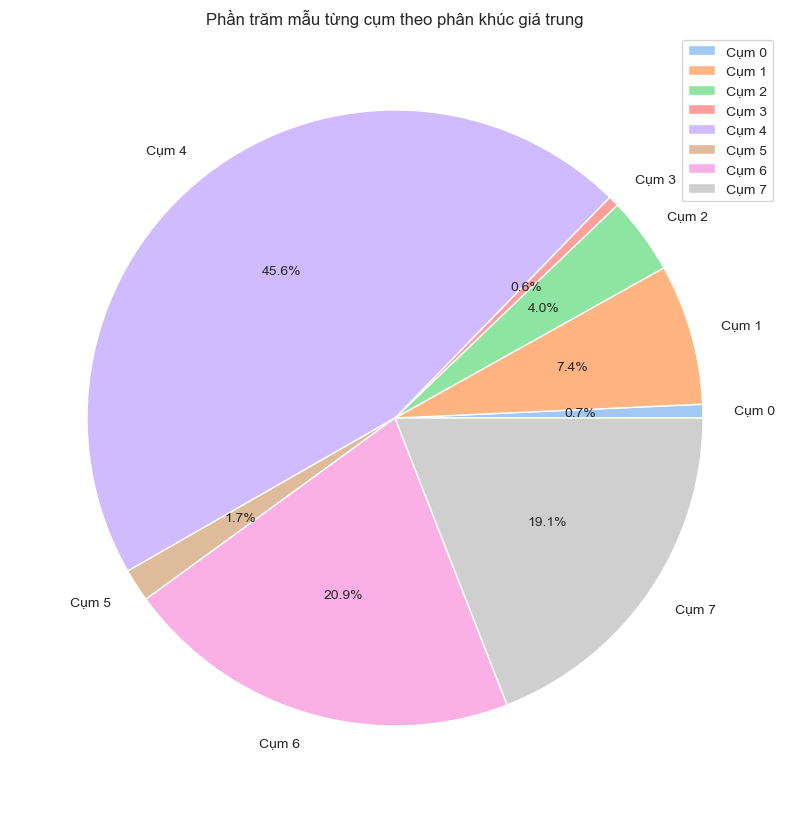

In [257]:
plt.figure(figsize=(10,10))
plt.title('Phần trăm mẫu từng cụm theo phân khúc giá trung')
sns.set_palette('pastel')
sns.set_style('whitegrid')
plt.pie(df_cum_trung[0], labels=df_cum_trung['Phân cụm'], autopct='%1.1f%%')
plt.legend()
plt.show();

## Phân tích tỷ lệ tăng trưởng theo giá trung:

In [258]:
df_tyletangtruong_trung_cum = df_phancum_giatrung[['Phân cụm', 'Tỷ lệ tăng trưởng']]
df_tyletangtruong_trung_cum

Phân cụm  Tỷ lệ tăng trưởng
2453      Cụm 1         100.000000
2454      Cụm 1         100.000000
2455      Cụm 1          10.000000
2536      Cụm 1           5.000000
2649      Cụm 1         100.000000
...         ...                ...
208440    Cụm 0           4.255480
208441    Cụm 0           1.576577
208442    Cụm 0           0.315315
208443    Cụm 0           0.495495
208444    Cụm 0           0.315315

[344339 rows x 2 columns]

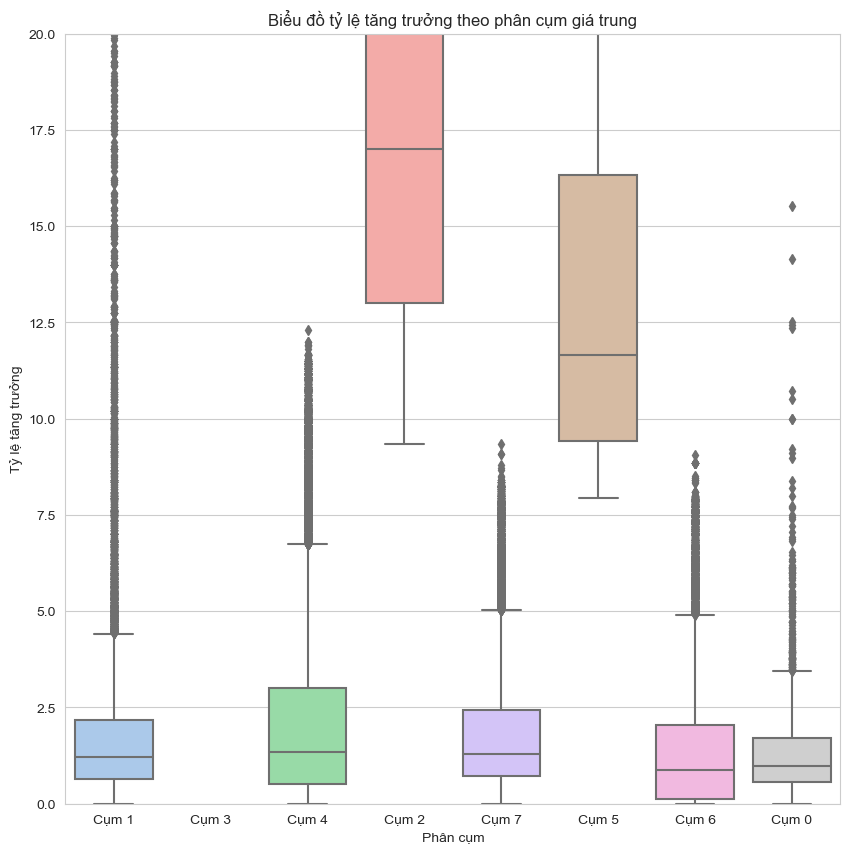

In [259]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(df_tyletangtruong_trung_cum, x = 'Phân cụm', y = 'Tỷ lệ tăng trưởng')
ax.set_ylim(0, 20)
plt.title('Biểu đồ tỷ lệ tăng trưởng theo phân cụm giá trung')
plt.show();

- Cụm hiệu quả: Cụm 2, cụm 5 => chọn cụm 2
- Cụm không hiệu quả: các cụm còn lại

## Phân tích miền theo giá trung

In [261]:
df_cum_mien_trung = df_phancum_giatrung.groupby(['Phân cụm','Miền']).size().reset_index()
df_cum_mien_trung

Phân cụm        Miền      0
0     Cụm 0  Cao Nguyên    308
1     Cụm 0         HCM    702
2     Cụm 0    Miền Tây    841
3     Cụm 0   Miền Đông    606
4     Cụm 1  Cao Nguyên   3092
5     Cụm 1         HCM   7418
6     Cụm 1    Miền Tây   8688
7     Cụm 1   Miền Đông   6263
8     Cụm 2  Cao Nguyên   1914
9     Cụm 2         HCM   3551
10    Cụm 2    Miền Tây   5571
11    Cụm 2   Miền Đông   2897
12    Cụm 3  Cao Nguyên    318
13    Cụm 3         HCM    366
14    Cụm 3    Miền Tây    948
15    Cụm 3   Miền Đông    324
16    Cụm 4  Cao Nguyên  17784
17    Cụm 4         HCM  47015
18    Cụm 4    Miền Tây  52149
19    Cụm 4   Miền Đông  39922
20    Cụm 5  Cao Nguyên    933
21    Cụm 5         HCM   1557
22    Cụm 5    Miền Tây   2362
23    Cụm 5   Miền Đông   1114
24    Cụm 6  Cao Nguyên   8278
25    Cụm 6         HCM  21114
26    Cụm 6    Miền Tây  24901
27    Cụm 6   Miền Đông  17739
28    Cụm 7  Cao Nguyên   7662
29    Cụm 7         HCM  19029
30    Cụm 7    Miền Tây  22388
31    Cụm 7   Miền Đông  16585

<Figure size 500x500 with 0 Axes>

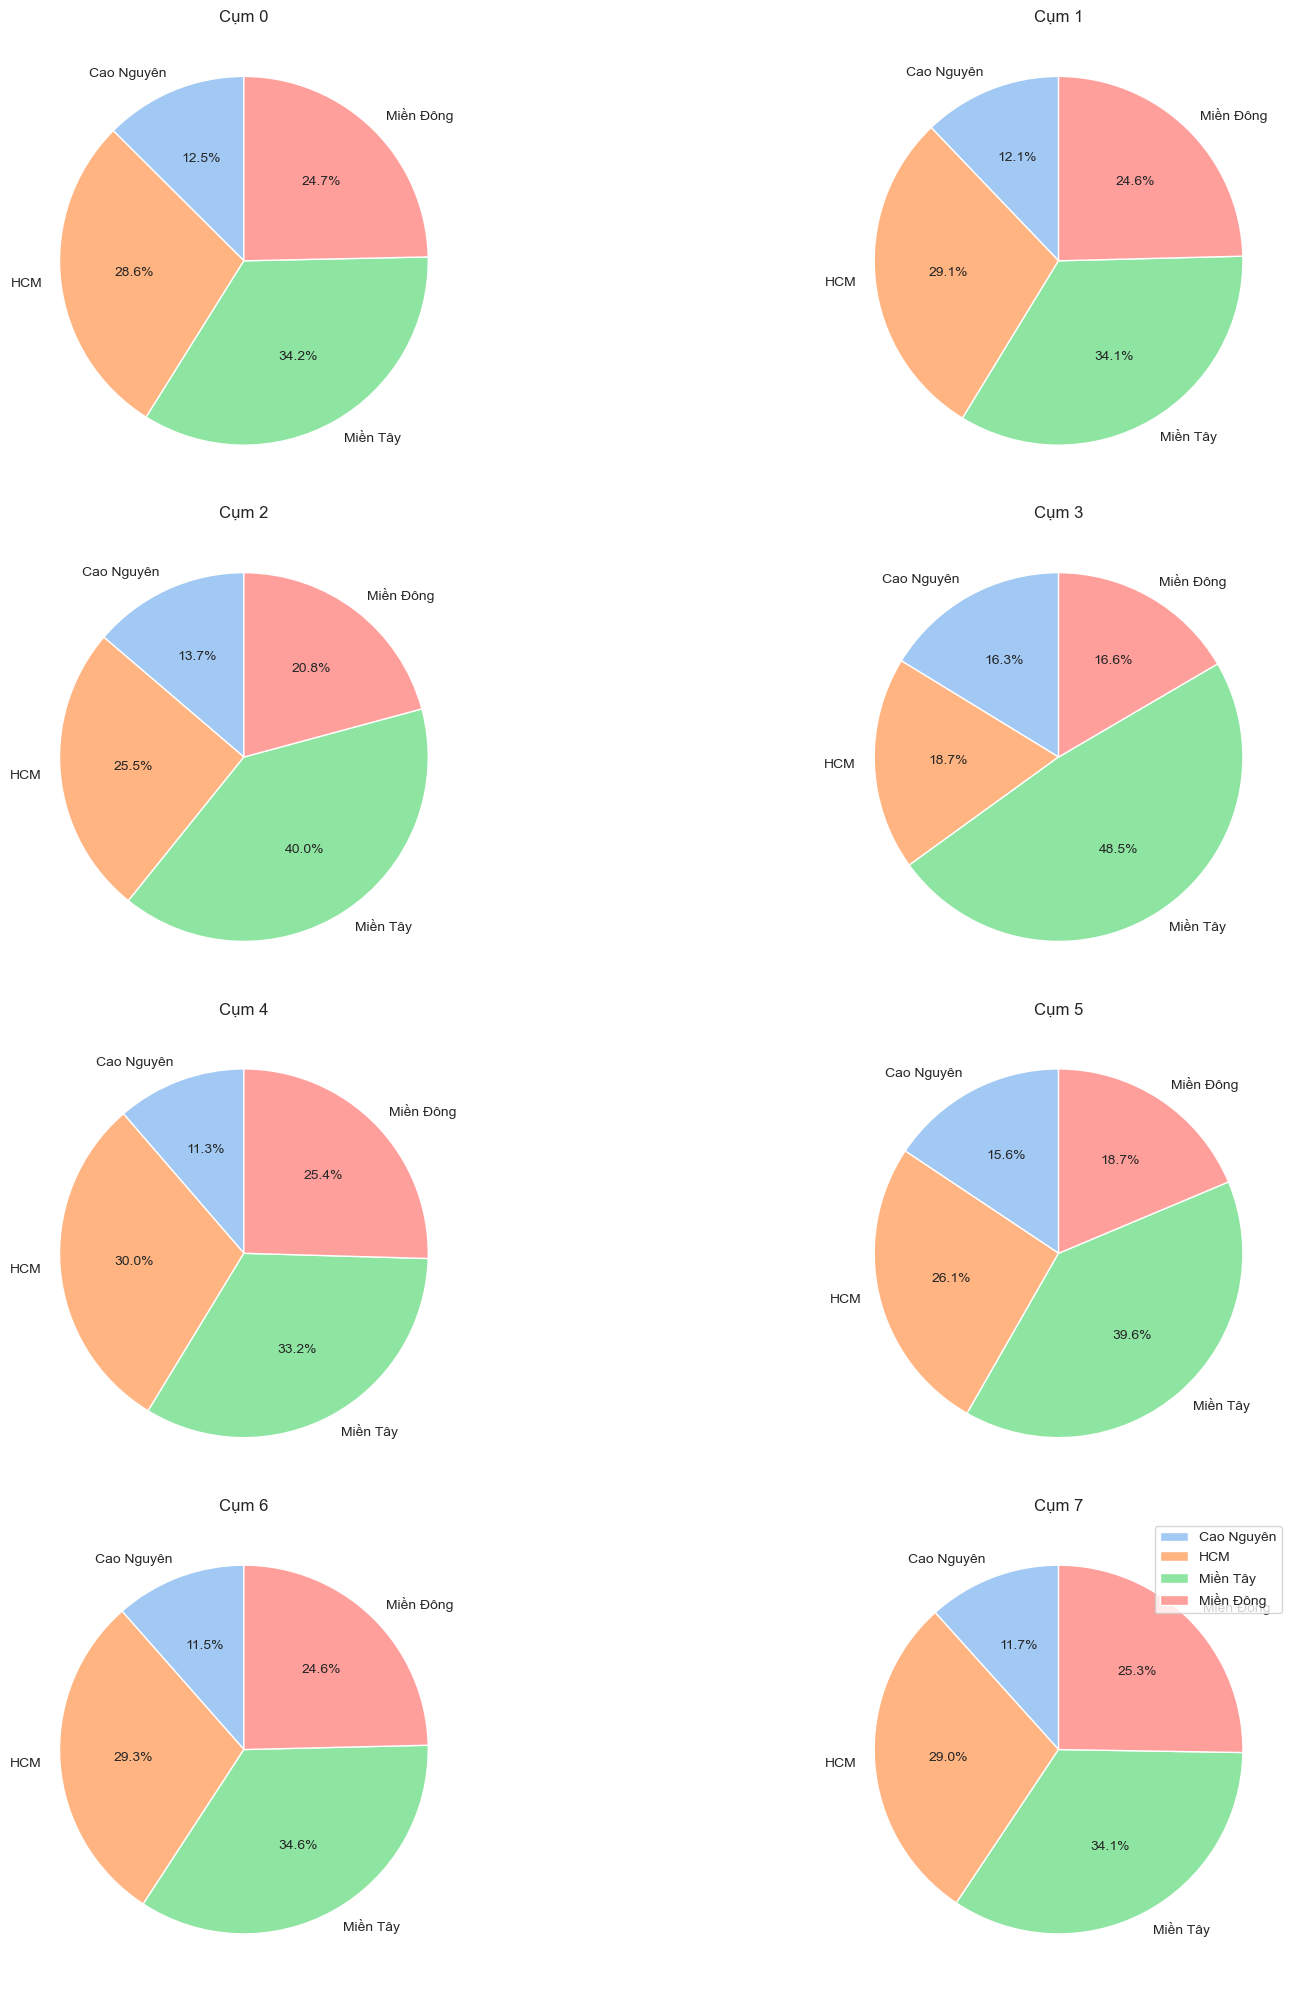

In [263]:
plt.figure(figsize=(5, 5))
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_cum_mien_trung[df_cum_mien_trung ['Phân cụm'] == f'Cụm {i}']
    ax.pie(df_cum_nho[0], labels=df_cum_nho['Miền'], labeldistance=1.1, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cụm {i}')
    
plt.tight_layout()
plt.legend()
plt.show();

=> Miền Tây là miền hiệu quả trong giá trung

## Phân tích CTKM theo giá trung trong cụm:

In [264]:
df_cum_CTKM_trung = df_phancum_giatrung.groupby(['Phân cụm','CTKM']).size().reset_index()
df_cum_CTKM_trung

Phân cụm                                         CTKM      0
0     Cụm 0                                     Giảm giá   2457
1     Cụm 1                                     Giảm giá  25461
2     Cụm 2  99K Colgate tặng 15k mua thịt, cá, trái cây      2
3     Cụm 2          Bán kèm - SP cùng loại giảm giá 50%    243
4     Cụm 2                                     Giảm giá   4869
5     Cụm 2             HĐ P/S 89,000đ được giảm 15,000đ    116
6     Cụm 2                                 Mua 2 tặng 1   8703
7     Cụm 3          Bán kèm - SP cùng loại giảm giá 50%      2
8     Cụm 3                                     Giảm giá    609
9     Cụm 3             HĐ P/S 89,000đ được giảm 15,000đ      6
10    Cụm 3                                 Mua 2 tặng 1   1339
11    Cụm 4  99K Colgate tặng 15k mua thịt, cá, trái cây  13876
12    Cụm 4          Bán kèm - SP cùng loại giảm giá 50%   9740
13    Cụm 4                                     Giảm giá  75307
14    Cụm 4             HĐ P/S 89,000đ được giảm 15,000đ  13291
15    Cụm 4                                 Mua 2 tặng 1  44656
16    Cụm 5                                     Giảm giá   4850
17    Cụm 5           HĐ 99,000đ Colgate được tặng 1 KĐR    228
18    Cụm 5             HĐ P/S 89,000đ được giảm 15,000đ    113
19    Cụm 5                                 Mua 2 tặng 1    775
20    Cụm 6                                     Giảm giá  20683
21    Cụm 6             HĐ P/S 89,000đ được giảm 15,000đ  44432
22    Cụm 6                                 Mua 2 tặng 1   6917
23    Cụm 7                                     Giảm giá  47443
24    Cụm 7           HĐ 99,000đ Colgate được tặng 1 KĐR  13612
25    Cụm 7                                 Mua 2 tặng 1   4609

<Figure size 500x500 with 0 Axes>

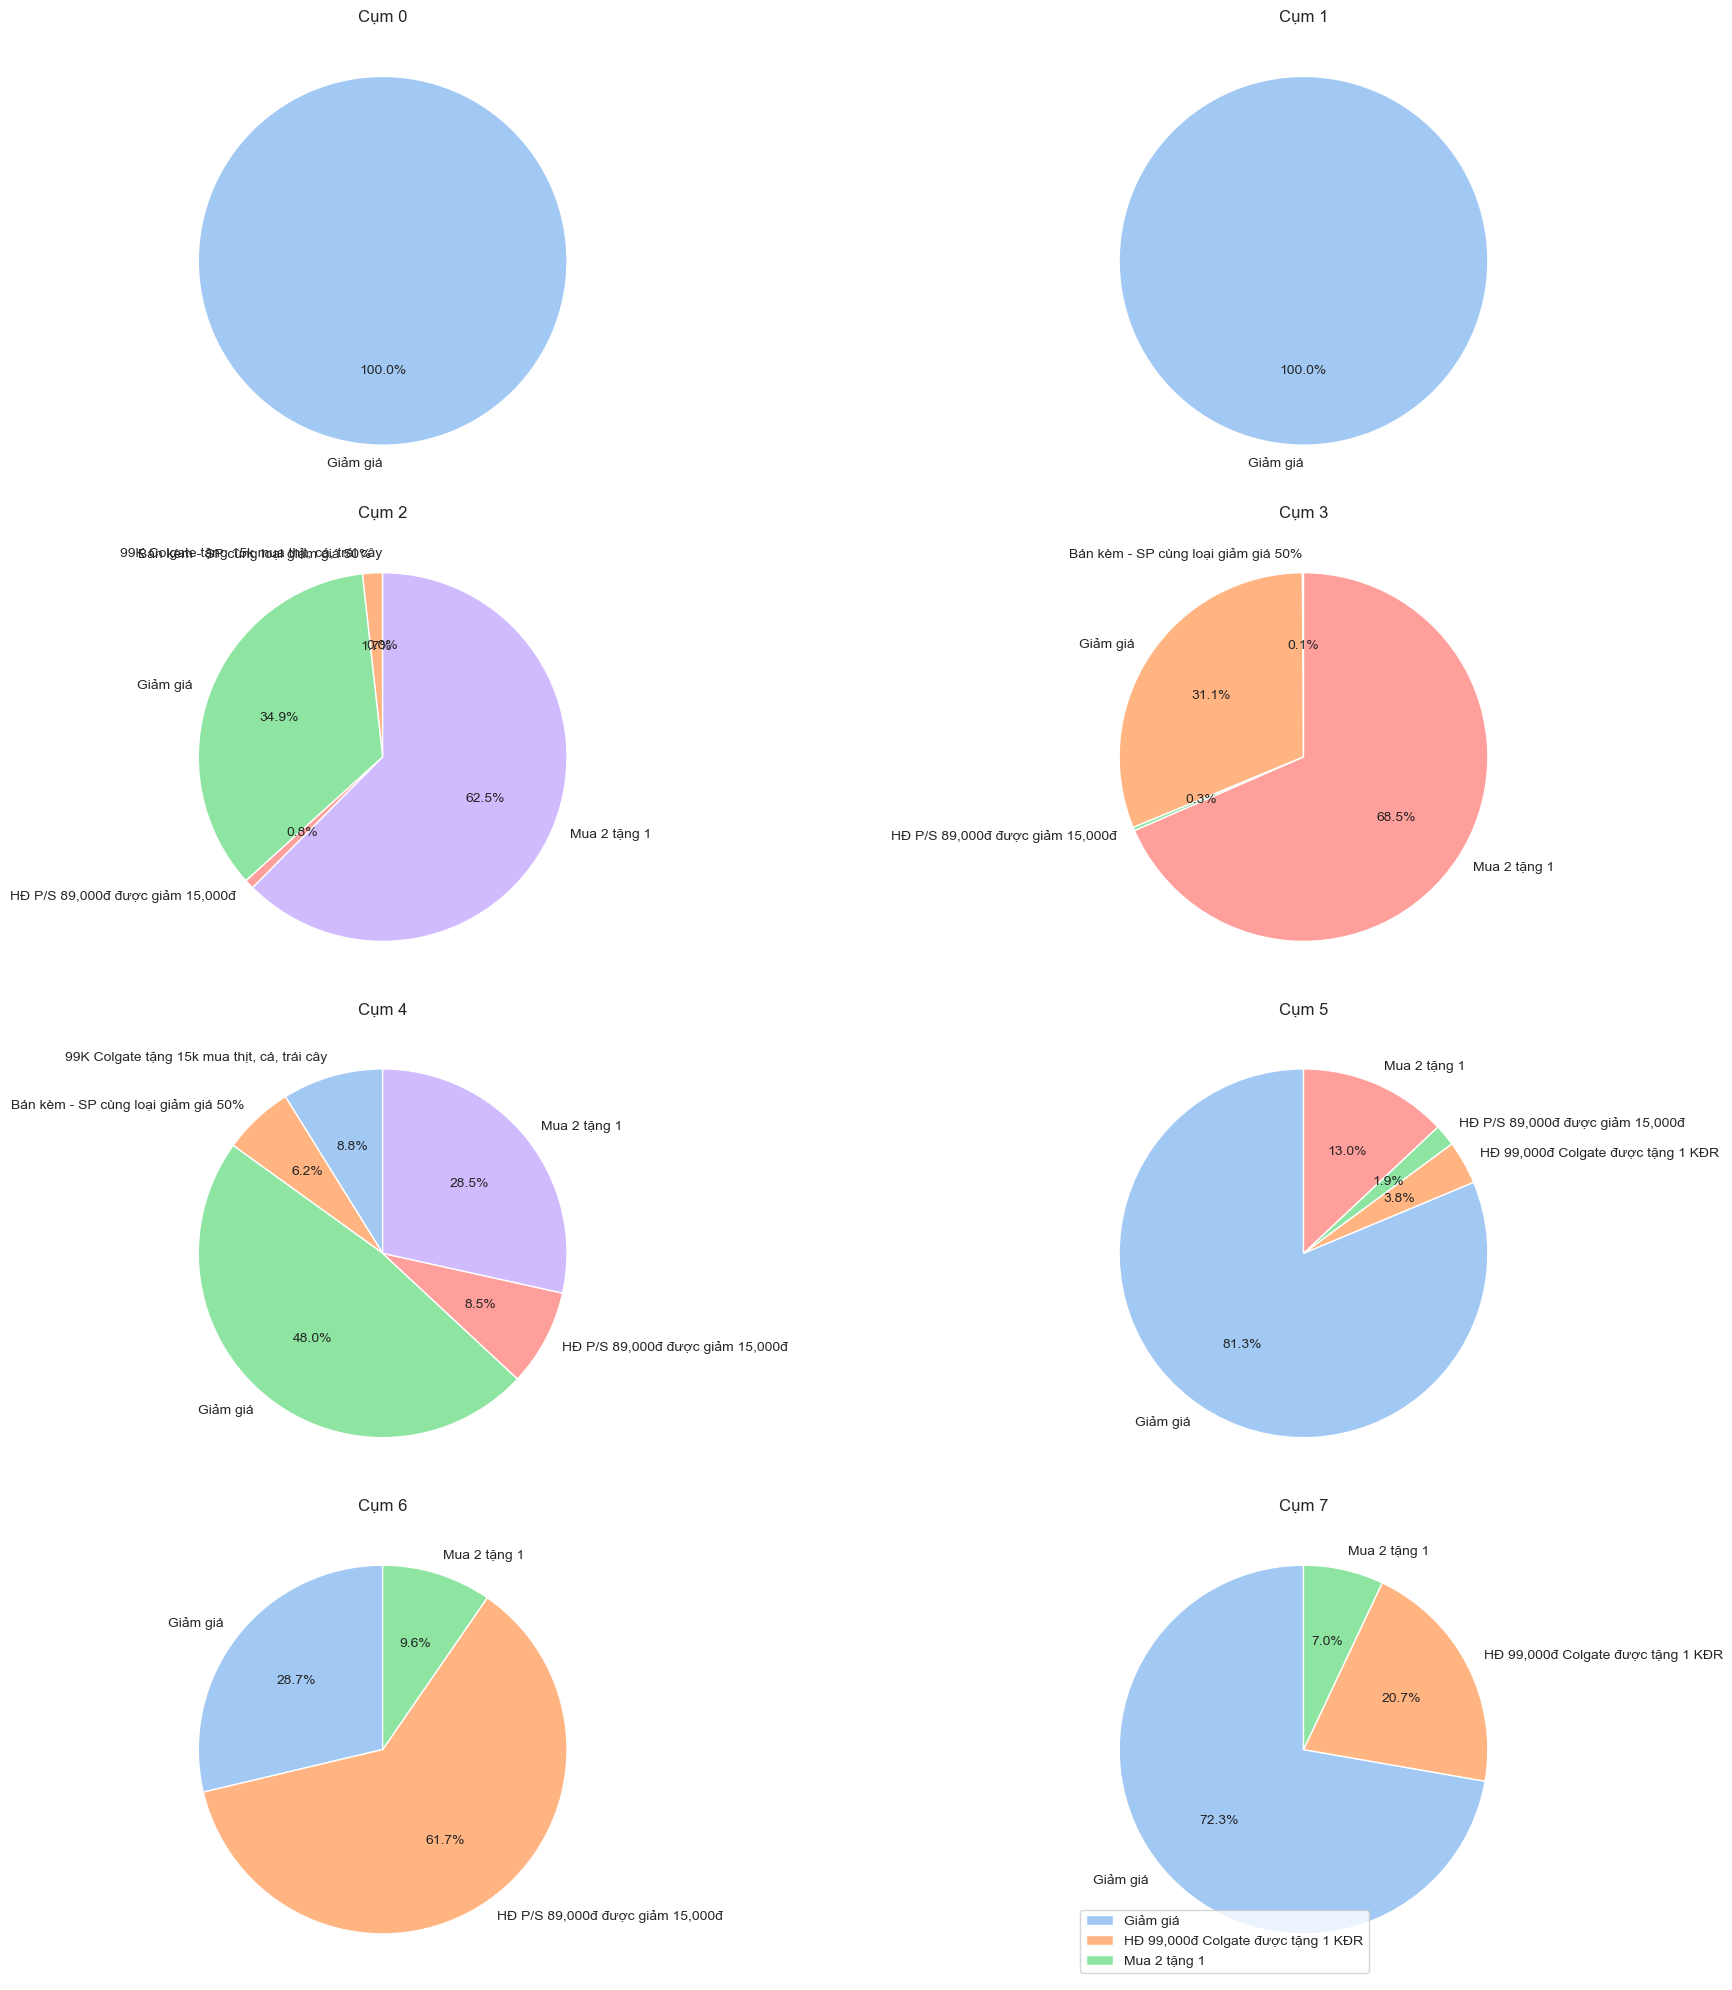

In [265]:
plt.figure(figsize=(5, 5))
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_cum_CTKM_trung[df_cum_CTKM_trung ['Phân cụm'] == f'Cụm {i}']
    ax.pie(df_cum_nho[0], labels=df_cum_nho['CTKM'], labeldistance=1.1, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cụm {i}')
    
plt.tight_layout()
plt.legend()
plt.show();

=> Khuyến mãi mua 2 tặng 1 là hiệu quả trong giá trung

## Phân tích thời gian khuyến mãi:

In [266]:
df_tgkm_trung_cum = df_phancum_giatrung[['Phân cụm', 'Thời gian khuyến mãi']]
df_tgkm_trung_cum

Phân cụm  Thời gian khuyến mãi
2453      Cụm 1                    90
2454      Cụm 1                    90
2455      Cụm 1                    90
2536      Cụm 1                    90
2649      Cụm 1                    90
...         ...                   ...
208440    Cụm 0                   222
208441    Cụm 0                   222
208442    Cụm 0                   222
208443    Cụm 0                   222
208444    Cụm 0                   222

[344339 rows x 2 columns]

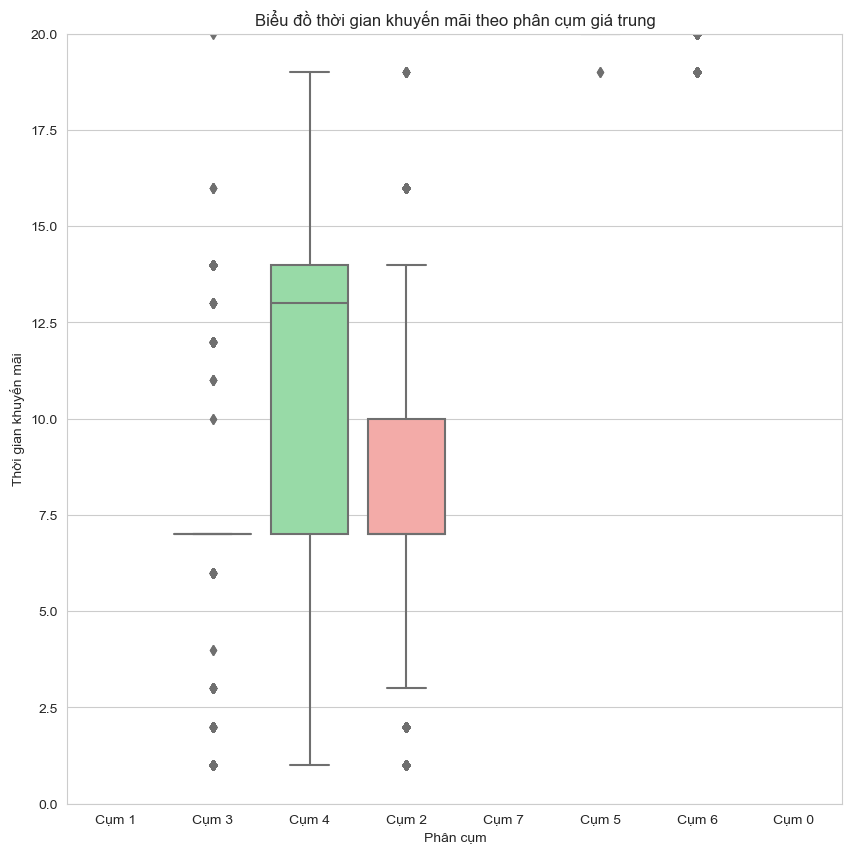

In [267]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(df_tgkm_trung_cum, x = 'Phân cụm', y = 'Thời gian khuyến mãi')
ax.set_ylim(0, 20)
plt.title('Biểu đồ thời gian khuyến mãi theo phân cụm giá trung')
plt.show();

=> Thời gian khuyến mãi hiệu quả: từ 7 => 10 ngày

## Phân tích thu nhập dân cư quanh shop:

In [268]:
df_cum_thunhap_trung = df_phancum_giatrung.groupby(['Phân cụm','Thu nhập dân cư quanh shop']).size().reset_index()
df_cum_thunhap_trung

Phân cụm                     Thu nhập dân cư quanh shop      0
0     Cụm 0                     Khu dân cư có thu nhập khá    433
1     Cụm 0      Khu dân cư có thu nhập thấp - nông nghiệp   1223
2     Cụm 0  Khu dân cư có thu nhập thấp - phi nông nghiệp    623
3     Cụm 0                             Shop không có data    178
4     Cụm 1                     Khu dân cư có thu nhập khá   4110
5     Cụm 1      Khu dân cư có thu nhập thấp - nông nghiệp  12822
6     Cụm 1  Khu dân cư có thu nhập thấp - phi nông nghiệp   6684
7     Cụm 1                             Shop không có data   1845
8     Cụm 2                     Khu dân cư có thu nhập khá   1965
9     Cụm 2      Khu dân cư có thu nhập thấp - nông nghiệp   7568
10    Cụm 2  Khu dân cư có thu nhập thấp - phi nông nghiệp   3425
11    Cụm 2                             Shop không có data    975
12    Cụm 3                     Khu dân cư có thu nhập khá    211
13    Cụm 3      Khu dân cư có thu nhập thấp - nông nghiệp   1107
14    Cụm 3  Khu dân cư có thu nhập thấp - phi nông nghiệp    475
15    Cụm 3                             Shop không có data    163
16    Cụm 4                     Khu dân cư có thu nhập khá  25932
17    Cụm 4      Khu dân cư có thu nhập thấp - nông nghiệp  77593
18    Cụm 4  Khu dân cư có thu nhập thấp - phi nông nghiệp  41519
19    Cụm 4                             Shop không có data  11826
20    Cụm 5                     Khu dân cư có thu nhập khá    789
21    Cụm 5      Khu dân cư có thu nhập thấp - nông nghiệp   3179
22    Cụm 5  Khu dân cư có thu nhập thấp - phi nông nghiệp   1464
23    Cụm 5                             Shop không có data    534
24    Cụm 6                     Khu dân cư có thu nhập khá  11557
25    Cụm 6      Khu dân cư có thu nhập thấp - nông nghiệp  35653
26    Cụm 6  Khu dân cư có thu nhập thấp - phi nông nghiệp  18690
27    Cụm 6                             Shop không có data   6132
28    Cụm 7                     Khu dân cư có thu nhập khá  10741
29    Cụm 7      Khu dân cư có thu nhập thấp - nông nghiệp  32734
30    Cụm 7  Khu dân cư có thu nhập thấp - phi nông nghiệp  17177
31    Cụm 7                             Shop không có data   5012

<Figure size 500x500 with 0 Axes>

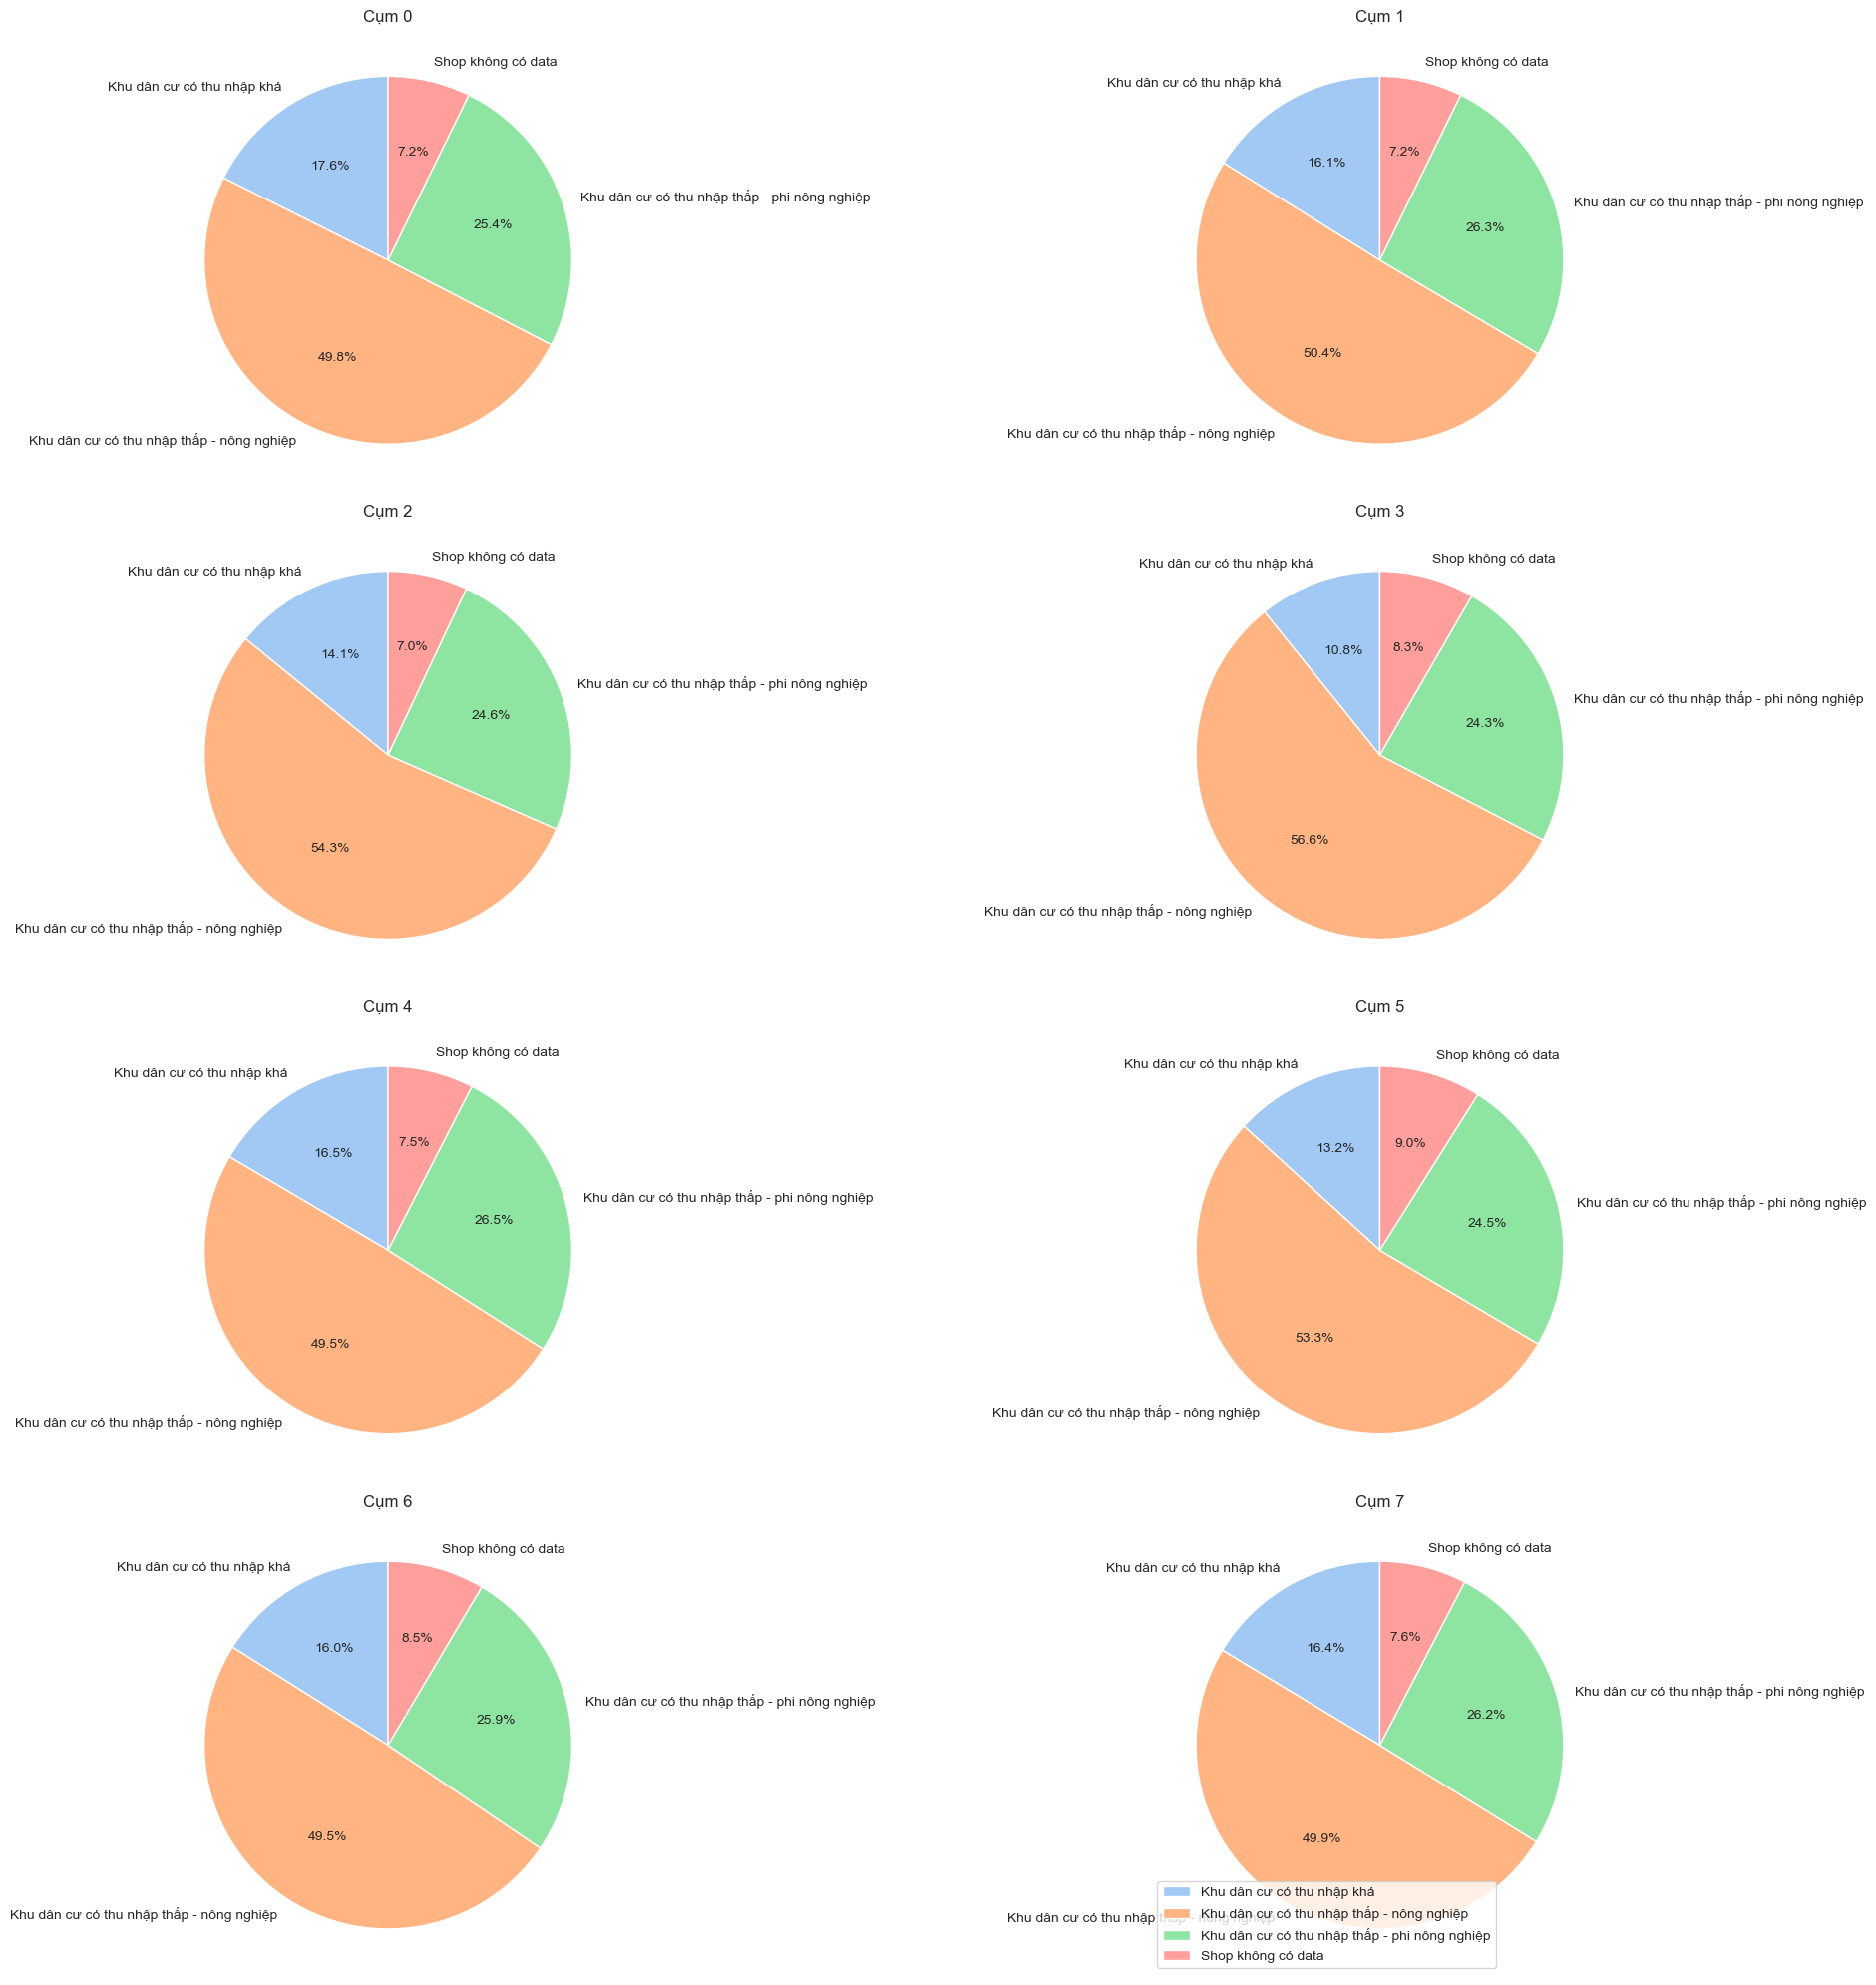

In [269]:
plt.figure(figsize=(5, 5))
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_cum_thunhap_trung[df_cum_thunhap_trung['Phân cụm'] == f'Cụm {i}']
    ax.pie(df_cum_nho[0], labels=df_cum_nho['Thu nhập dân cư quanh shop'], labeldistance=1.1, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cụm {i}')
    
plt.tight_layout()
plt.legend()
plt.show();

=> Khu dân cư thu nhập thấp - nông nghiệp

## Phân tích trưng bày theo giá trung:

In [270]:
df_cum_trungbay_trung = df_phancum_giatrung.groupby(['Phân cụm','Trưng bày']).size().reset_index()
df_cum_trungbay_trung

Phân cụm Trưng bày       0
0     Cụm 0   Trên kệ    2457
1     Cụm 1   Trên kệ   25461
2     Cụm 2  Thu ngân     612
3     Cụm 2   Tháp KM    7872
4     Cụm 2   Trên kệ    5449
5     Cụm 3  Thu ngân      84
6     Cụm 3   Tháp KM    1231
7     Cụm 3   Trên kệ     641
8     Cụm 4  Thu ngân    9757
9     Cụm 4   Tháp KM   30342
10    Cụm 4   Trên kệ  116771
11    Cụm 5   Tháp KM    2352
12    Cụm 5   Trên kệ    3614
13    Cụm 6   Tháp KM    6917
14    Cụm 6   Trên kệ   65115
15    Cụm 7   Tháp KM    8150
16    Cụm 7   Trên kệ   57514

<Figure size 500x500 with 0 Axes>

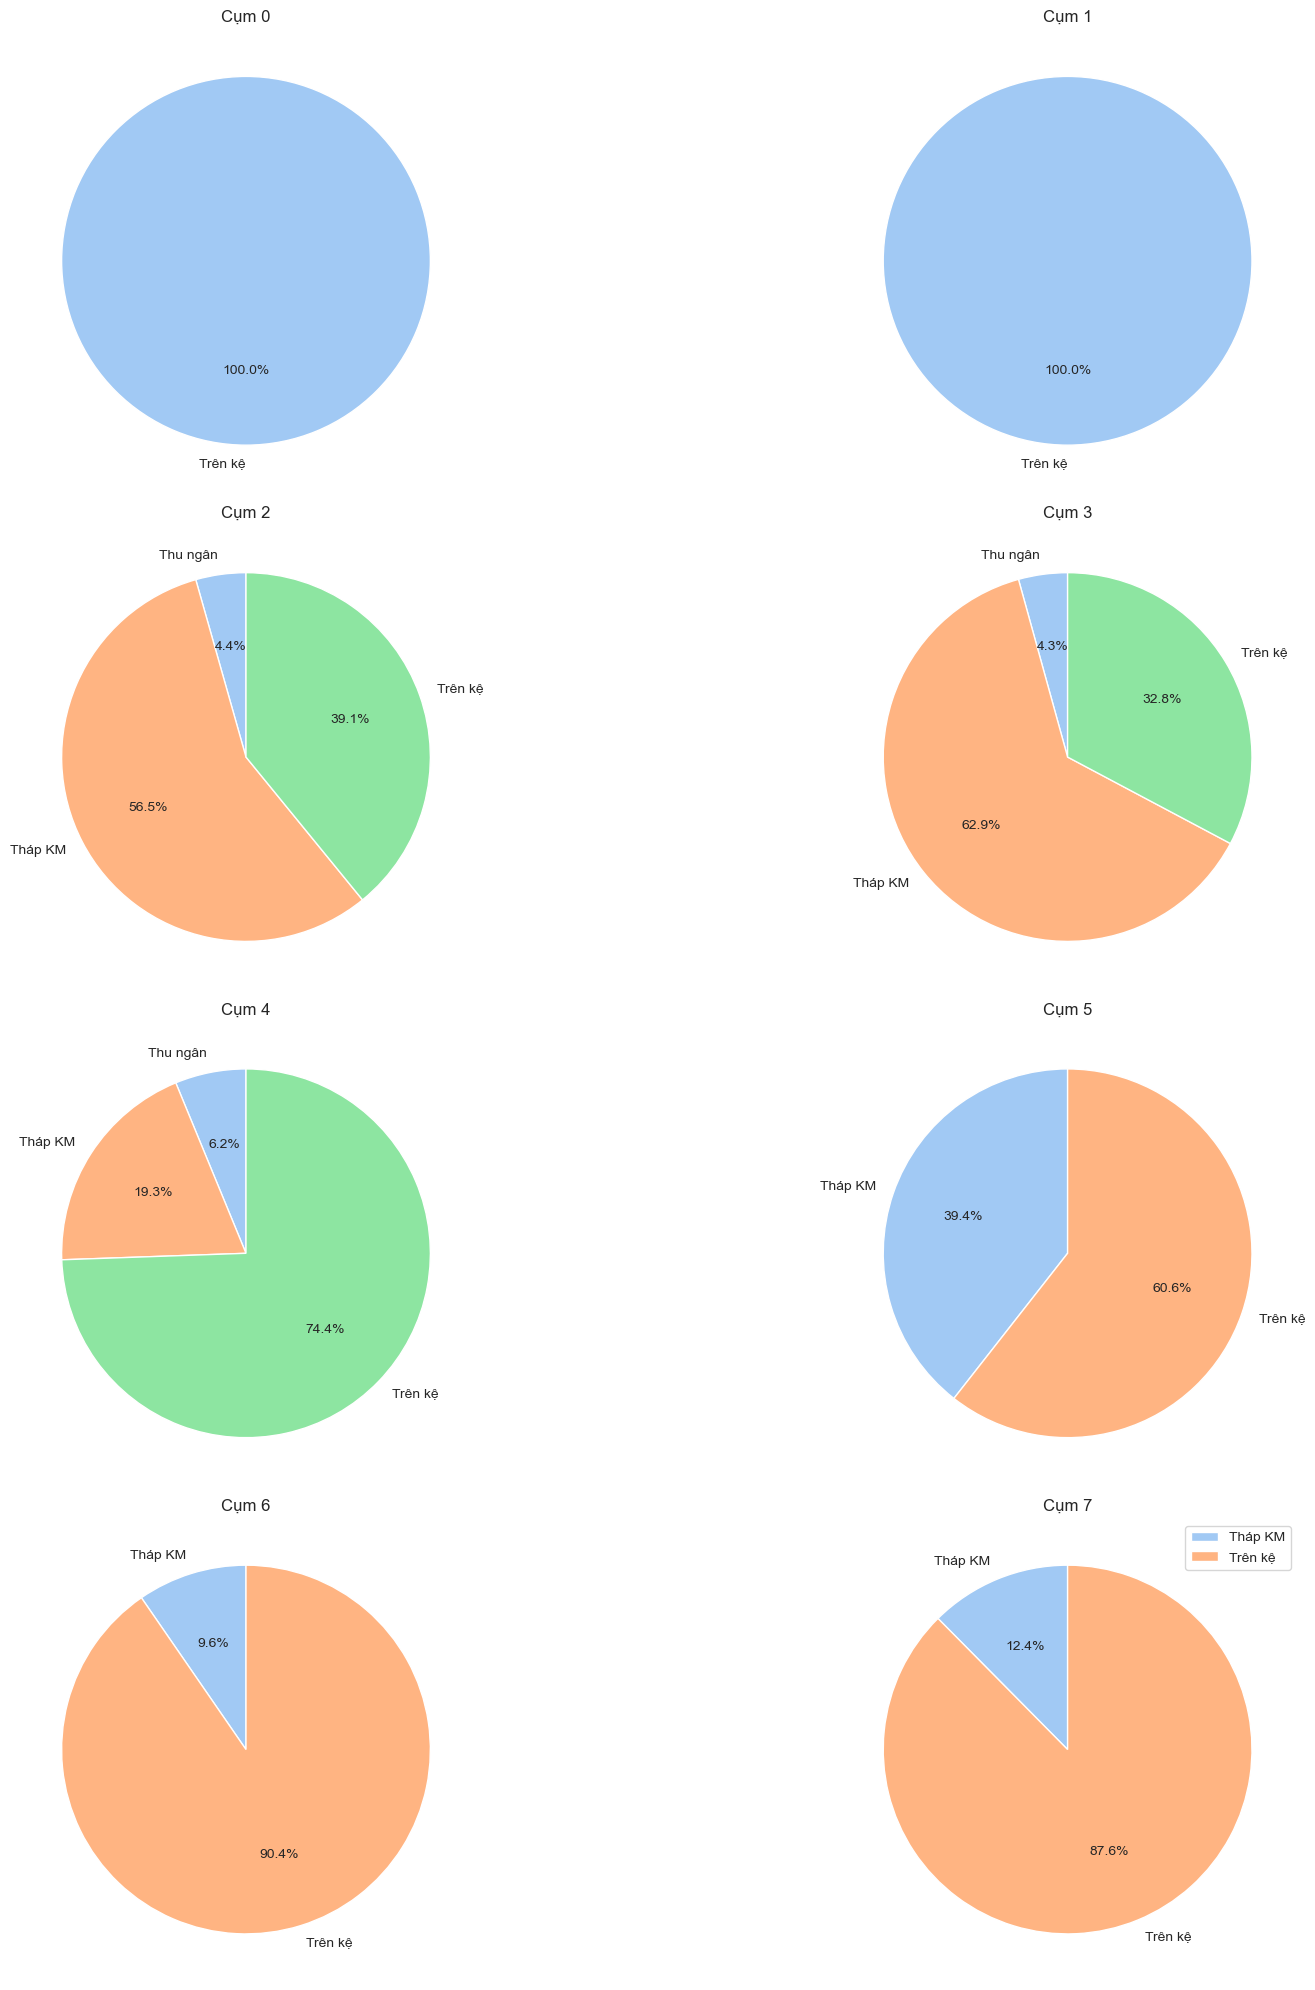

In [271]:
plt.figure(figsize=(5, 5))
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_cum_trungbay_trung[df_cum_trungbay_trung['Phân cụm'] == f'Cụm {i}']
    ax.pie(df_cum_nho[0], labels=df_cum_nho['Trưng bày'], labeldistance=1.1, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cụm {i}')
    
plt.tight_layout()
plt.legend()
plt.show();

=> Trưng bày tháp KM là hiệu quả

Tổng kết phân khúc giá trung:
- Miền Tây
- Trưng bày trên tháp KM
- CTKM mua 2 tặng 1
- Thời gian khuyến mãi : 7 - 10 ngày
- Khu dân cư thu nhập thấp - nông nghiệp